<a href="https://colab.research.google.com/github/MarianoChic09/Agentes-Inteligentes/blob/main/Obligatorio_Presentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis predictivo de series temporales

- Mariano Chicatun - 301379  

- Nicolás Grezzi - 189702

------

## Análisis de velocidad espuma proceso de flotación en minería

### Objetivo

1. Estimar el impacto que tienen otras variables sobre la velocidad espuma
2. Crear un modelo predictivo a partir de la velocidad espuma y las variables complementarias

## Importar librerias y datos

Librerías de resampling:

In [ ]:
install.packages(c("xts", "zoo"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("xts", "zoo")):
“installation of package ‘xts’ had non-zero exit status”


In [ ]:
install.packages("devtools")     # only need to do this once
# devtools::install_github("nickpoison/astsa")
install.packages("astsa")
install.packages("forecast")
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’, ‘pkgdown’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dlm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(astsa)
library(forecast)
library(xts)
library(zoo)
library(tseries)
library(astsa)
library(dlm)
options(repr.plot.width=8, repr.plot.height=4.5, repr.plot.res=300) #ajusta tamaño de graficas


In [ ]:
dataset = read.csv("flotacion_norte_Obligatorio.csv")
data = dataset[2:3]

Como TPH solo tiene datos hasta el 2023-04-20 02:50:00, seteamos ese tiempo máximo para todos.

### Velocidad Angular

                        [,1]
2022-12-01 03:00:00 30.57164
2022-12-01 03:05:00 30.41260
2022-12-01 03:10:00 30.65779
2022-12-01 03:15:00 30.92639
2022-12-01 03:20:00 30.35606
2022-12-01 03:25:00 31.06804
2022-12-01 03:30:00 30.19923
2022-12-01 03:35:00 29.79626
2022-12-01 03:40:00 29.99354
2022-12-01 03:45:00 31.51426

[1] 55584

                        [,1]
2022-12-01 03:00:00 30.57164
2022-12-01 04:00:00 30.41728
2022-12-01 05:00:00 30.90390
2022-12-01 06:00:00 34.40448
2022-12-01 07:00:00 33.50280
2022-12-01 08:00:00 42.33300
2022-12-01 09:00:00 48.65932
2022-12-01 10:00:00 47.64191
2022-12-01 11:00:00 45.15990
2022-12-01 12:00:00 41.94735

[1] 4633

                        [,1]
2023-02-12 00:00:00 3.514519
2023-02-12 01:00:00 5.160348
2023-02-12 02:00:00 4.270765
2023-02-12 03:00:00 2.880616
2023-02-12 04:00:00 5.471768
2023-02-12 05:00:00 5.249994
2023-02-12 06:00:00 5.540442
2023-02-12 07:00:00 4.726868
2023-02-12 08:00:00 3.519049
2023-02-12 09:00:00 3.125744

[1] 1611

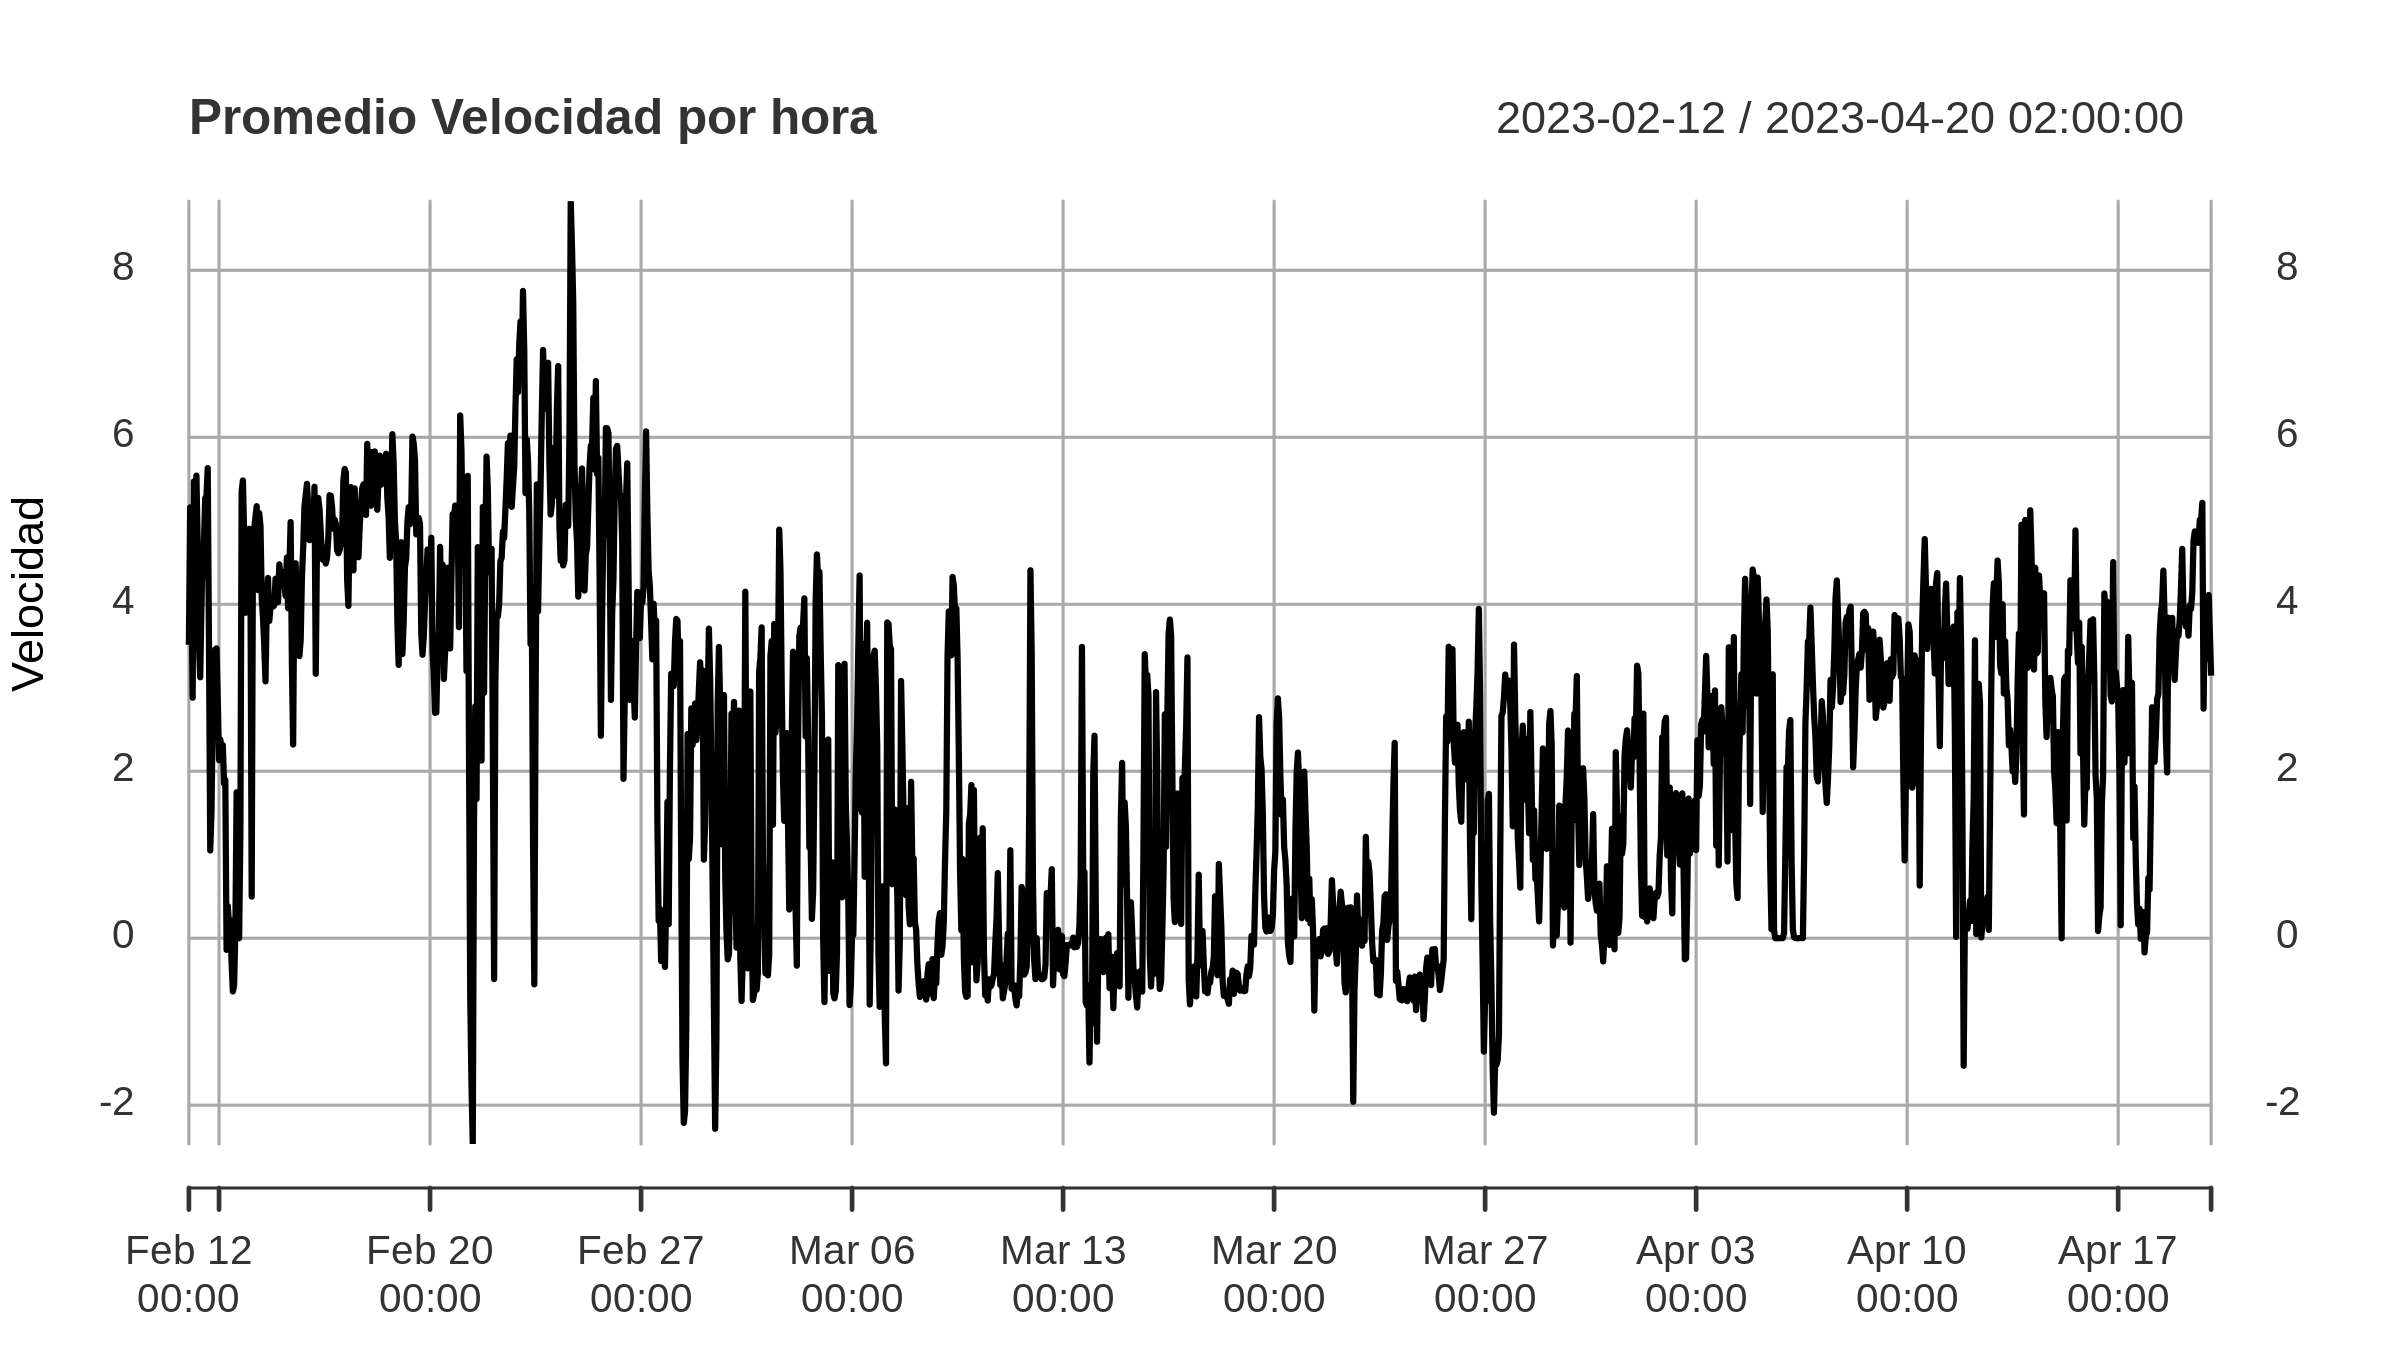

In [ ]:
# Convert the 'Date' column to POSIXct type
data$Time <- as.POSIXct(data$Time , format="%Y-%m-%d %H:%M:%S")
ts_data <- xts(data$"T2.LT2S3APET.R1C1_ANG.PNT.FOX", order.by=data$Time)
ts_data[1:10]
length(ts_data)
mean_hourly <- function(x) {
    mean(x, na.rm = TRUE)
}

# Find the endpoints for each hour
ep <- endpoints(ts_data, "hours")

# Shift the indices to the start of each hour and remove the last index
ep <- c(1, ep[-length(ep)] + 1)

# Apply the function to each hour
hourly_data <- period.apply(ts_data, ep, mean_hourly)
hourly_data[1:10]
length(hourly_data)
# plot(velocidad)
subset_ts_data <- hourly_data['2023-02-12 00:00:00/2023-04-20 02:50:00']
subset_ts_data[1:10]
length(subset_ts_data)

velocidad <- subset_ts_data

plot(velocidad, main="Promedio Velocidad por hora", xlab="Time", ylab="Velocidad")


Debido a que hay un cambio en la calibración del sensor a partir del 12 de Febrero de 2023, solo nos quedamos con este subconjunto.

### TPH

In [ ]:
dataset2 = read.csv("tph_Obligatorio2.csv")
tph = dataset2[2:3]

                        [,1]
2022-11-01 03:00:00 4047.761
2022-11-01 03:05:00 4045.438
2022-11-01 03:10:00 4056.400
2022-11-01 03:15:00 4053.929
2022-11-01 03:20:00 4051.192
2022-11-01 03:25:00 4033.037
2022-11-01 03:30:00 4092.551
2022-11-01 03:35:00 4126.429
2022-11-01 03:40:00 4148.606
2022-11-01 03:45:00 4149.226

[1] 48960

                        [,1]
2022-11-01 03:00:00 4047.761
2022-11-01 04:00:00 4097.453
2022-11-01 05:00:00 4135.072
2022-11-01 06:00:00 4073.469
2022-11-01 07:00:00 4177.007
2022-11-01 08:00:00 4257.501
2022-11-01 09:00:00 4096.445
2022-11-01 10:00:00 3871.835
2022-11-01 11:00:00 3867.936
2022-11-01 12:00:00 3931.508

[1] 4081

                        [,1]
2023-02-12 00:00:00 3377.523
2023-02-12 01:00:00 3293.812
2023-02-12 02:00:00 3160.134
2023-02-12 03:00:00 3021.811
2023-02-12 04:00:00 3054.609
2023-02-12 05:00:00 3030.400
2023-02-12 06:00:00 3117.620
2023-02-12 07:00:00 3706.963
2023-02-12 08:00:00 3868.633
2023-02-12 09:00:00 3576.856

[1] 1611

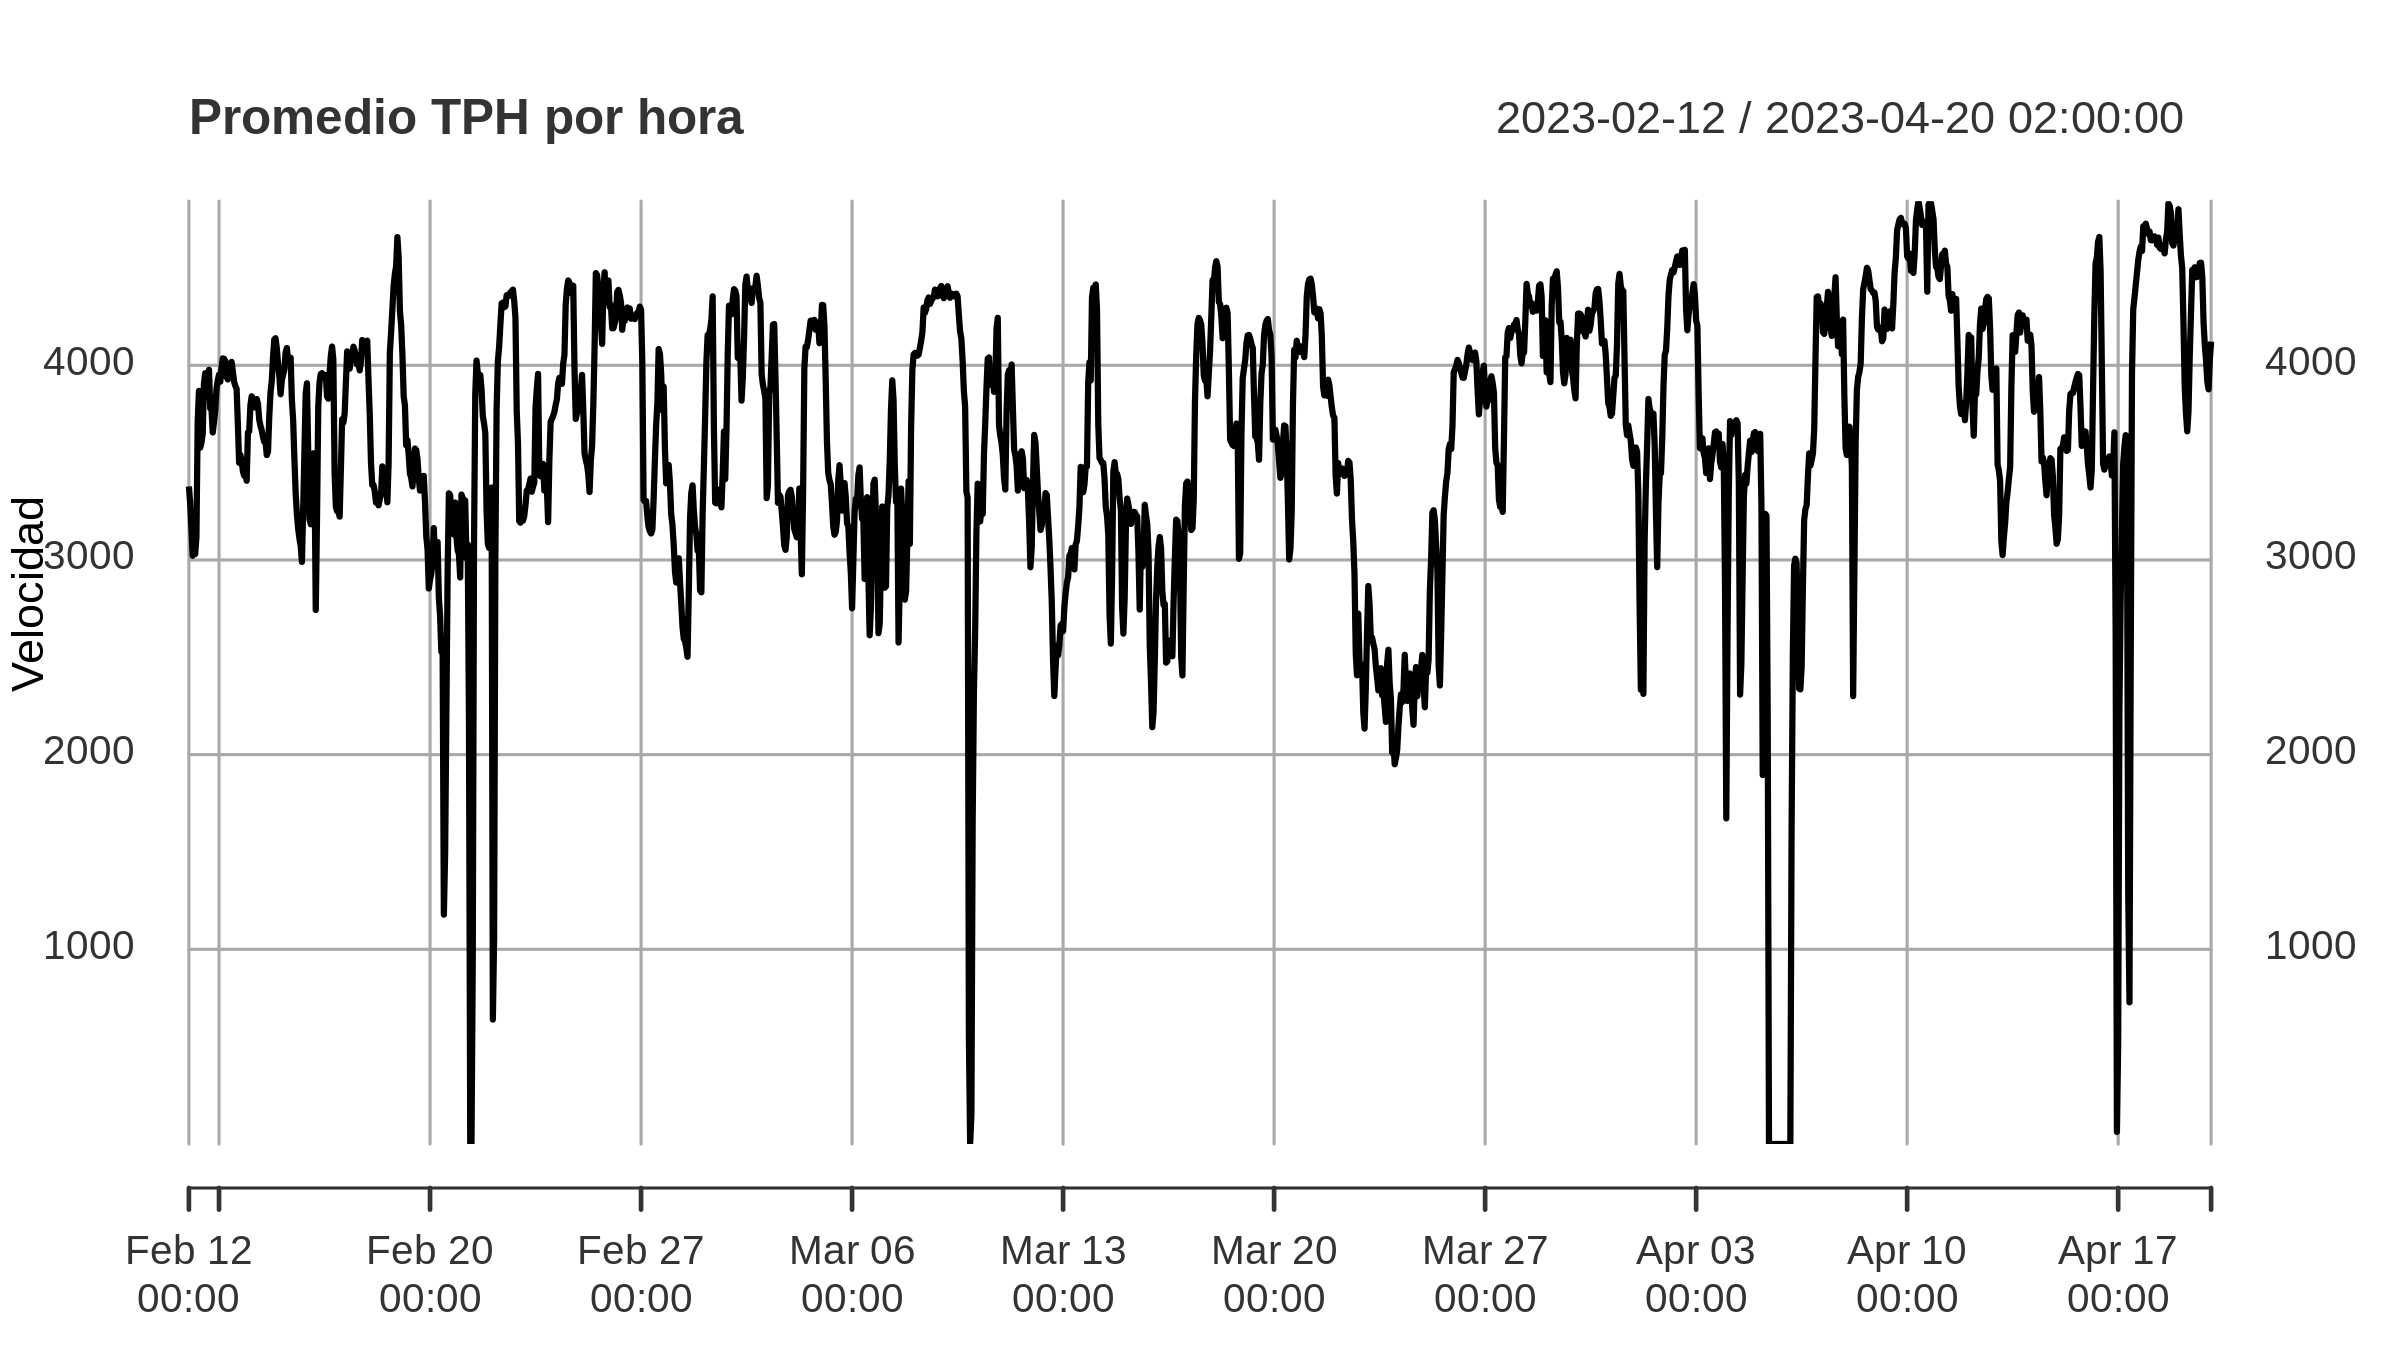

In [ ]:
dataset2$Time <- as.POSIXct(dataset2$Time , format="%Y-%m-%d %H:%M:%S")
ts_data <- xts(dataset2$"T2.510LAL032.TPH4146INST.PNT.FOX", order.by=dataset2$Time)
ts_data[1:10]

# ts_data <- na.omit(ts_data)
length(ts_data)
mean_hourly <- function(x) {
    mean(x, na.rm = TRUE)
}

# Find the endpoints for each hour
ep <- endpoints(ts_data, "hours")

# Shift the indices to the start of each hour and remove the last index
ep <- c(1, ep[-length(ep)] + 1)

# Apply the function to each hour
hourly_data <- period.apply(ts_data, ep, mean_hourly)
hourly_data[1:10]
length(hourly_data)

subset_ts_data <- hourly_data['2023-02-12 00:00:00/2023-04-20 02:50:00']
subset_ts_data[1:10]
length(subset_ts_data)

tph <- subset_ts_data

plot(tph, main="Promedio TPH por hora", xlab="Time", ylab="Velocidad")

In [ ]:
tail(tph)

                        [,1]
2023-04-19 21:00:00 4101.757
2023-04-19 22:00:00 4021.614
2023-04-19 23:00:00 3914.498
2023-04-20 00:00:00 3876.476
2023-04-20 01:00:00 4033.311
2023-04-20 02:00:00 4121.629

### Mineralogia

In [ ]:
dataset3 = read.csv("Mineralogia_Obligatorio.csv",stringsAsFactors = FALSE)

# dataset3[] <- lapply(dataset3, function(x) {
#   if (is.character(x)) return(as.numeric(as.character(x)))
#   return(x)
# })

In [ ]:
head(dataset3)

Timestamp           Agregacion Planta dump_tons dump_tph disp_tph_plant_estim
1 11/01/2022 00:00:00 Hour       CF     3875.940  3875.940 4264.657            
2 11/01/2022 01:00:00 Hour       CF     4776.470  4776.470 4327.472            
3 11/01/2022 02:00:00 Hour       CF     3875.560  3875.560 4345.106            
4 11/01/2022 03:00:00 Hour       CF     2993.744  2993.744 4402.834            
5 11/01/2022 04:00:00 Hour       CF     2707.700  2707.700 4328.782            
6 11/01/2022 05:00:00 Hour       CF     6316.692  6316.692 4303.705            
  disp_ley_cu_tot disp_ley_cu_solu disp_ley_cu_conc disp_ley_moly ⋯ mop_Tonnes
1 0.0070          1e-04            0.2192           2e-04         ⋯  94547.09 
2 0.0071          2e-04            0.2194           2e-04         ⋯  95382.66 
3 0.0071          2e-04            0.2164           2e-04         ⋯  52060.14 
4 0.0060          1e-04            0.1990           1e-04         ⋯ 156117.48 
5 0.0056          2e-04            0.1995           1e-04         ⋯ 151351.08 
6 0.0063          1e-04            0.2147           1e-04         ⋯ 132680.95 
  mop_BN      mop_CC     mop_CPY  mop_CV       mop_PY   mop_BWI  mop_SPI  
1 0.009333333 0.02900000 2.667000 0.0010000000 2.201333 15.76667 115.52222
2 0.011152093 0.02714094 2.306920 0.0010000000 2.130760 15.78851 114.40097
3 0.006750000 0.02125000 2.202000 0.0010000000 2.272375 16.02500 116.90000
4 0.017583216 0.02772524 1.649170 0.0007159486 2.322837 15.72142 109.53156
5 0.020255380 0.09669420 1.035911 0.0149656600 1.038507 15.47311  96.89596
6 0.016765753 0.03569666 1.694451 0.0032142360 1.451441 15.32482 104.06033
  From_CH1 From_CH2
1 0        1       
2 0        1       
3 0        1       
4 0        1       
5 0        1       
6 0        1

In [ ]:
dataset3$Timestamp <- as.POSIXct(dataset3$Timestamp, format = "%m/%d/%Y %H:%M:%S")

# Convert the data frame to an xts object
xts_data <- xts(dataset3[-1], order.by = dataset3$Timestamp)

In [ ]:
subset_ts_data <- xts_data['2023-02-12 00:00:00/2023-04-20 02:50:00']
length(subset_ts_data)

mineralogia <- subset_ts_data

# Convert all columns to numeric and keep the xts structure
# mineralogia <- do.call(xts, lapply(mineralogia, as.numeric))

# Set the order.by attribute to the index of the original xts object
index(mineralogia) <- index(mineralogia)

# Check the structure of the xts object again
str(mineralogia)

# plot(mineralogia[, 'mop_Volume'], main="Variables Mineralogia", xlab="Time", ylab="dump_tons")

[1] 191490

An xts object on 2023-02-12 / 2023-04-20 02:00:00 containing: 
  Data:    character [1473, 130]
  Columns: Agregacion, Planta, dump_tons, dump_tph, disp_tph_plant_estim ... with 125 more columns
  Index:   POSIXct,POSIXt [1473] (TZ: "")


In [ ]:
ts_data <- merge(velocidad, tph, mineralogia,join = "left")


Warning message in merge.xts(velocidad, tph, mineralogia, join = "left"):
“'join' only applicable to two object merges”
Warning message in merge.xts(velocidad, tph, mineralogia, join = "left"):
“NAs introduced by coercion”
Warning message in merge.xts(velocidad, tph, mineralogia, join = "left"):
“NAs introduced by coercion”


In [ ]:
length(velocidad)
length(tph)
nrow(mineralogia)
nrow(ts_data)

[1] 1611

[1] 1611

[1] 1473

[1] 1611

In [ ]:
ts_data$Agregacion = NULL
ts_data$Planta = NULL
class(ts_data)

[1] "xts" "zoo"

## Análisis exploratorio

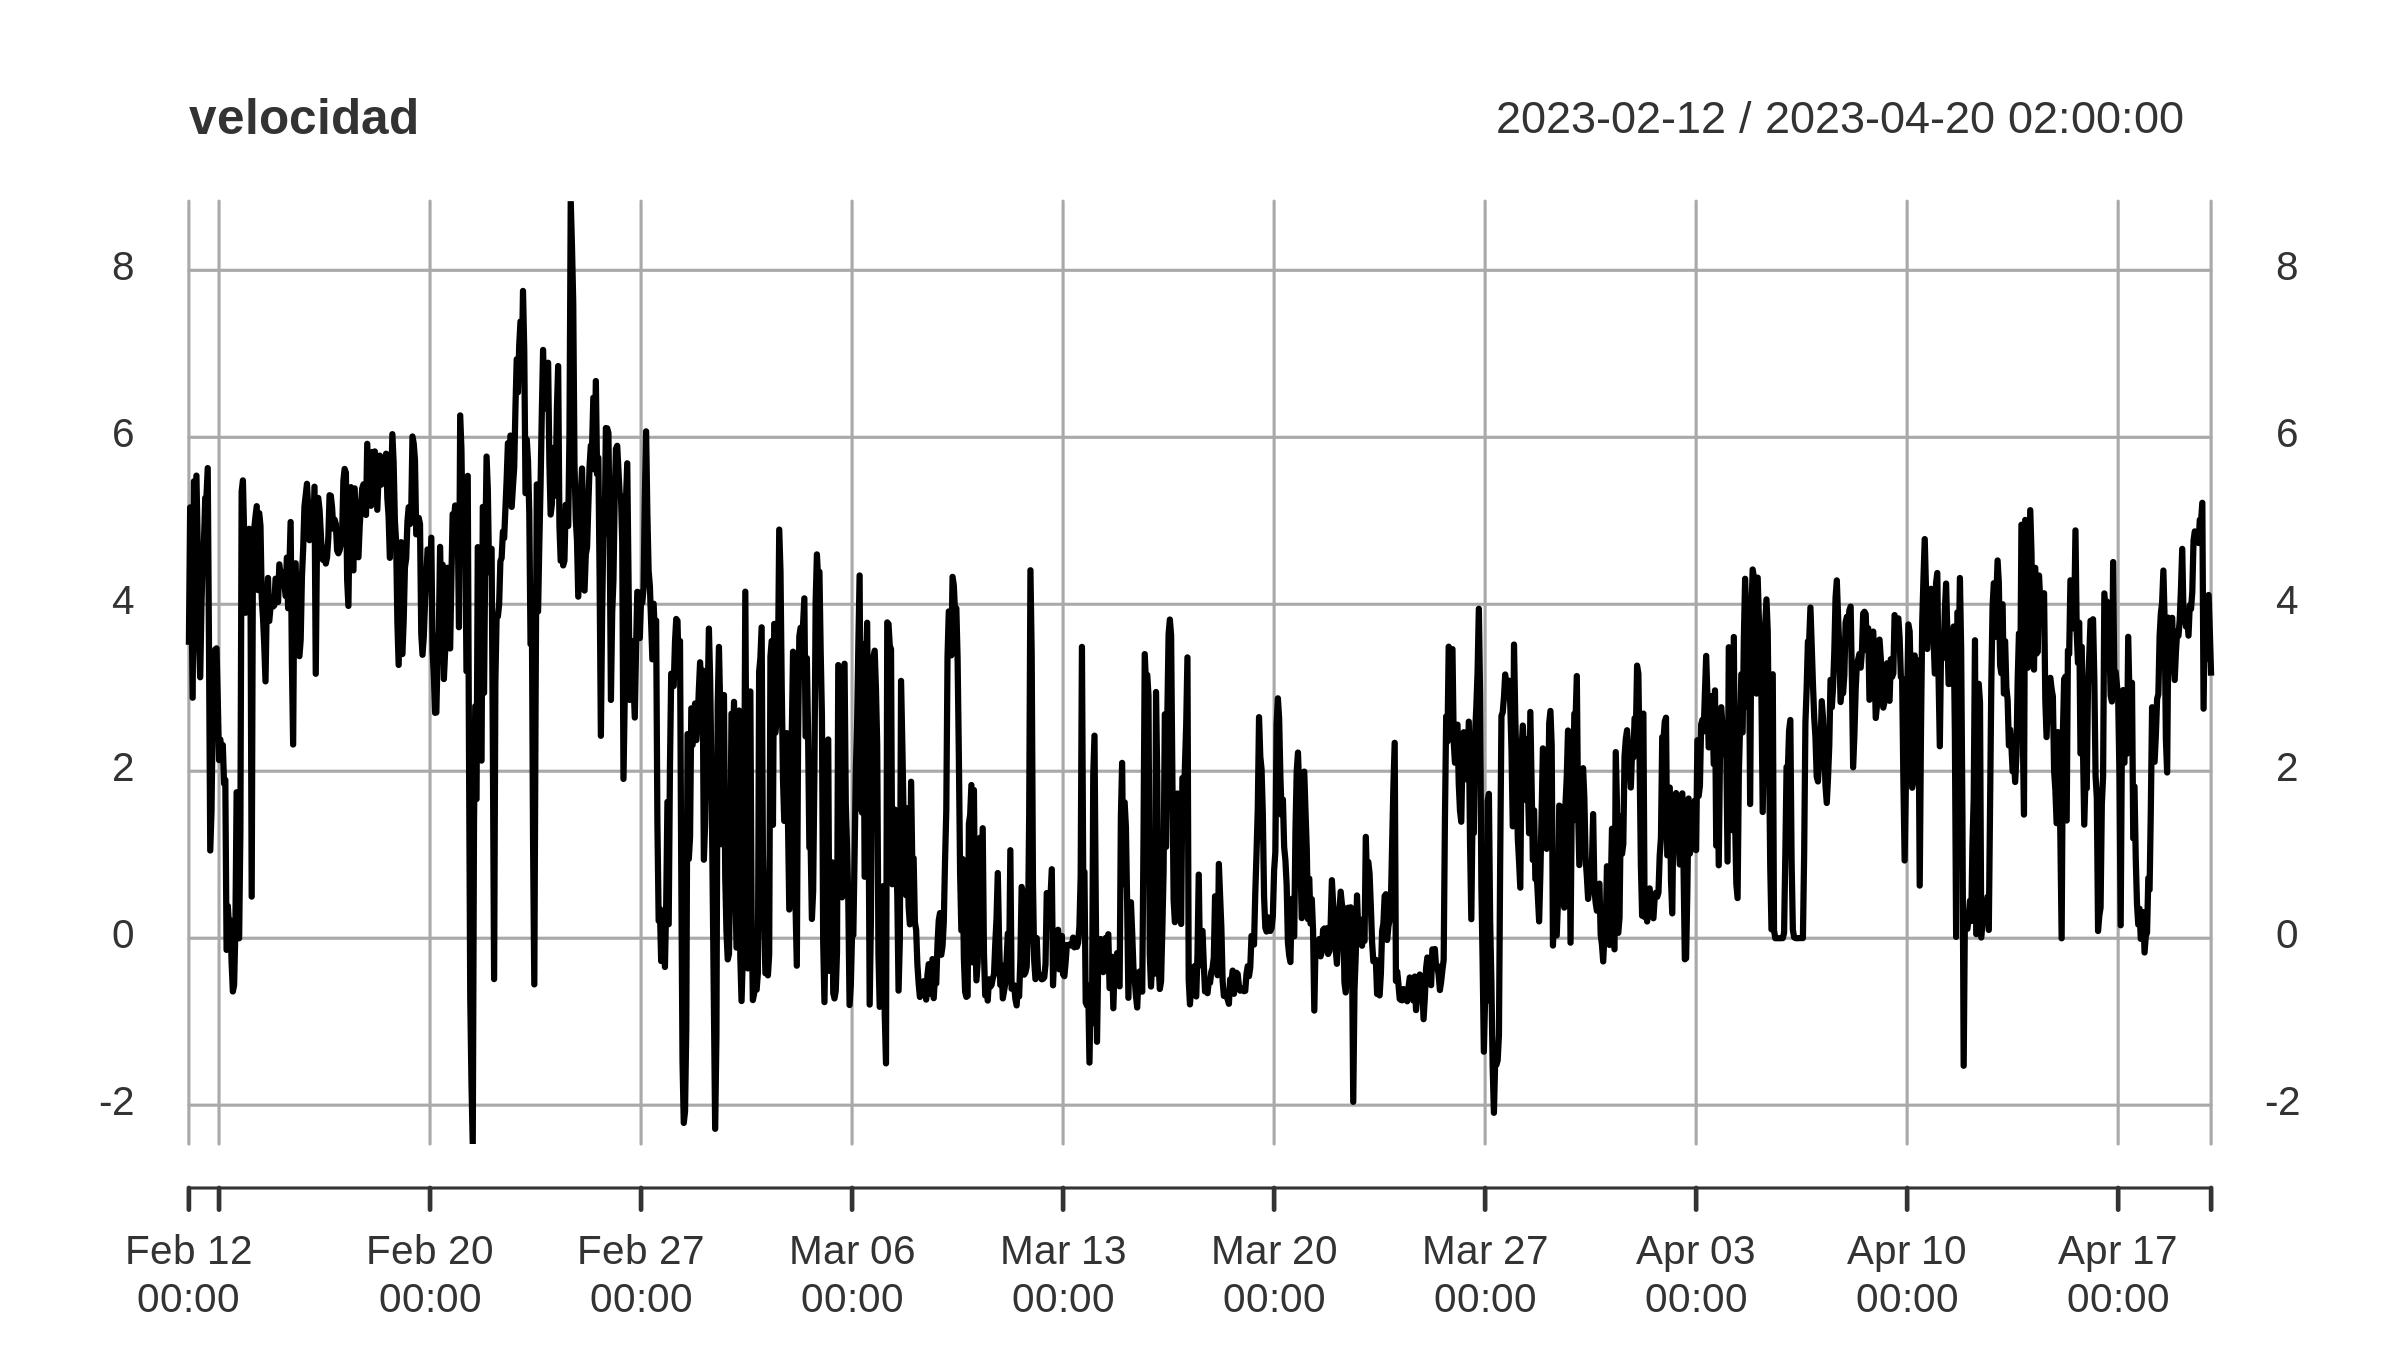

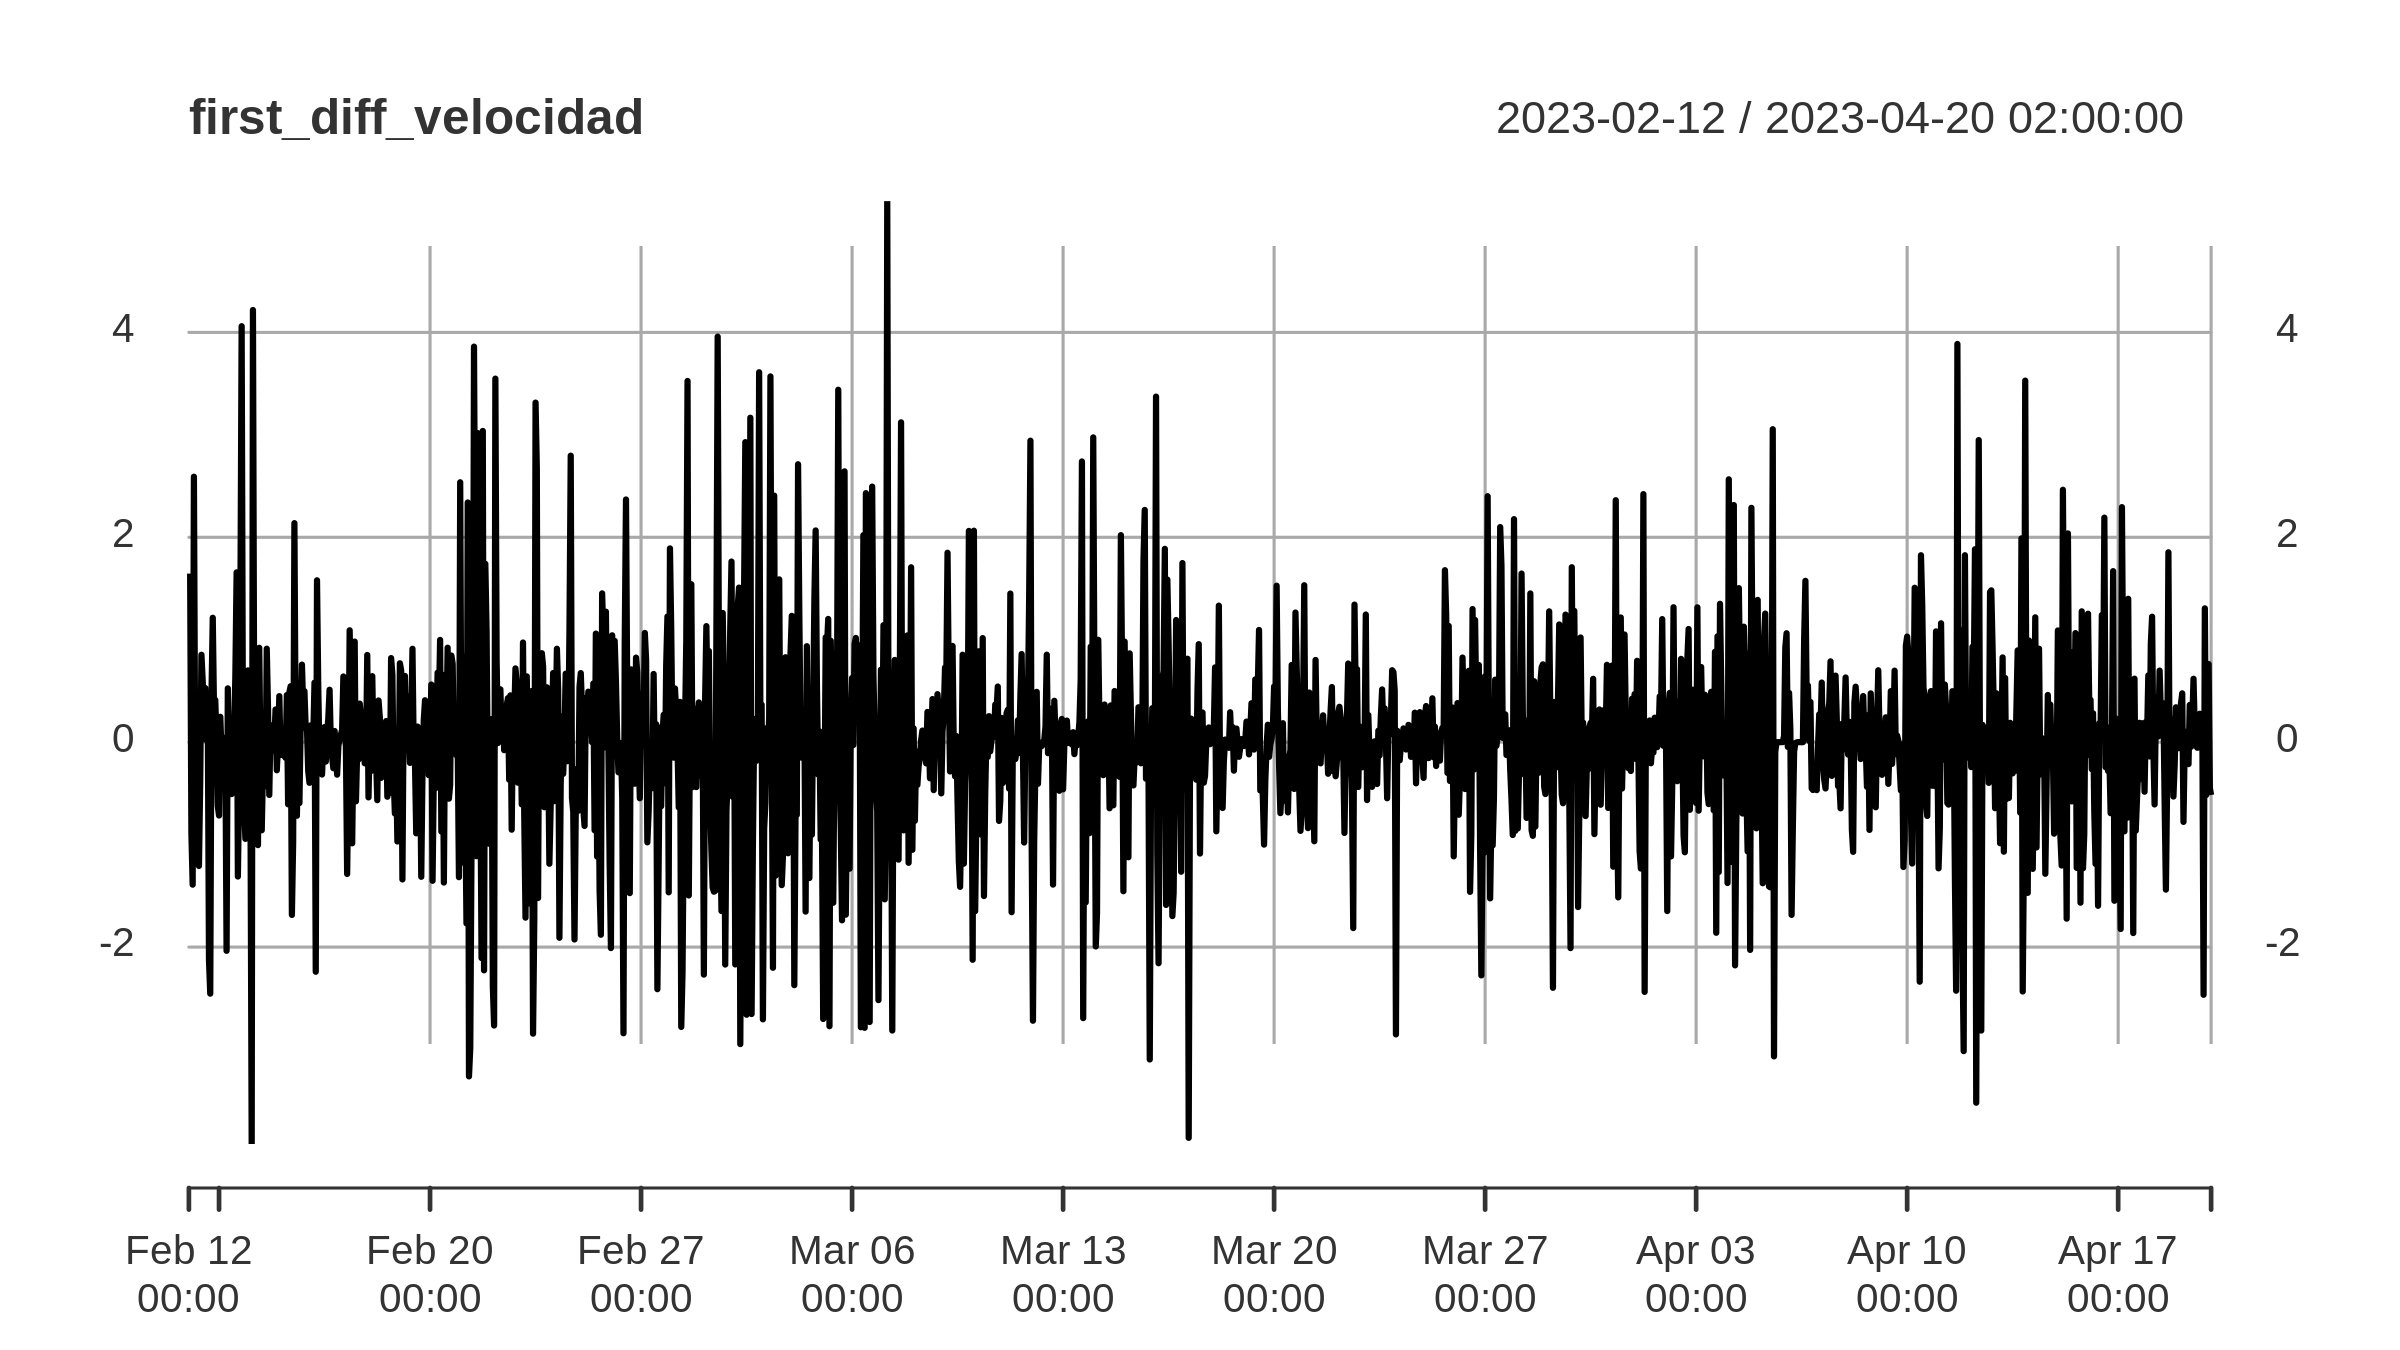

In [ ]:
plot(velocidad)
first_diff_velocidad = diff(velocidad)
plot(first_diff_velocidad)

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
ACF  0.89 0.79 0.73 0.69 0.66 0.64 0.62 0.60 0.6  0.60  ⋯     0.51   0.50 0.50 
PACF 0.89 0.01 0.14 0.07 0.07 0.07 0.04 0.05 0.1  0.03  ⋯     0.00  -0.01 0.02 
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
ACF  0.51   0.50 0.51  0.51   0.51 0.5    0.49
PACF 0.04  -0.01 0.03  0.04  -0.04 0.0   -0.02

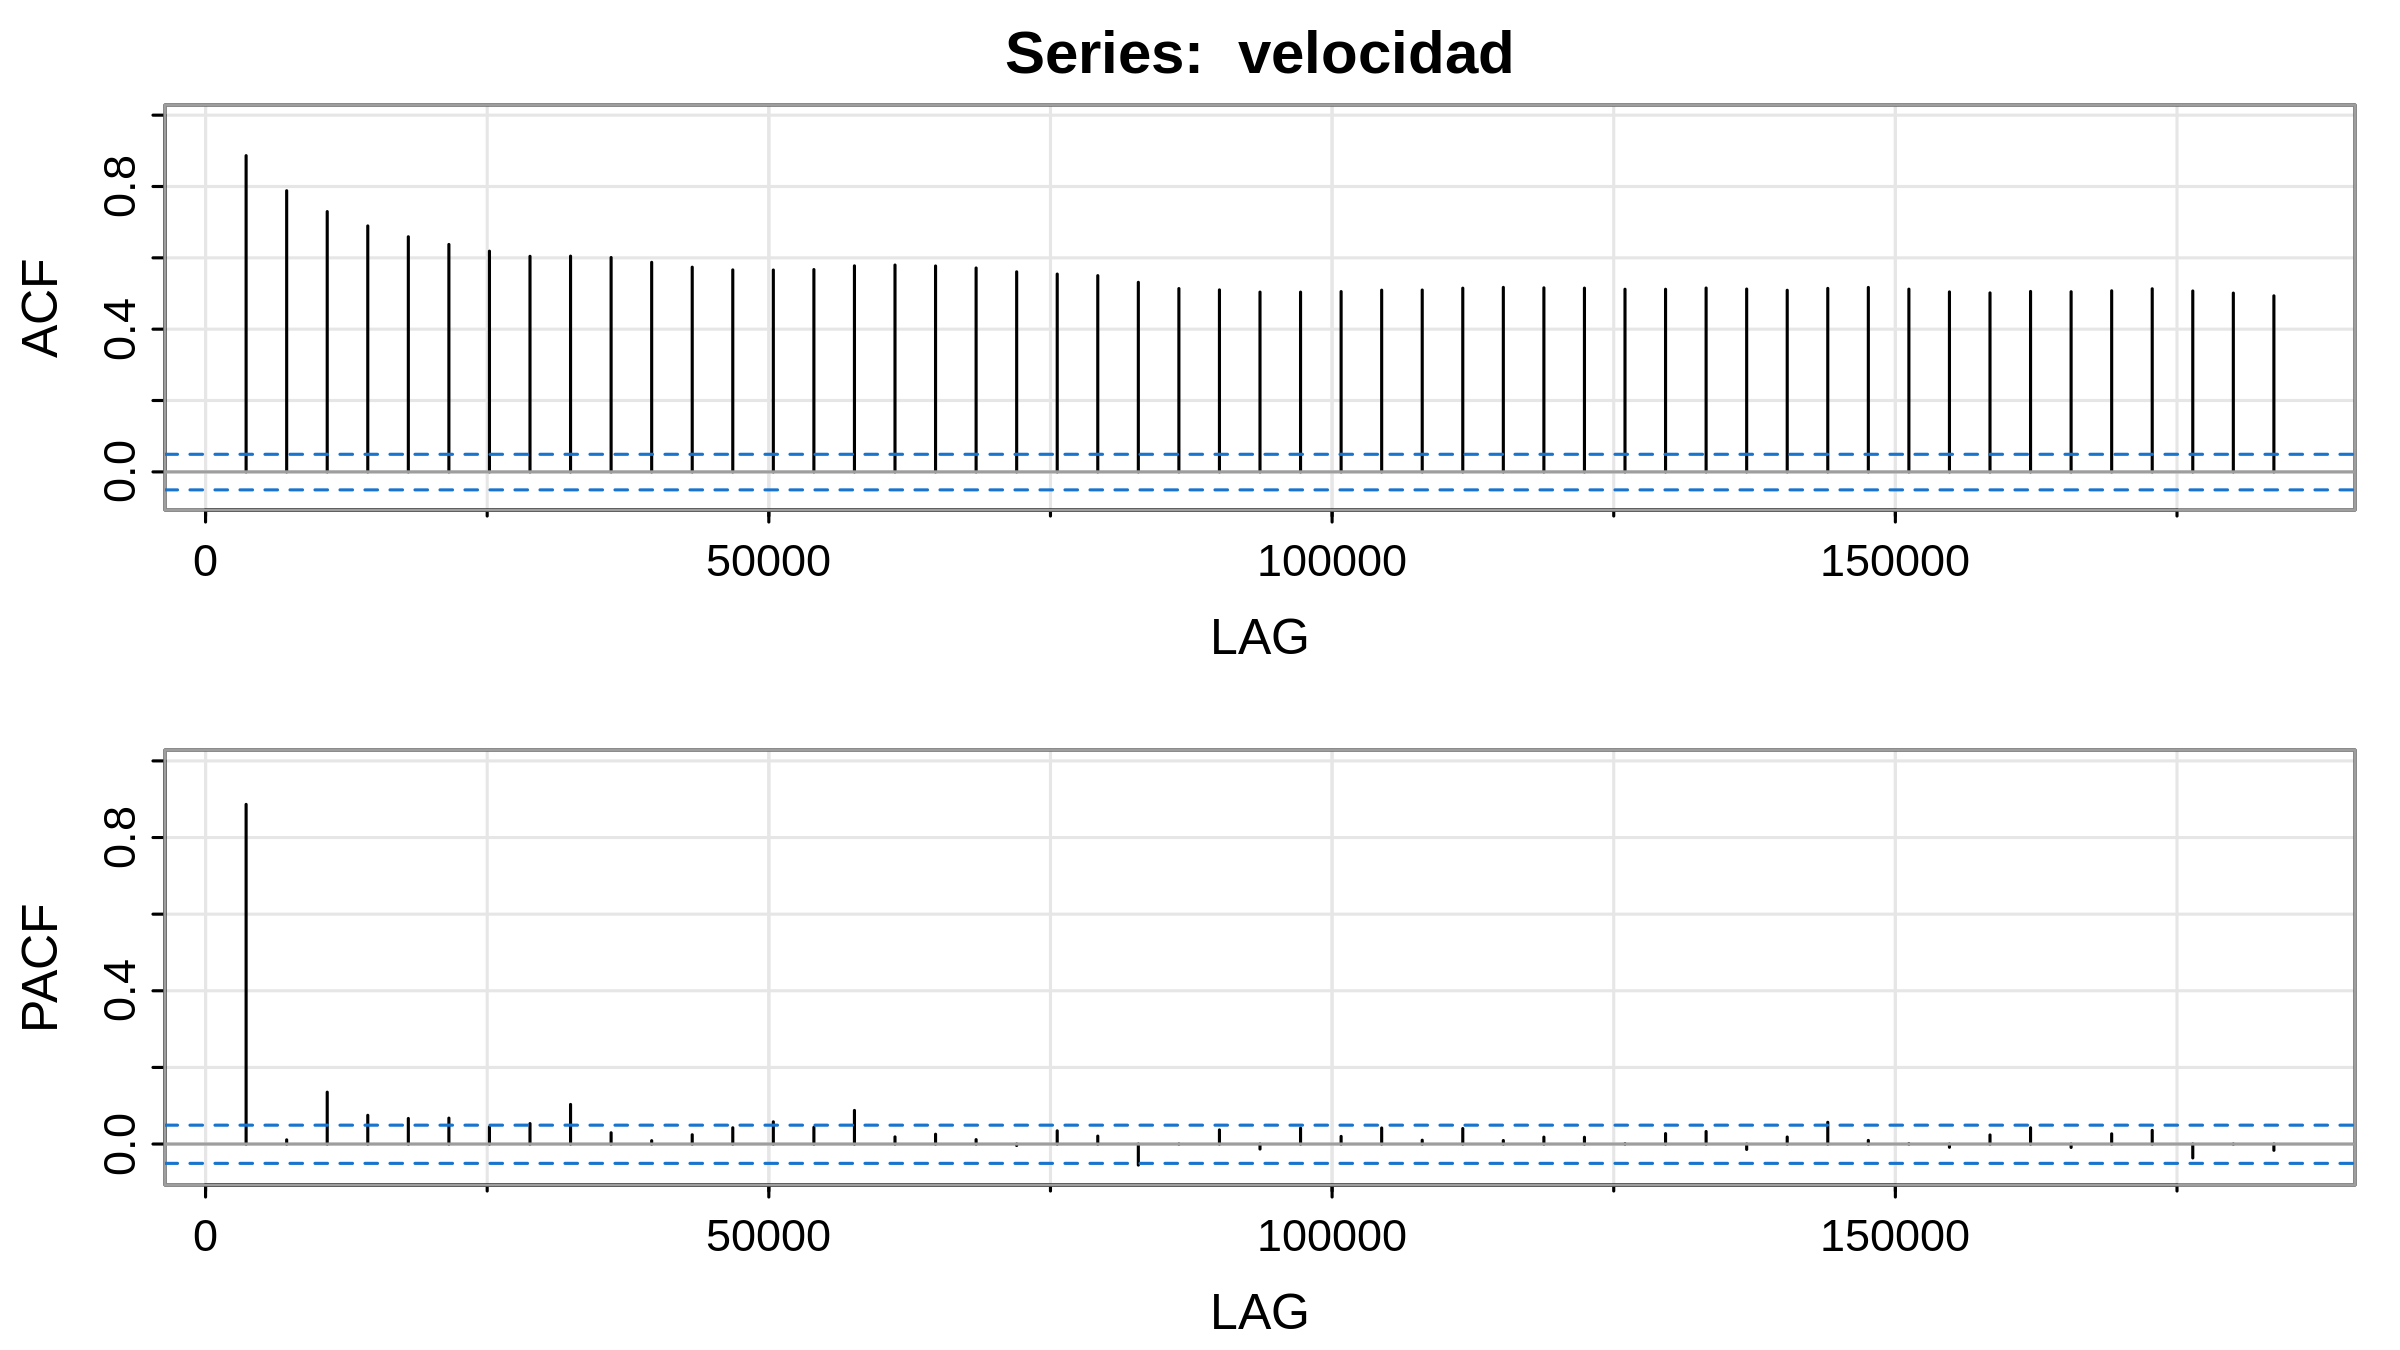

[,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9]  [,10] [,11] [,12]
ACF  -0.07 -0.18 -0.08 -0.05 -0.04 -0.01 -0.02 -0.06  0.02  0.04 ⋯     0.01 
PACF -0.07 -0.18 -0.11 -0.10 -0.09 -0.07 -0.08 -0.12 -0.04 -0.02 ⋯     0.00 
     [,13] [,14] [,15] [,16] [,17] [,18] [,19] [,20] [,21]
ACF  -0.02 -0.03 0.02  -0.02 -0.01 0.05  0     0.01  -0.01
PACF -0.03 -0.05 0.01  -0.03 -0.04 0.03  0     0.02  -0.01

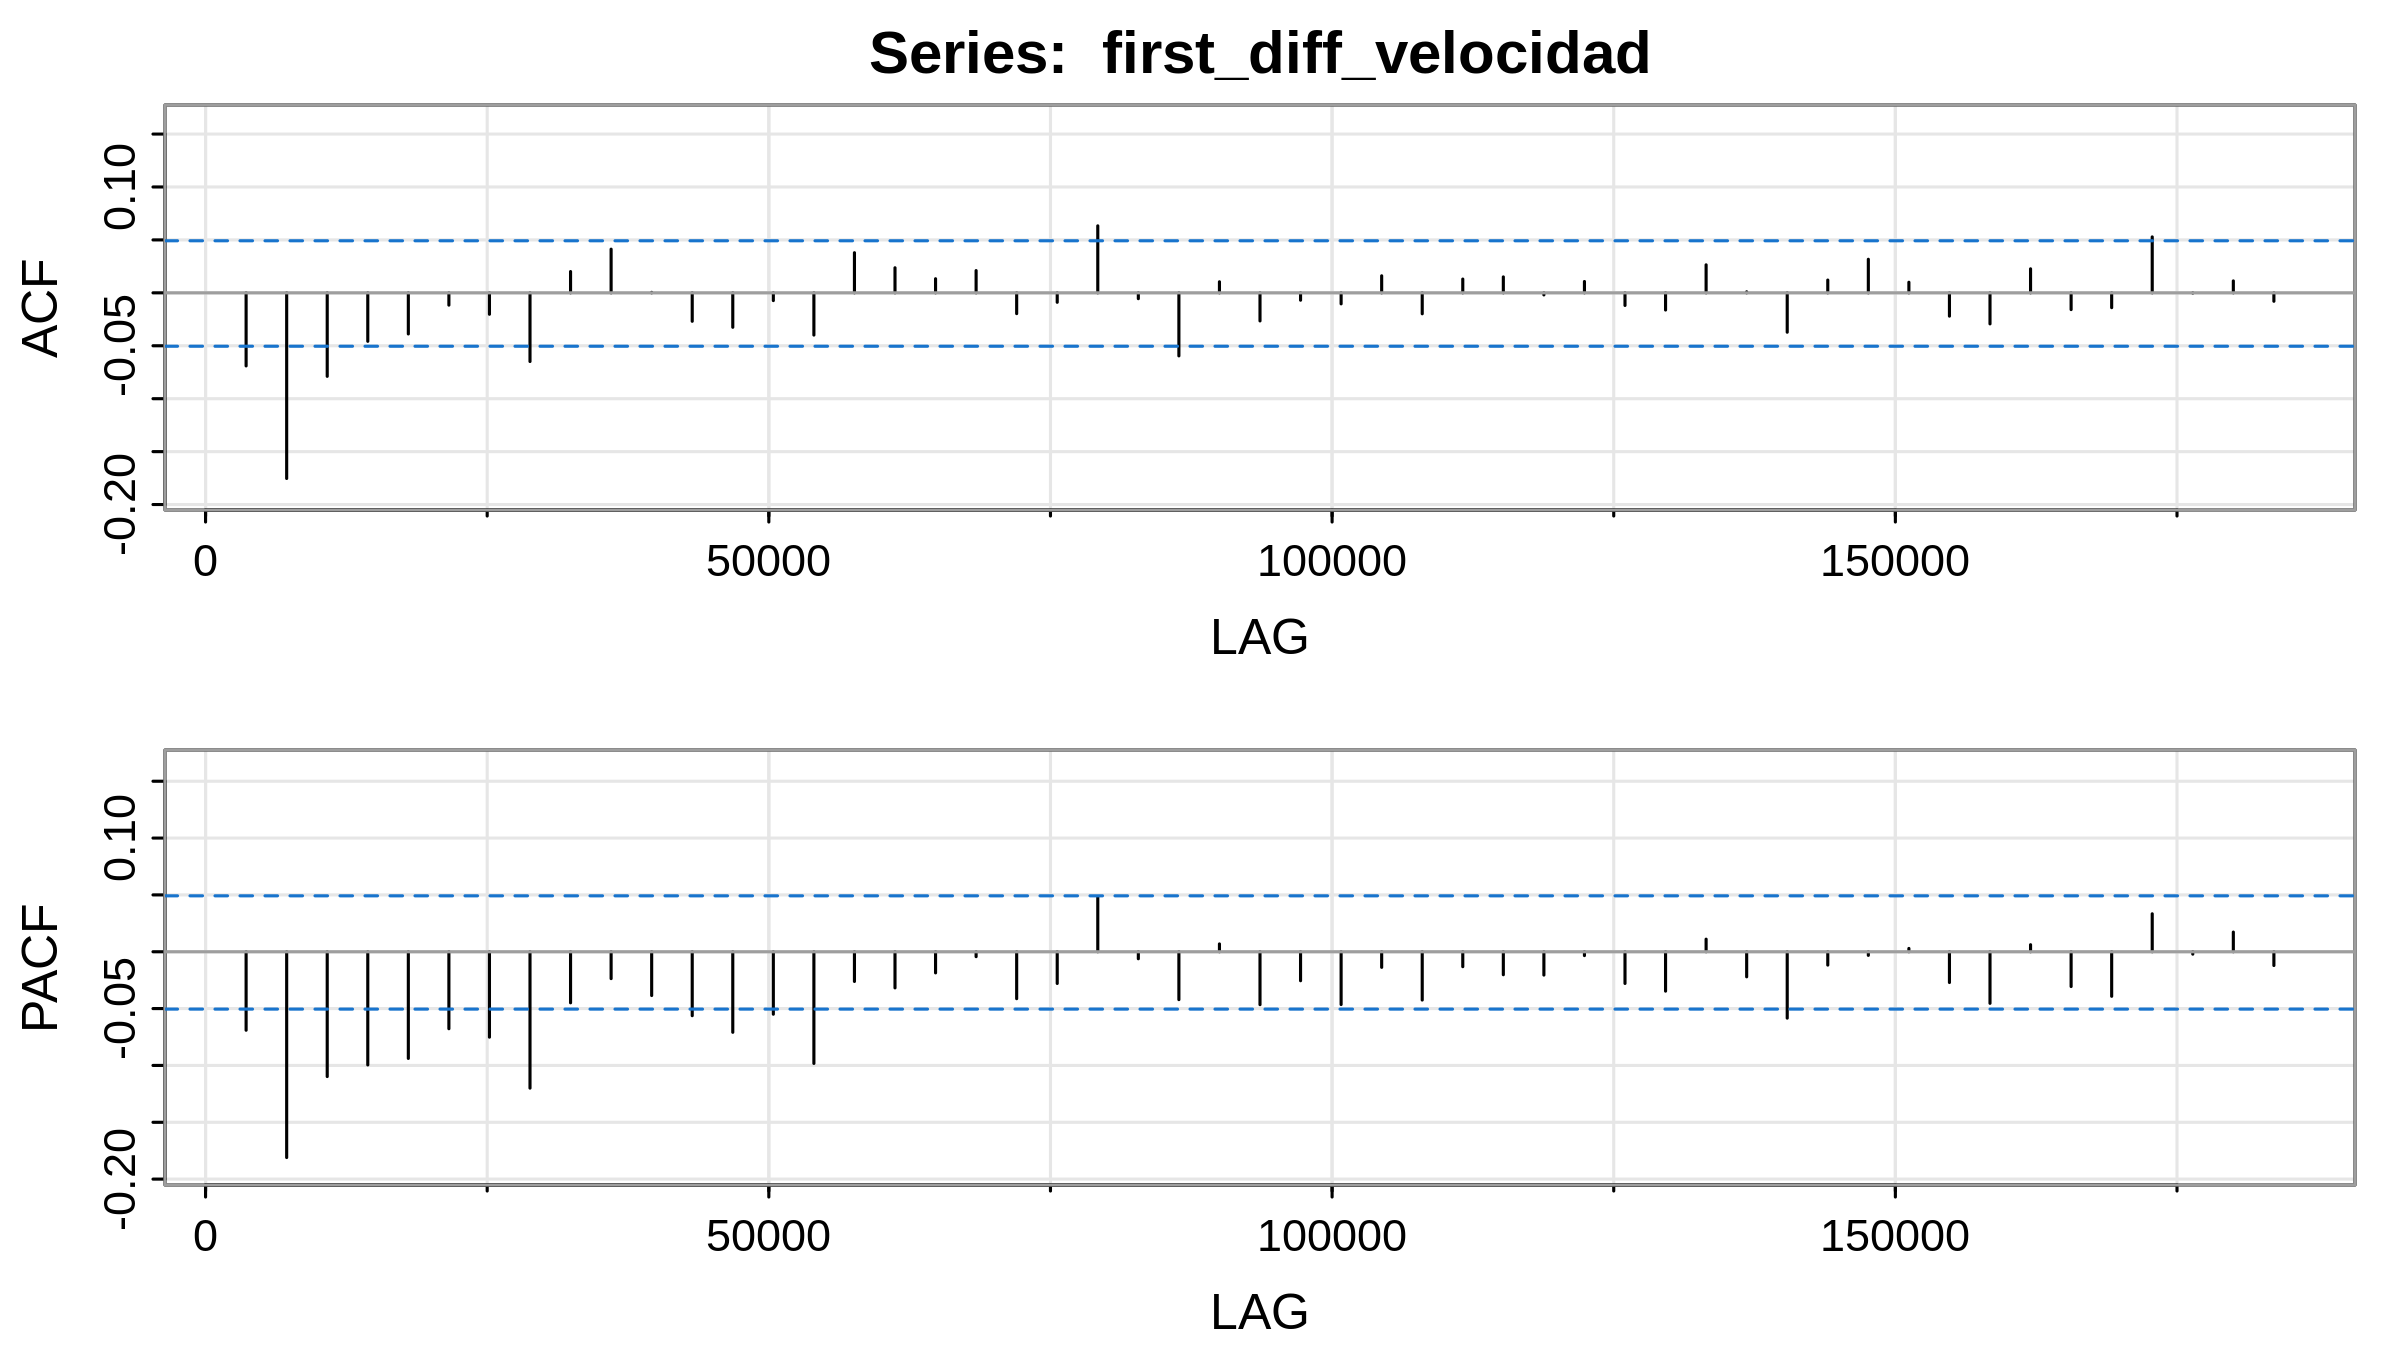

In [ ]:
acf2(velocidad)
acf2(first_diff_velocidad)

El gráfico de la acf parece no estacionario, por loq ue vamos a configar esto con el test de Dickey-Fuller.

In [ ]:
adf.test(velocidad)
adf.test(na.omit(first_diff_velocidad))

Warning message in adf.test(velocidad):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  velocidad
Dickey-Fuller = -4.537, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(na.omit(first_diff_velocidad)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  na.omit(first_diff_velocidad)
Dickey-Fuller = -16.421, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


### TPH

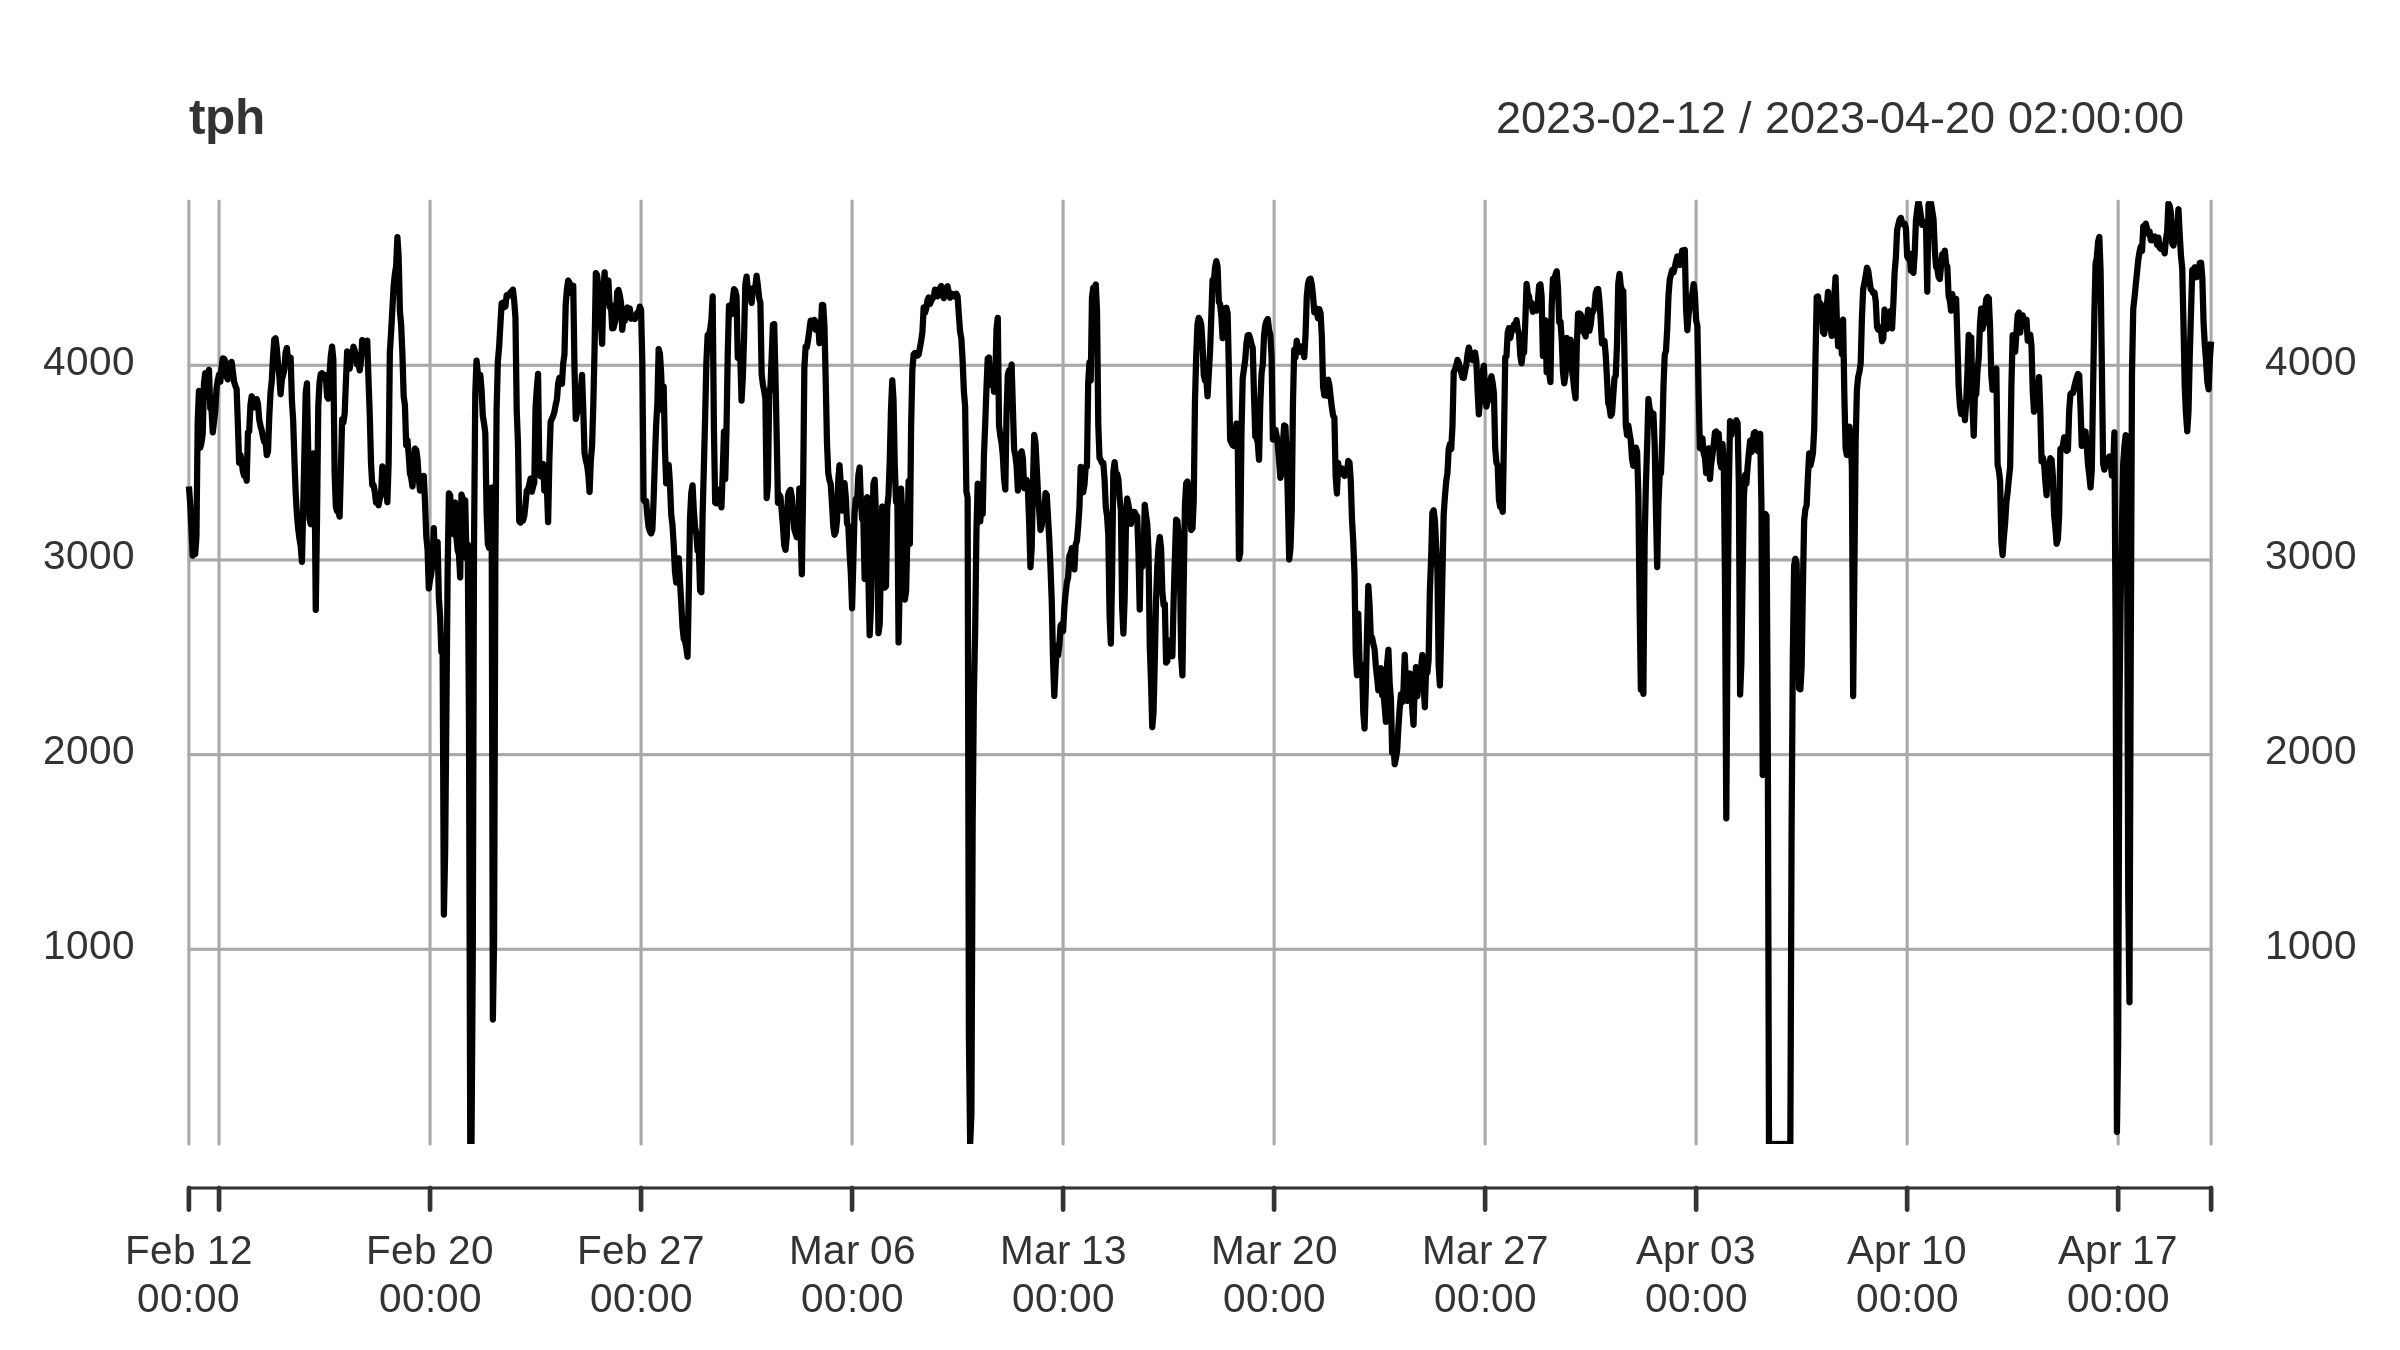

In [ ]:
plot(tph)

[,1] [,2]  [,3] [,4] [,5] [,6] [,7] [,8] [,9]  [,10] [,11] [,12] [,13]
ACF  0.94  0.84 0.76 0.70 0.66 0.62 0.59 0.57  0.55  0.52 ⋯      0.04 0.04 
PACF 0.94 -0.34 0.22 0.03 0.02 0.02 0.07 0.04 -0.01 -0.06 ⋯     -0.01 0.01 
     [,14] [,15] [,16] [,17] [,18] [,19] [,20] [,21]
ACF  0.04  0.04  0.04  0.05   0.05 0.05  0.04   0.04
PACF 0.01  0.01  0.02  0.00  -0.01 0.01  0.00  -0.01

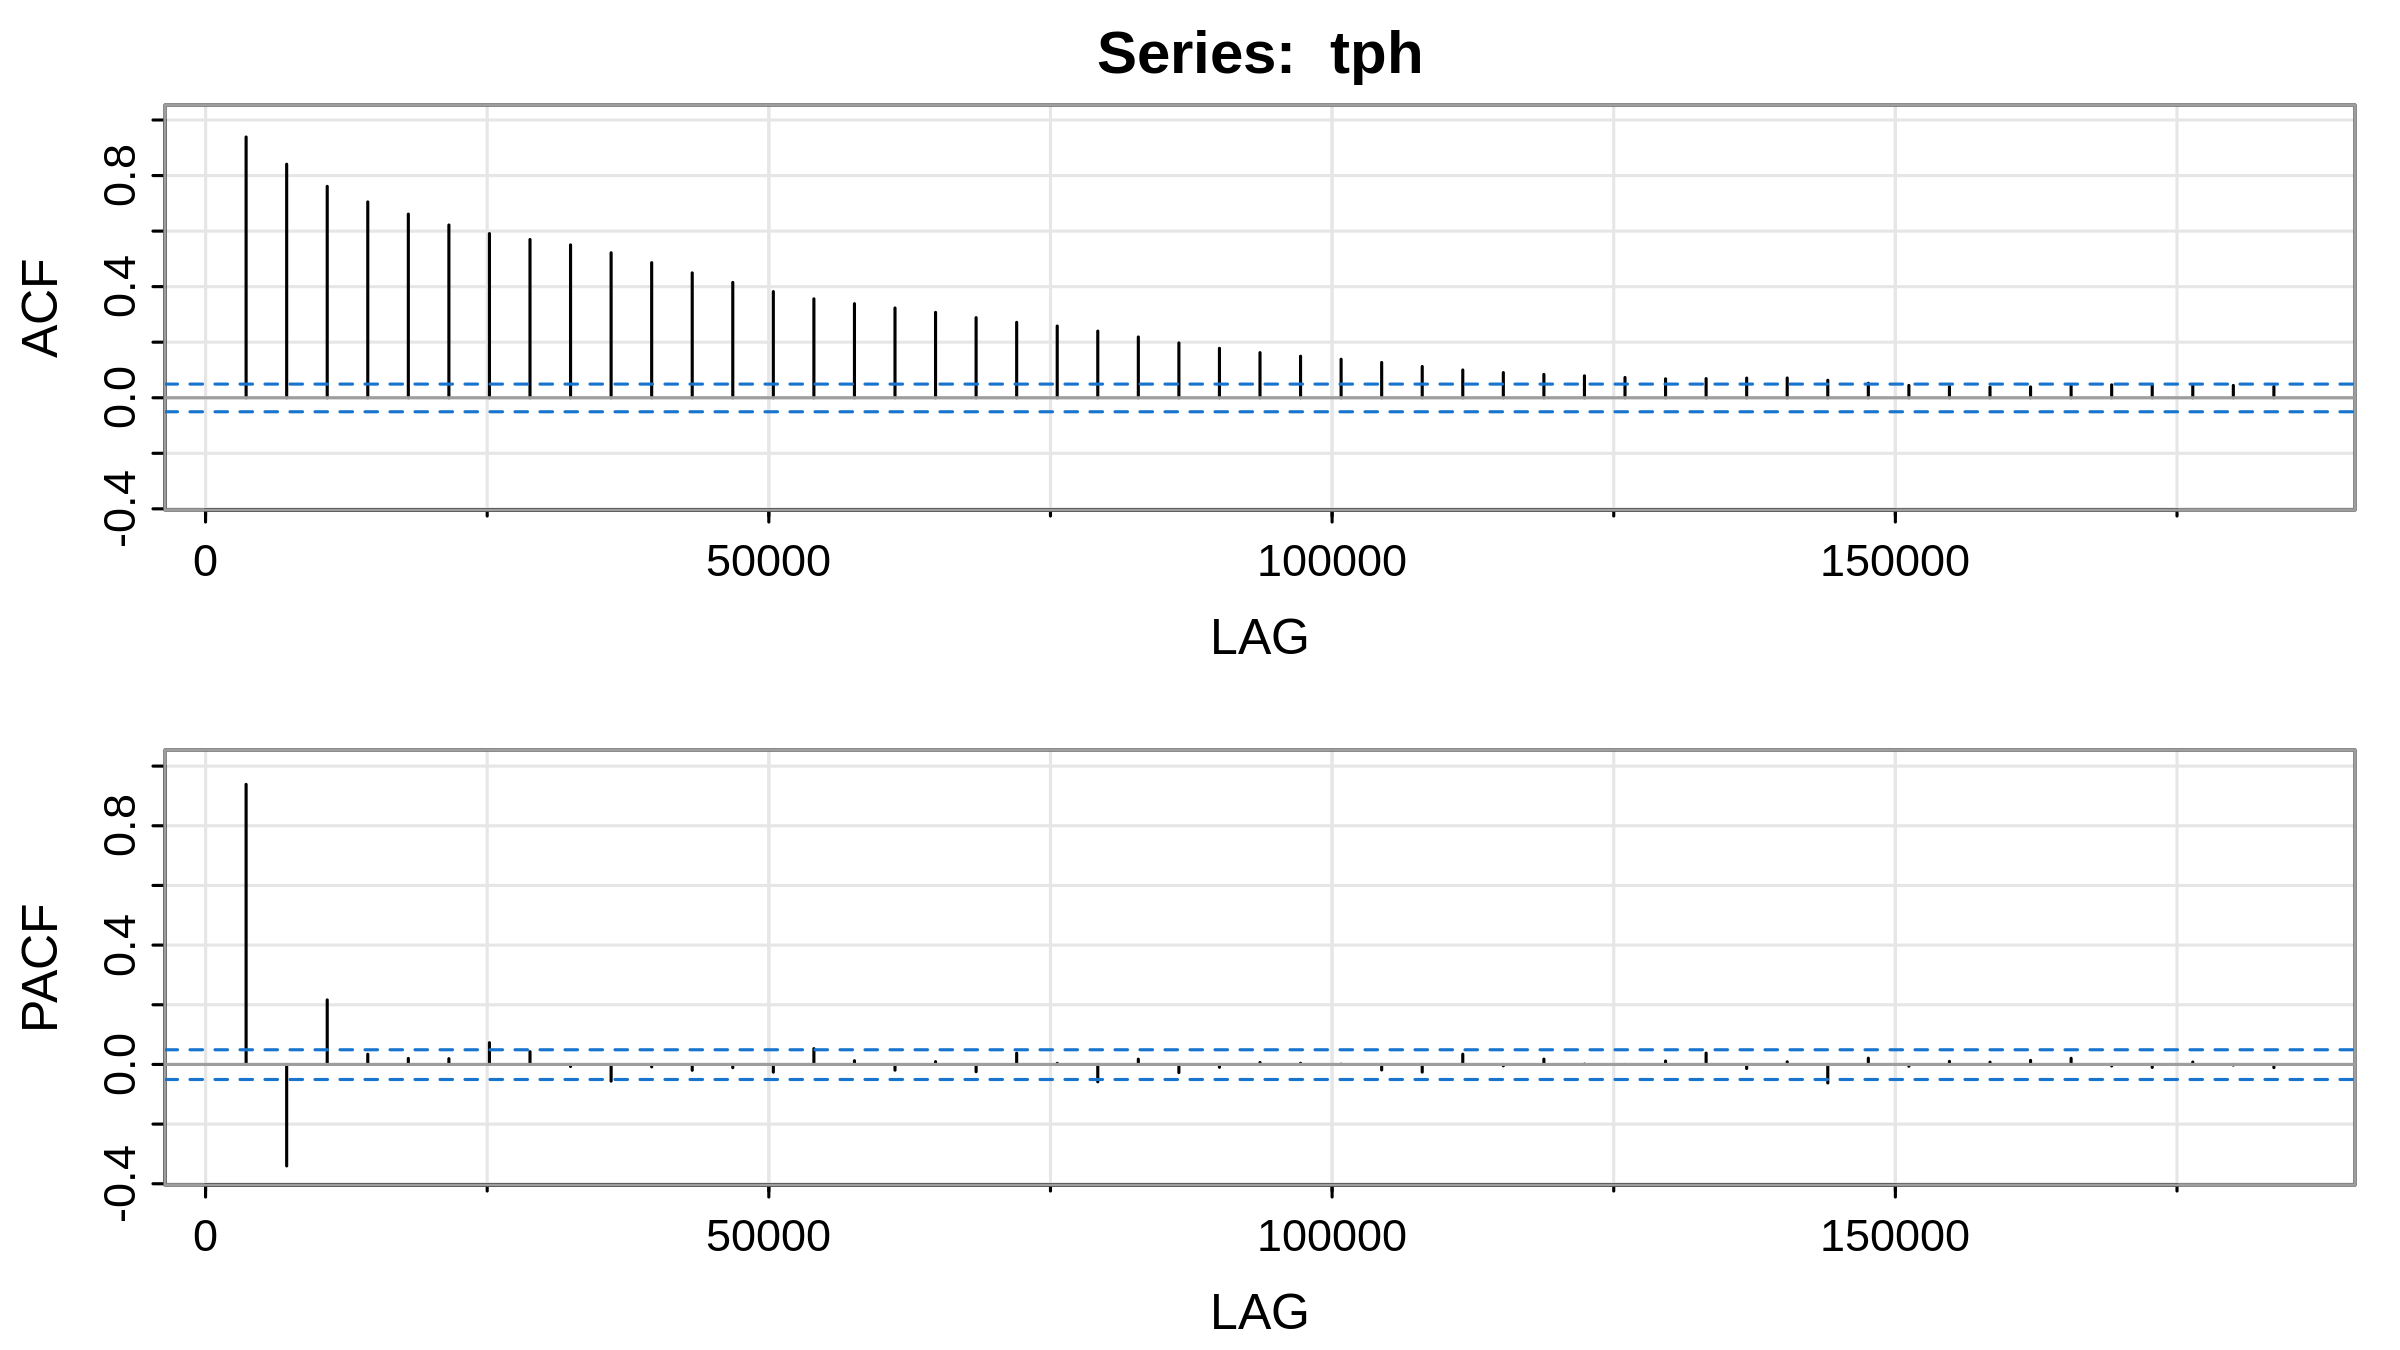

In [ ]:
acf2(tph)

[,1] [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9] [,10] [,11] [,12]
ACF  0.3  -0.15 -0.19 -0.10 -0.04 -0.07 -0.08 -0.01 0.07  0.06 ⋯     -0.03
PACF 0.3  -0.26 -0.07 -0.05 -0.05 -0.10 -0.07 -0.02 0.03 -0.02 ⋯     -0.03
     [,13] [,14] [,15] [,16] [,17] [,18] [,19] [,20] [,21]
ACF  -0.02 -0.02 -0.02 -0.01 0.02   0.02  0.01 0.02  0.02 
PACF -0.02 -0.03 -0.03 -0.01 0.00  -0.02 -0.01 0.00  0.01

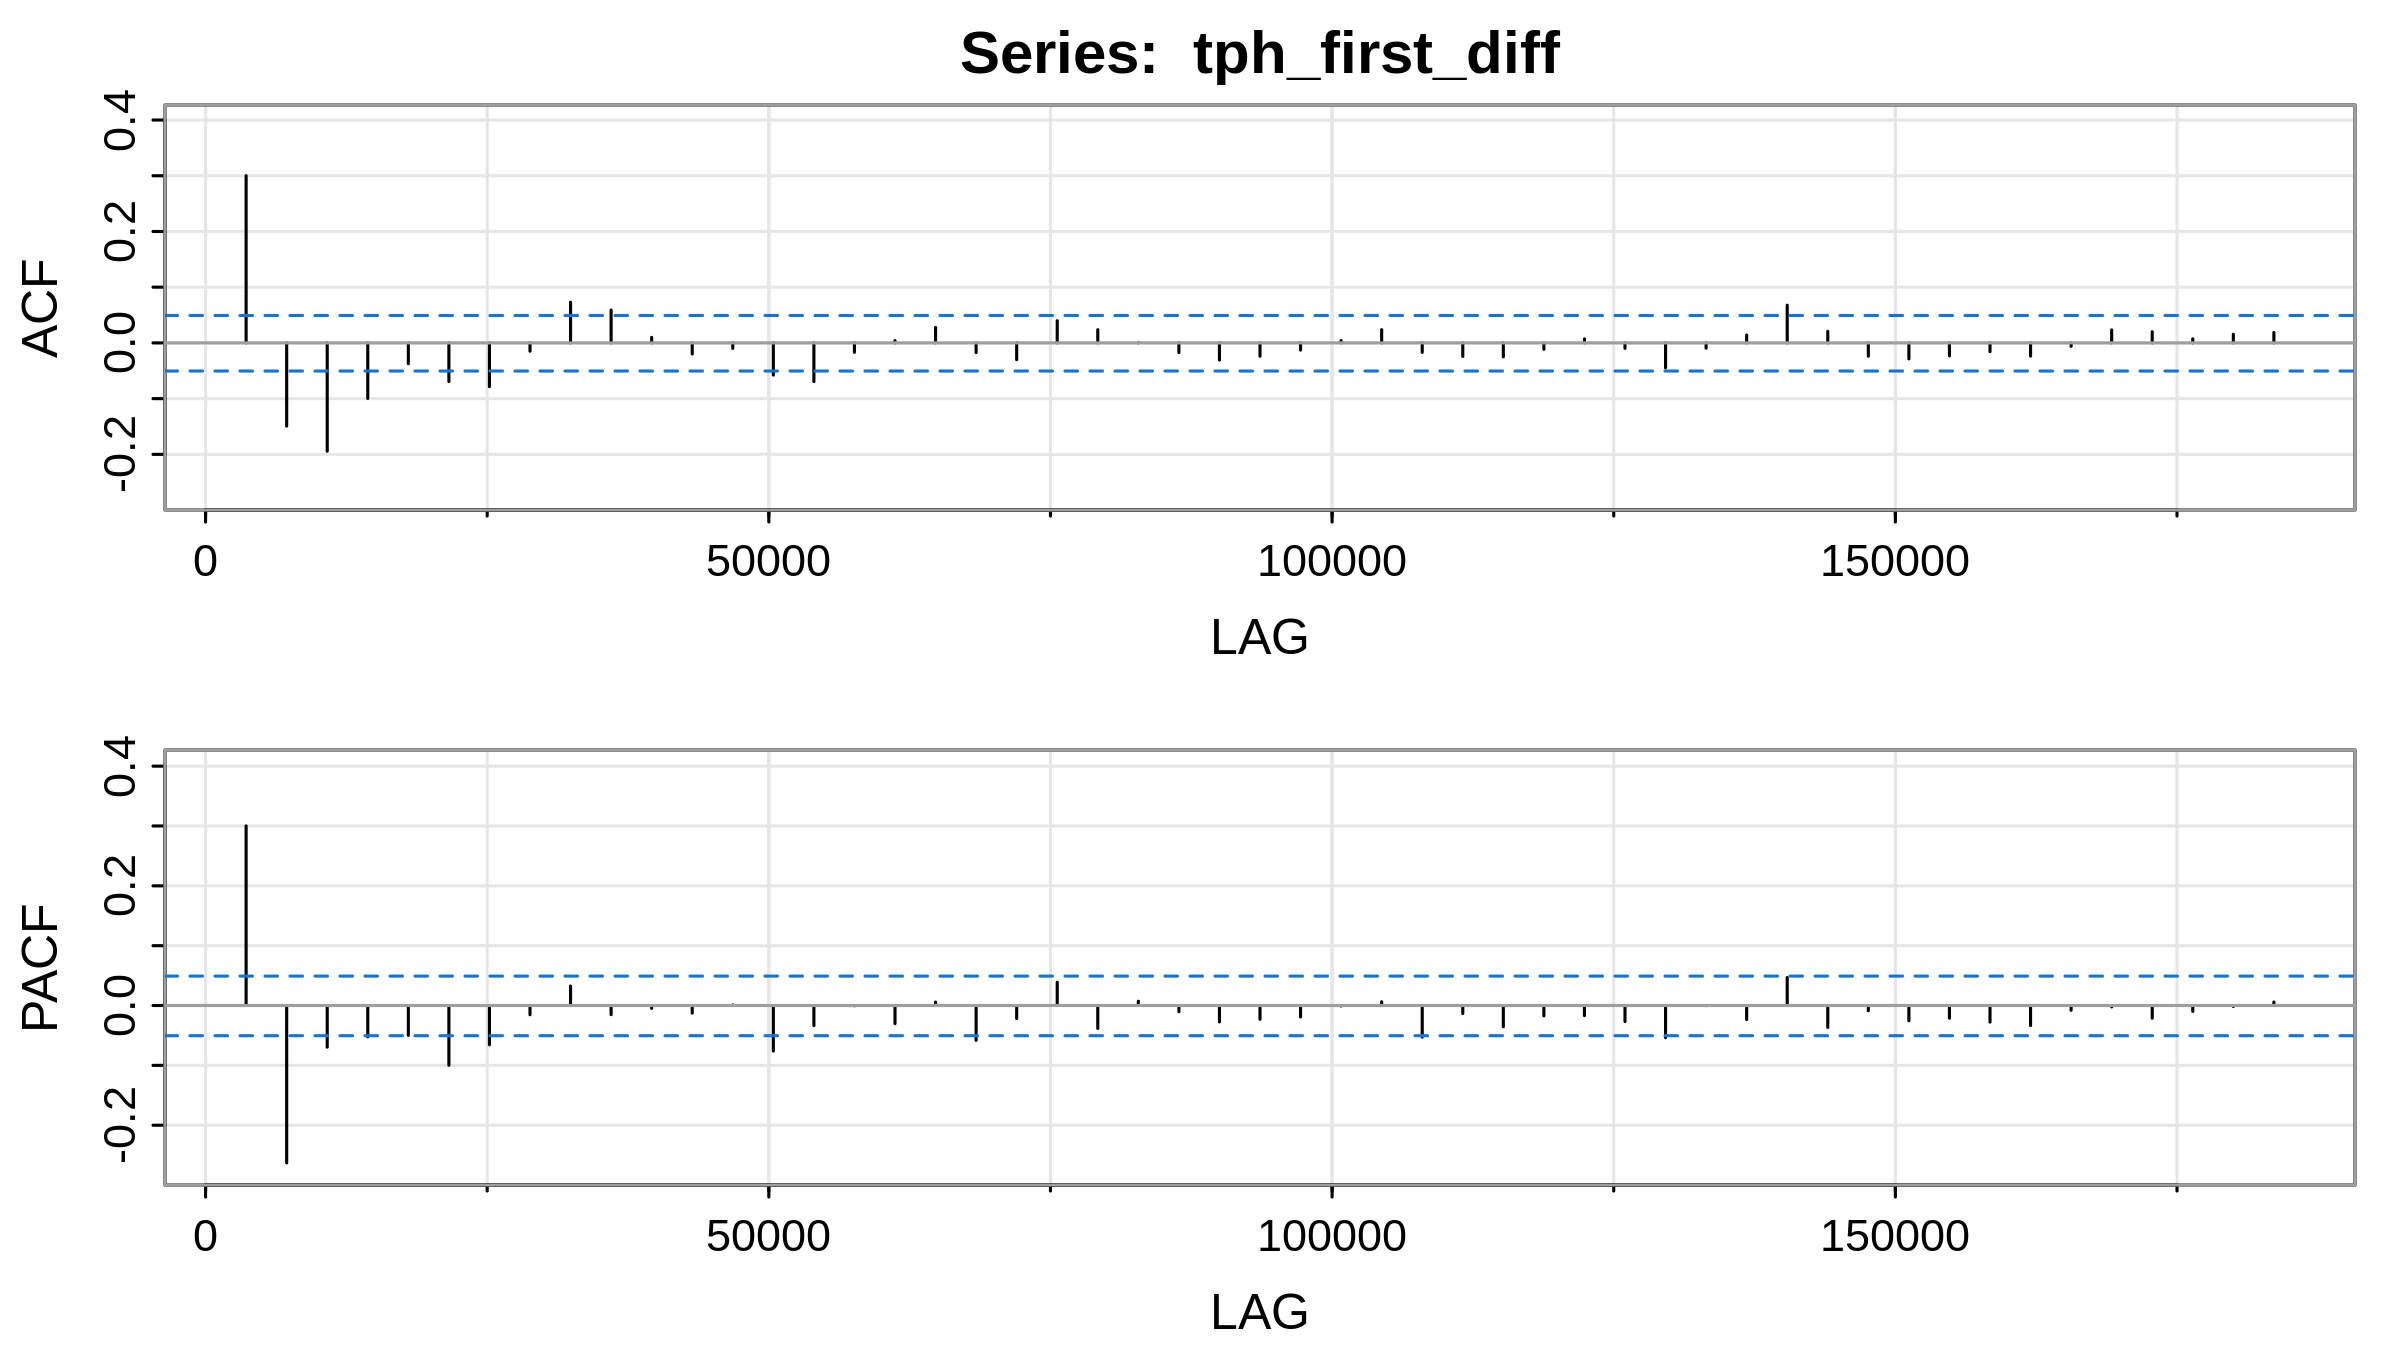

In [ ]:
tph_first_diff = diff(tph)
acf2(tph_first_diff)

In [ ]:
str(mineralogia)
mineralogia$Agregacion <- NULL
mineralogia$Planta <- NULL
str(mineralogia)

An xts object on 2023-02-12 / 2023-04-20 02:00:00 containing: 
  Data:    character [1473, 130]
  Columns: Agregacion, Planta, dump_tons, dump_tph, disp_tph_plant_estim ... with 125 more columns
  Index:   POSIXct,POSIXt [1473] (TZ: "")
An xts object on 2023-02-12 / 2023-04-20 02:00:00 containing: 
  Data:    character [1473, 128]
  Columns: dump_tons, dump_tph, disp_tph_plant_estim, disp_ley_cu_tot, disp_ley_cu_solu ... with 123 more columns
  Index:   POSIXct,POSIXt [1473] (TZ: "")


In [ ]:
# Assume df is your data frame or xts object

# Check if each column is numeric
is_numeric <- sapply(mineralogia, is.numeric)

# Print the result
print(is_numeric)

# Get the names of the non-numeric columns
non_numeric_cols <- names(mineralogia)[!is_numeric]

# Print the result
print(non_numeric_cols)

            dump_tons              dump_tph  disp_tph_plant_estim 
                FALSE                 FALSE                 FALSE 
      disp_ley_cu_tot      disp_ley_cu_solu      disp_ley_cu_conc 
                FALSE                 FALSE                 FALSE 
        disp_ley_moly disp_ley_arsenico_ppm       disp_ley_pirita 
                FALSE                 FALSE                 FALSE 
 disp_ley_calcopirita    disp_ley_calcosina     disp_ley_covelina 
                FALSE                 FALSE                 FALSE 
   disp_crusher_index  disp_sag_power_index  disp_ball_work_index 
                FALSE                 FALSE                 FALSE 
        disp_recovery      disp_ley_bornita         disp_densidad 
                FALSE                 FALSE                 FALSE 
             rock_AND            rock_BXANH            rock_BXCEN 
                FALSE                 FALSE                 FALSE 
           rock_BXDON            rock_BXFAN            rock_BX

In [ ]:
# mineralogia_first_diff <- diff(mineralogia)

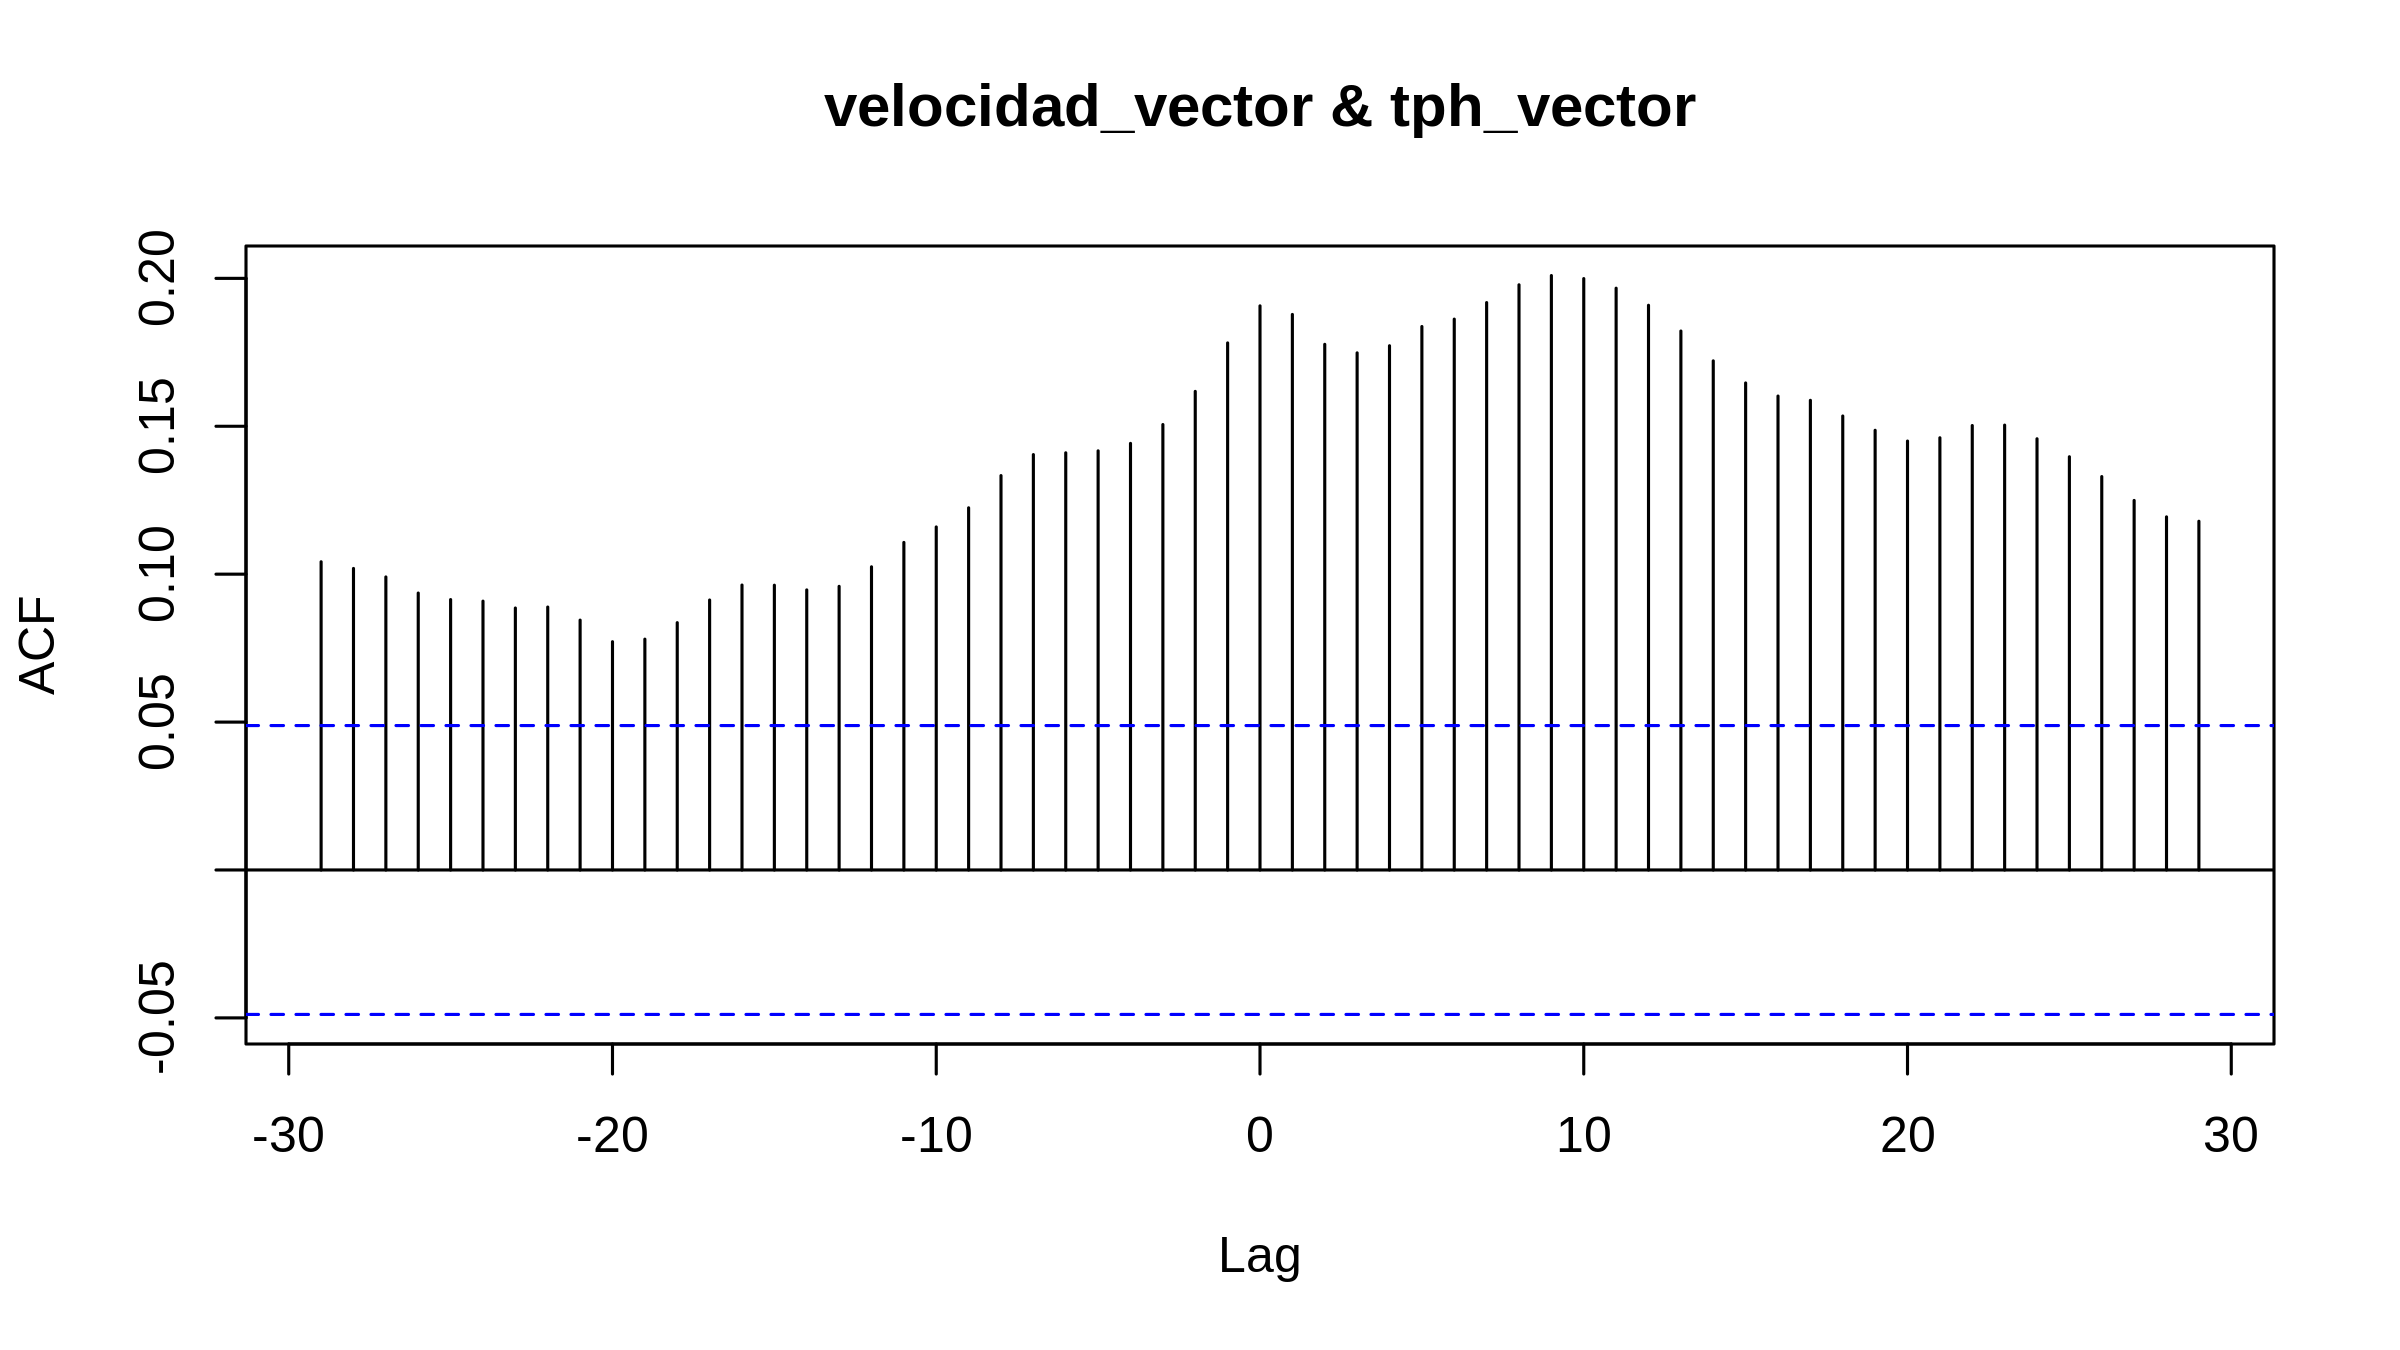

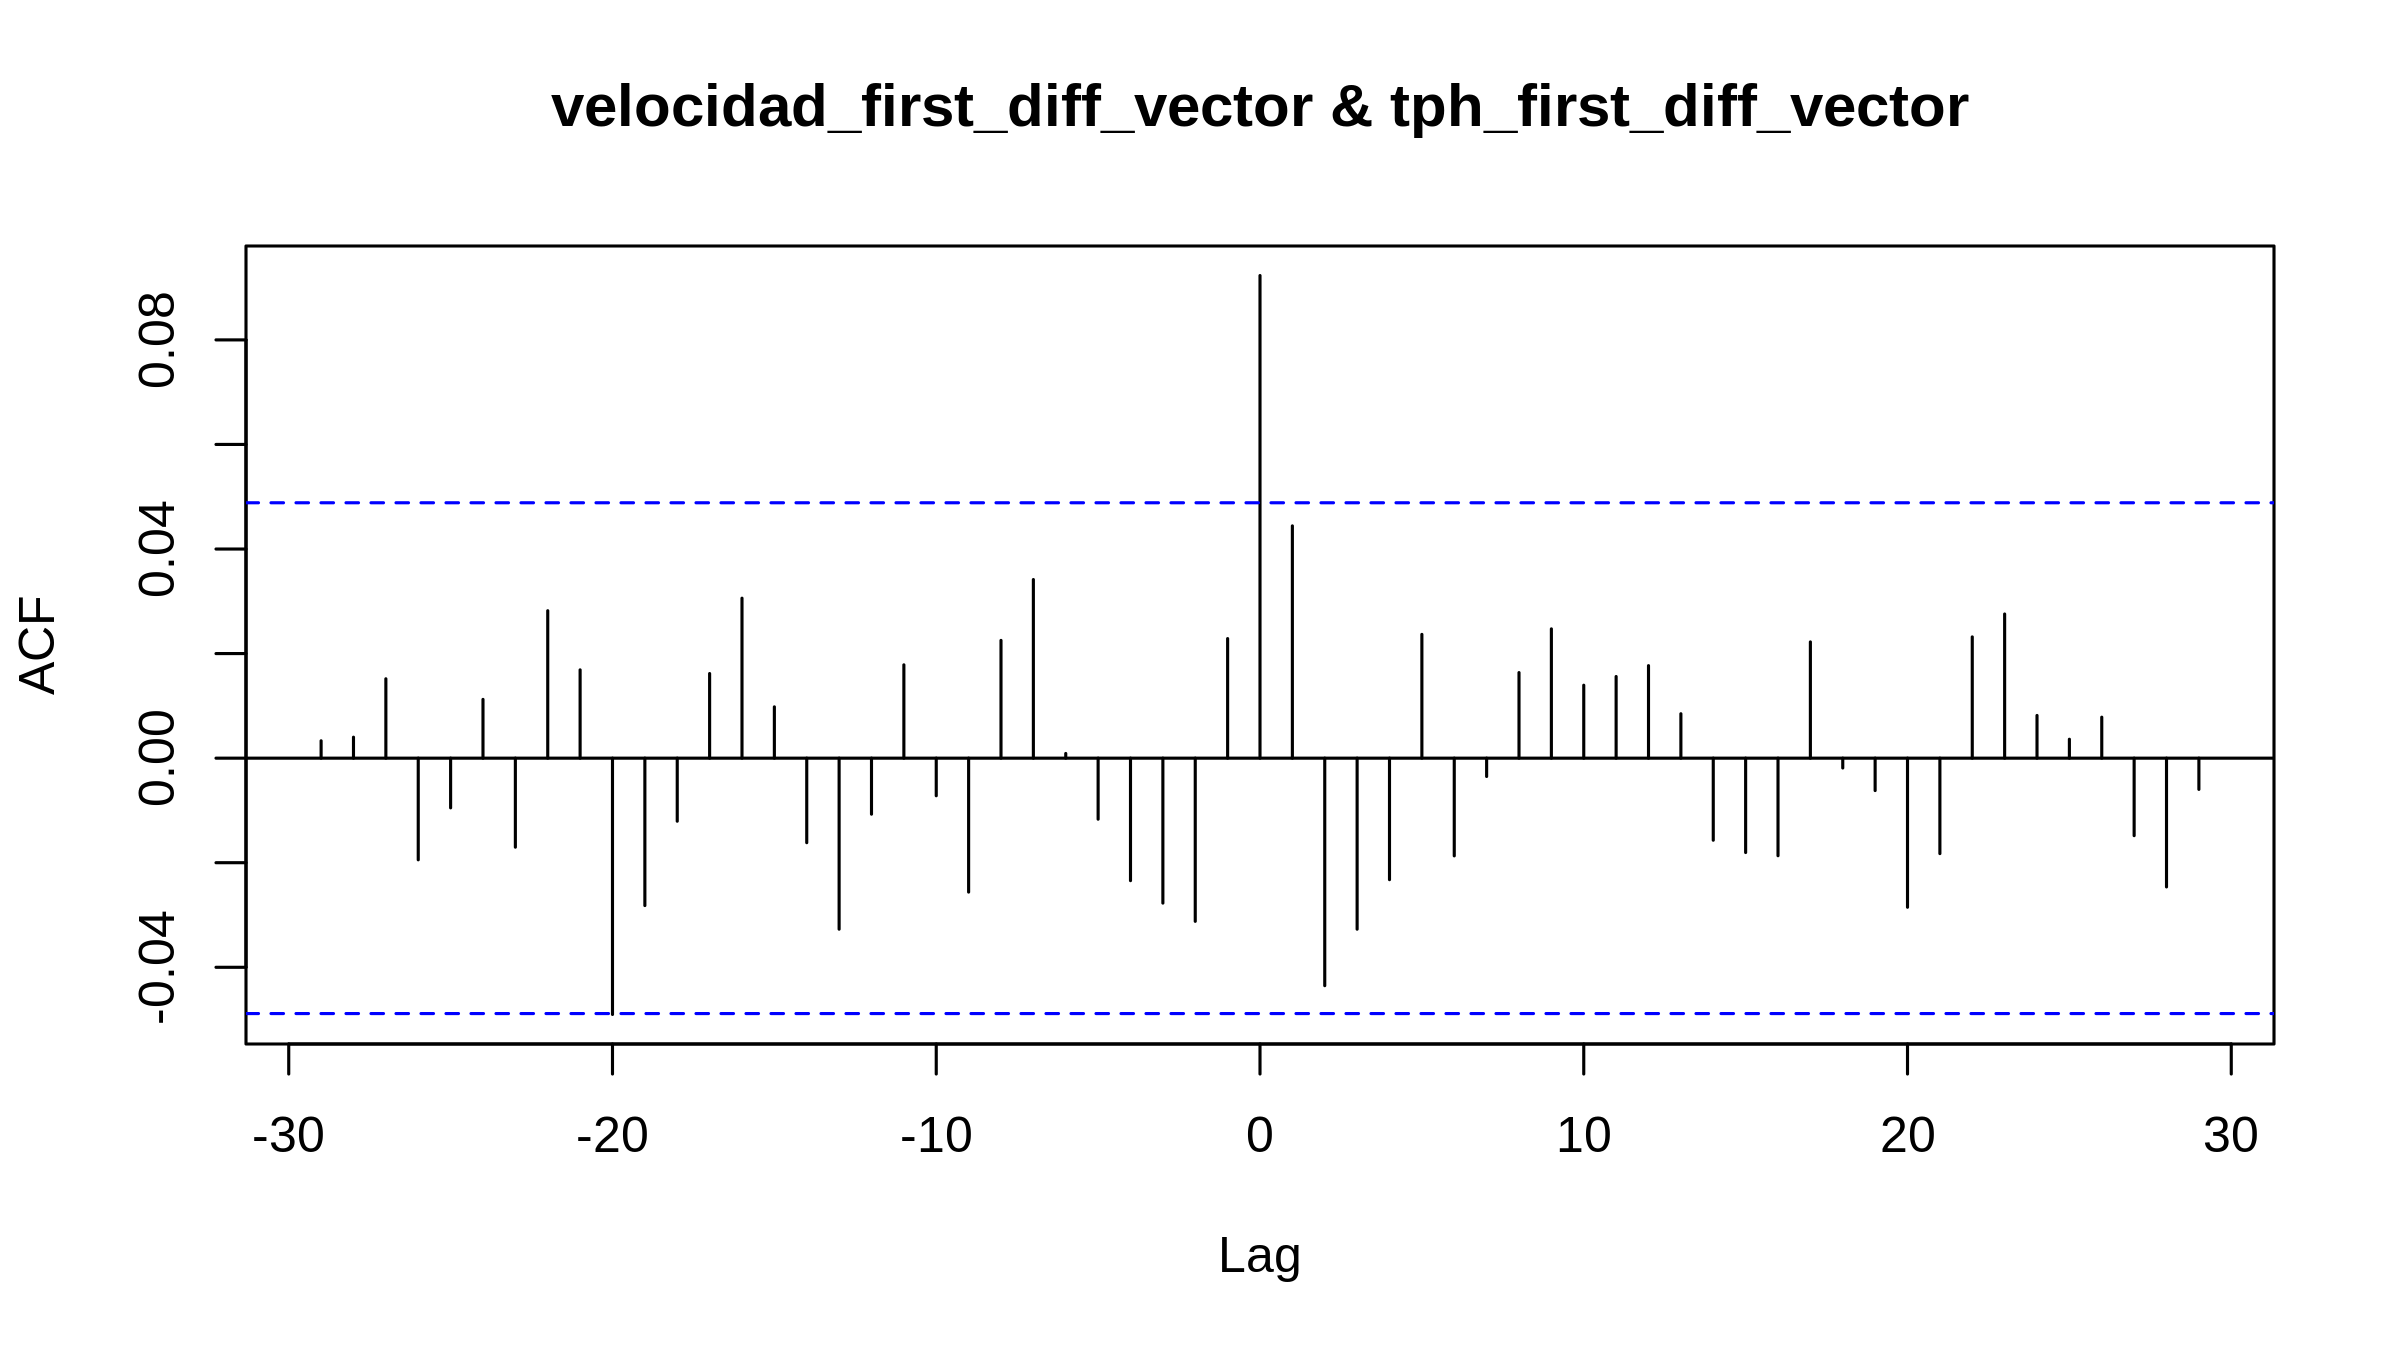

In [ ]:
# Assuming you have two xts objects ts1 and ts2
velocidad_vector <- as.vector(velocidad)
tph_vector <- as.vector(tph)

velocidad_first_diff_vector = as.vector(first_diff_velocidad)
tph_first_diff_vector = as.vector(tph_first_diff)
velocidad_first_diff_vector <- na.omit(velocidad_first_diff_vector)
tph_first_diff_vector <- na.omit(tph_first_diff_vector)


# Calculate the cross-correlation function
ccf(velocidad_vector, tph_vector)
ccf(velocidad_first_diff_vector, tph_first_diff_vector)

Seleccionamos 10 variables aleatoriamente de mineralogia:

In [ ]:
# Set the seed for reproducibility
set.seed(100)

# Assuming you have an xts object mineralogia
# Get the column names
col_names <- colnames(mineralogia)

# Select 10 random column names
random_cols <- sample(col_names, 3)

# Subset the xts object to get only the random columns
mineralogia_subset <- mineralogia[, random_cols]

# Convert each column to numeric
mineralogia_subset_matrix <- apply(mineralogia_subset, 2, as.numeric)

# Convert back to an xts object, using the original index as the order.by parameter
mineralogia_subset_numeric <- as.xts(mineralogia_subset_matrix, order.by = index(mineralogia_subset))
mineralogia_subset_numeric

                     mop_CW2 mop_Tonnes mop_RECT2
2023-02-12 00:00:00       NA   27655.94  78.58508
2023-02-12 01:00:00       NA   27655.94  78.58508
2023-02-12 02:00:00       NA   30841.03  84.82271
2023-02-12 03:00:00       NA   33819.81  80.39041
2023-02-12 04:00:00       NA         NA        NA
2023-02-12 05:00:00       NA         NA        NA
2023-02-12 06:00:00 2.200242   74203.10        NA
2023-02-12 07:00:00 2.691374   59306.86        NA
2023-02-12 10:00:00       NA         NA        NA
2023-02-12 11:00:00 2.200242   74203.10        NA
                ...                              
2023-04-19 17:00:00 2.456891  180513.97  85.36314
2023-04-19 18:00:00 2.528911  254504.70  83.02779
2023-04-19 19:00:00 2.344008  213483.88  84.69969
2023-04-19 20:00:00 2.445765  271690.75  82.76749
2023-04-19 21:00:00 2.569640  264946.60  83.41042
2023-04-19 22:00:00 2.339355  315375.62  81.39886
2023-04-19 23:00:00 2.238384  259989.90  82.84236
2023-04-20 00:00:00 2.260546  272146.38  82.52553


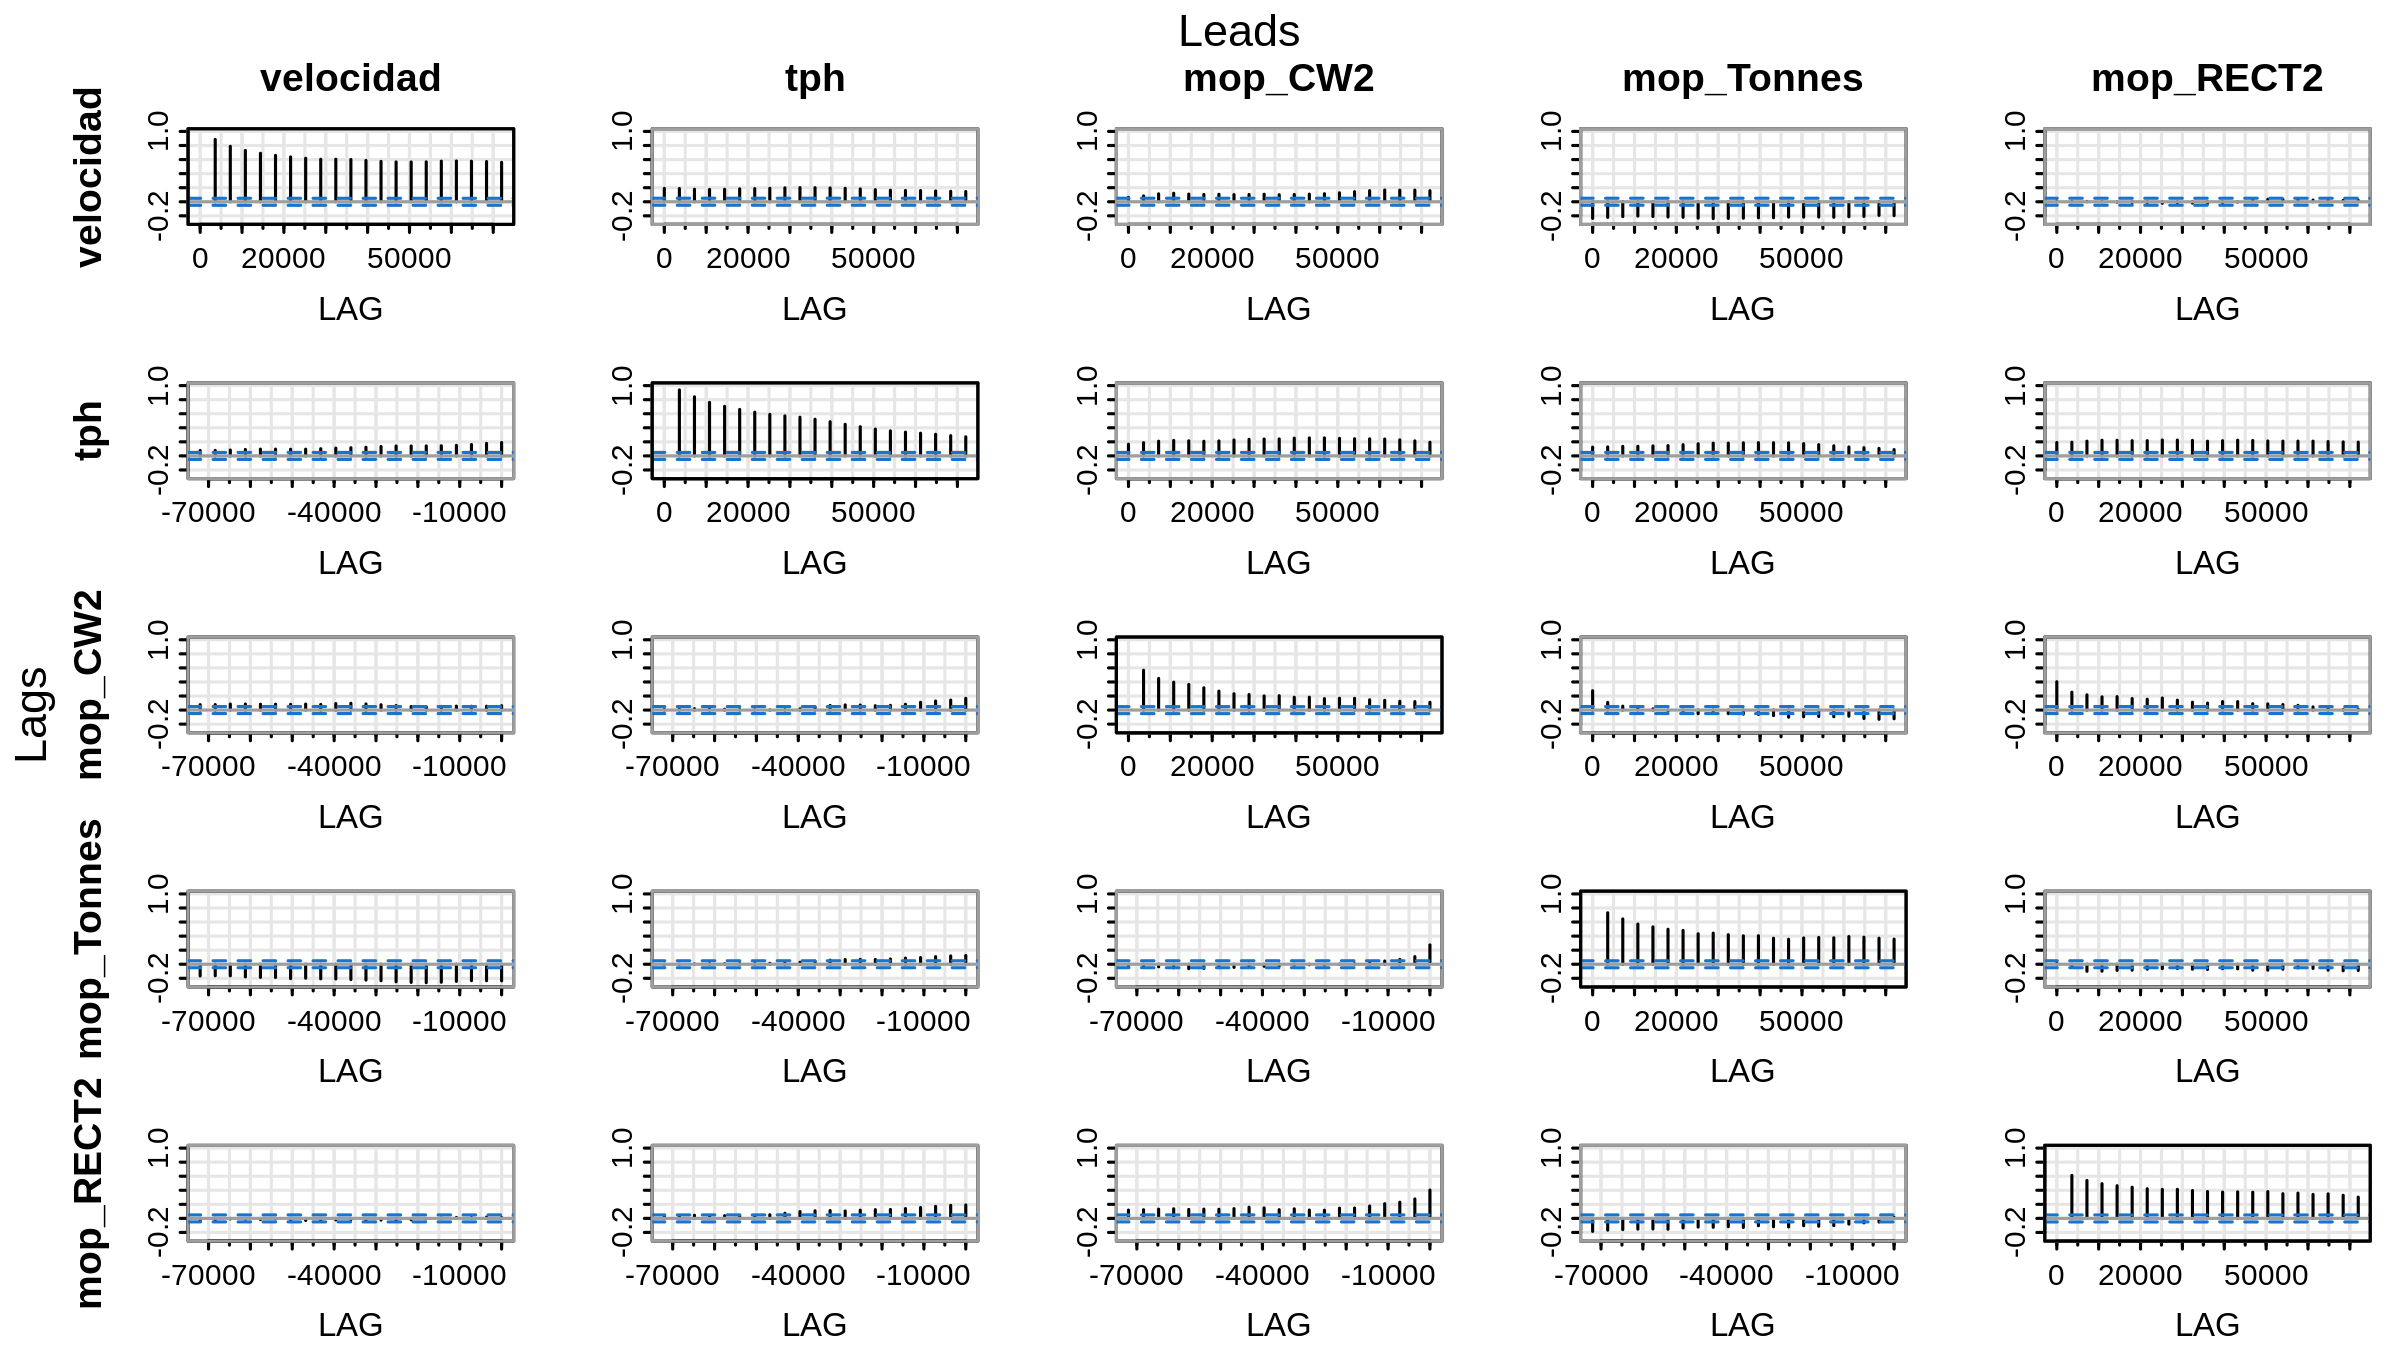

In [ ]:

combined_xts <- merge(velocidad, tph,mineralogia_subset_numeric)
combined_xts <- replace(combined_xts, is.na(combined_xts), 0)

# Use acfm on the combined xts object
library(astsa)
acfm(combined_xts,max.lag = 20)

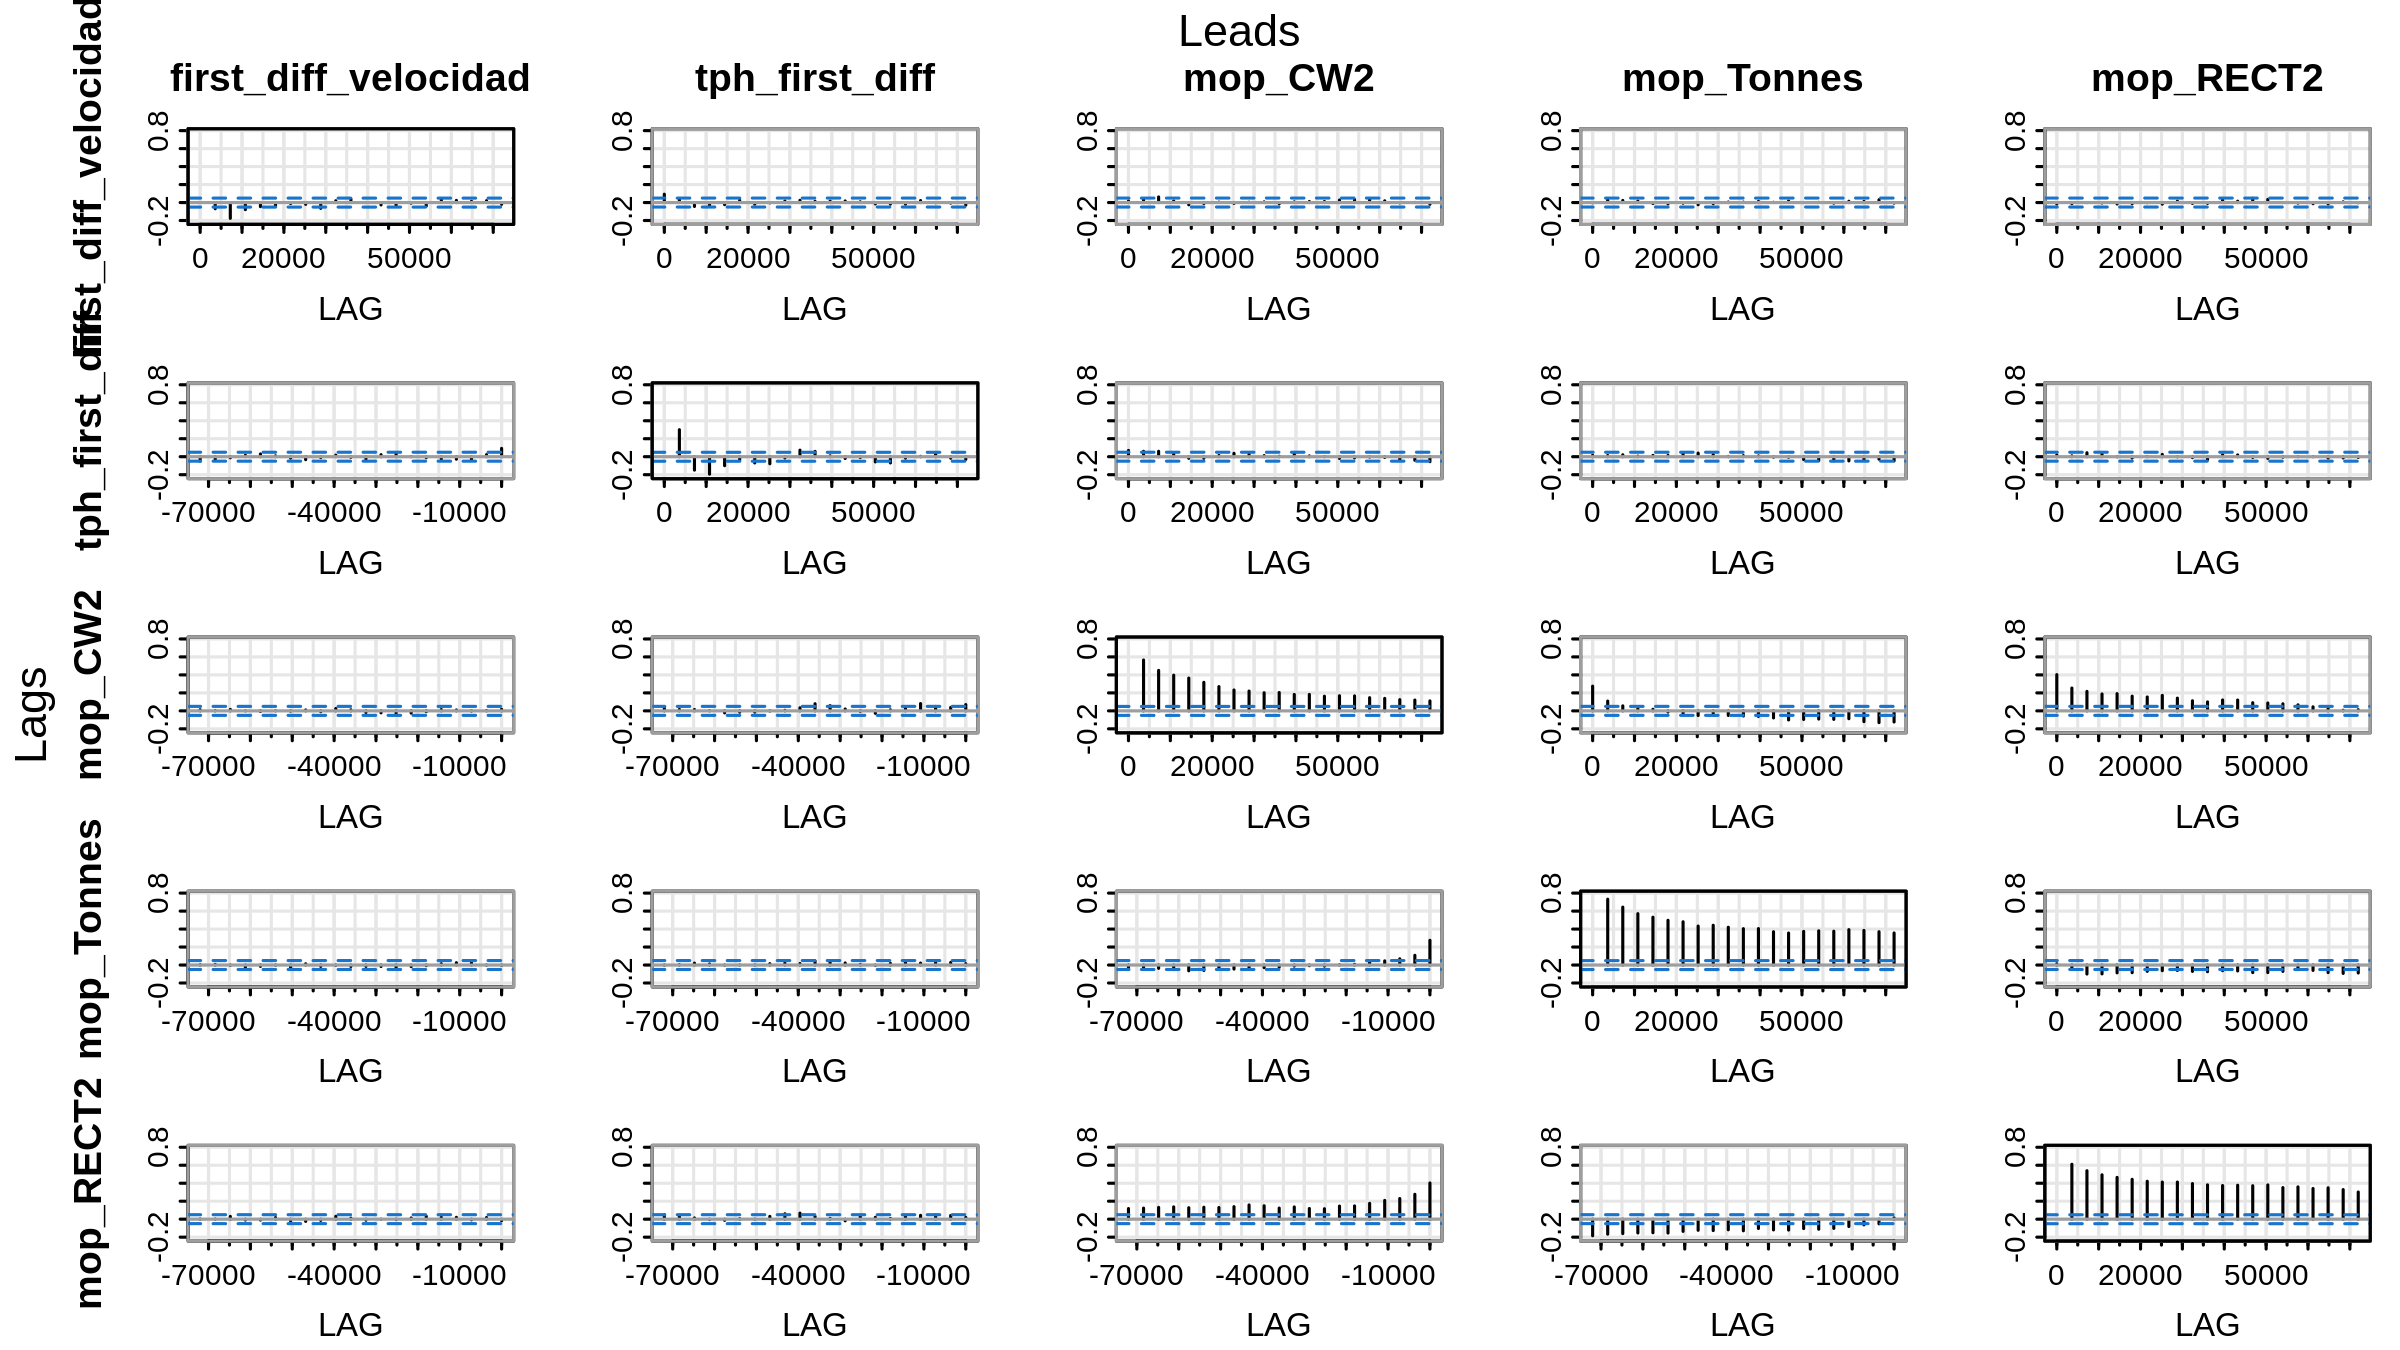

In [ ]:
combined_xts <- merge(first_diff_velocidad, tph_first_diff,mineralogia_subset_numeric)
combined_xts <- replace(combined_xts, is.na(combined_xts), 0)

# Use acfm on the combined xts object
library(astsa)
acfm(combined_xts,max.lag=20)

#### MOP

In [ ]:
# Set the seed for reproducibility
set.seed(123)

# Assuming you have an xts object mineralogia
# Get the column names
col_names <- colnames(mineralogia)

# Select only the column names that start with "mop_"
mop_cols <- grep("^mop_", col_names, value = TRUE)

# Select 10 random "mop_" column names
random_mop_cols <- sample(mop_cols, 3)

# Subset the xts object to get only the random "mop_" columns
mineralogia_subset <- mineralogia[, random_mop_cols]

# Convert each column to numeric
mineralogia_subset_matrix <- apply(mineralogia_subset, 2, as.numeric)

# Convert back to an xts object, using the original index as the order.by parameter
mineralogia_subset_numeric <- as.xts(mineralogia_subset_matrix, order.by = index(mineralogia_subset))


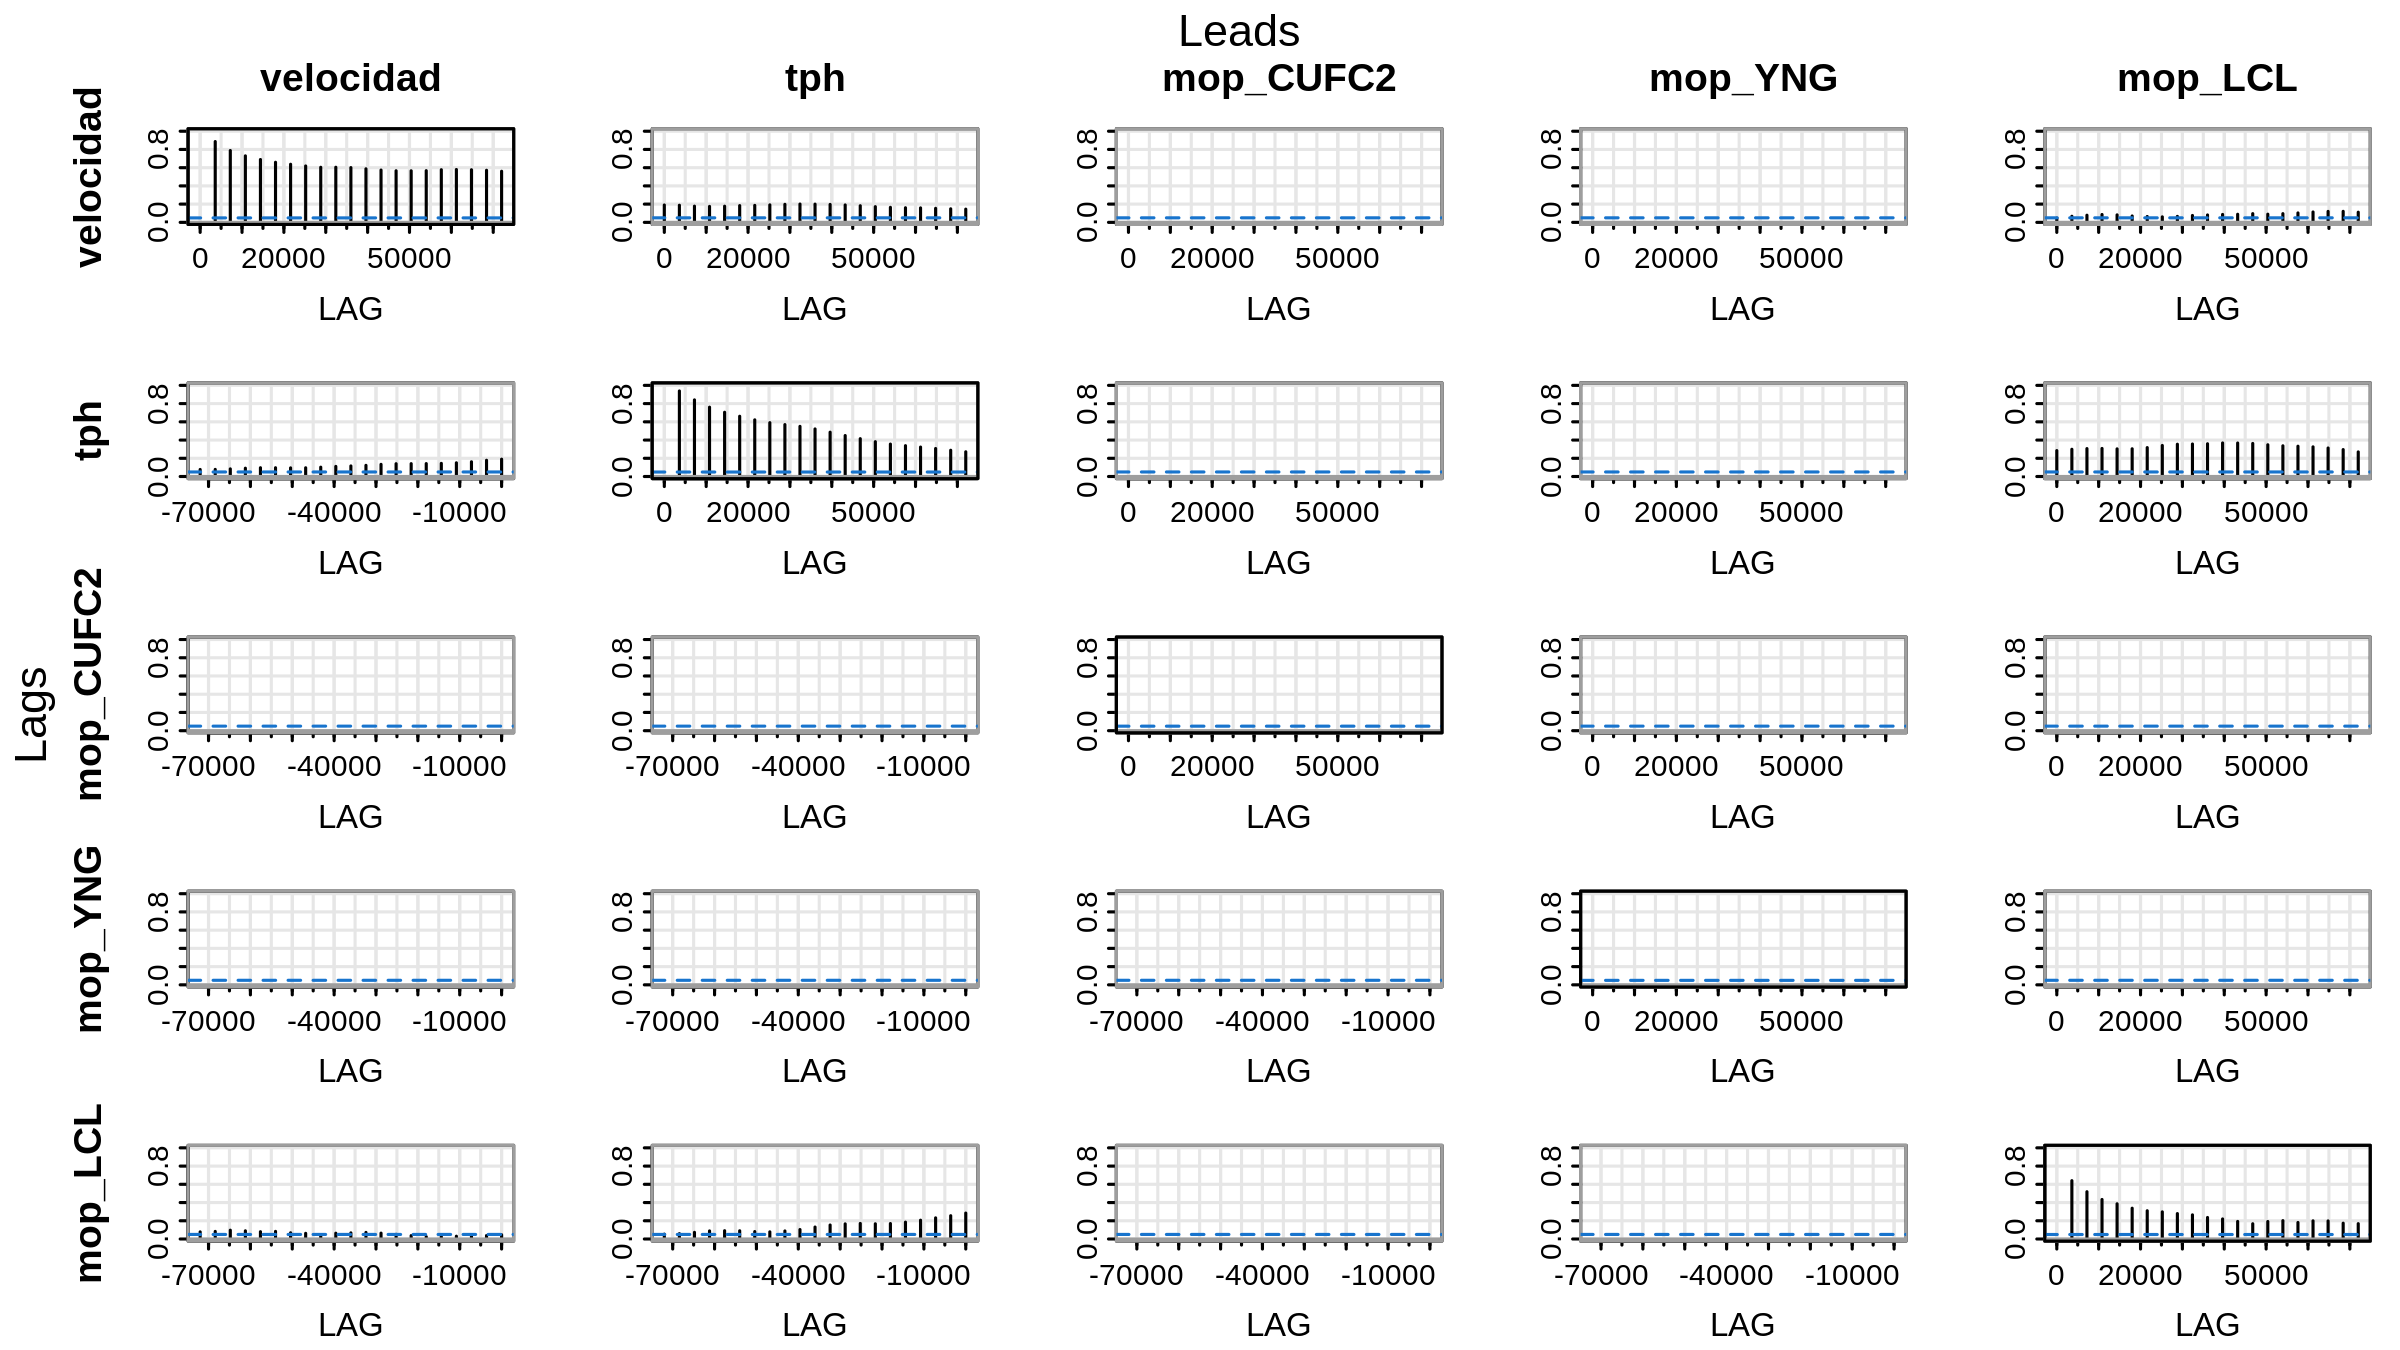

In [ ]:
combined_xts <- merge(velocidad, tph,mineralogia_subset_numeric)
combined_xts <- replace(combined_xts, is.na(combined_xts), 0)

acfm(combined_xts,max.lag=20)

#### Disp

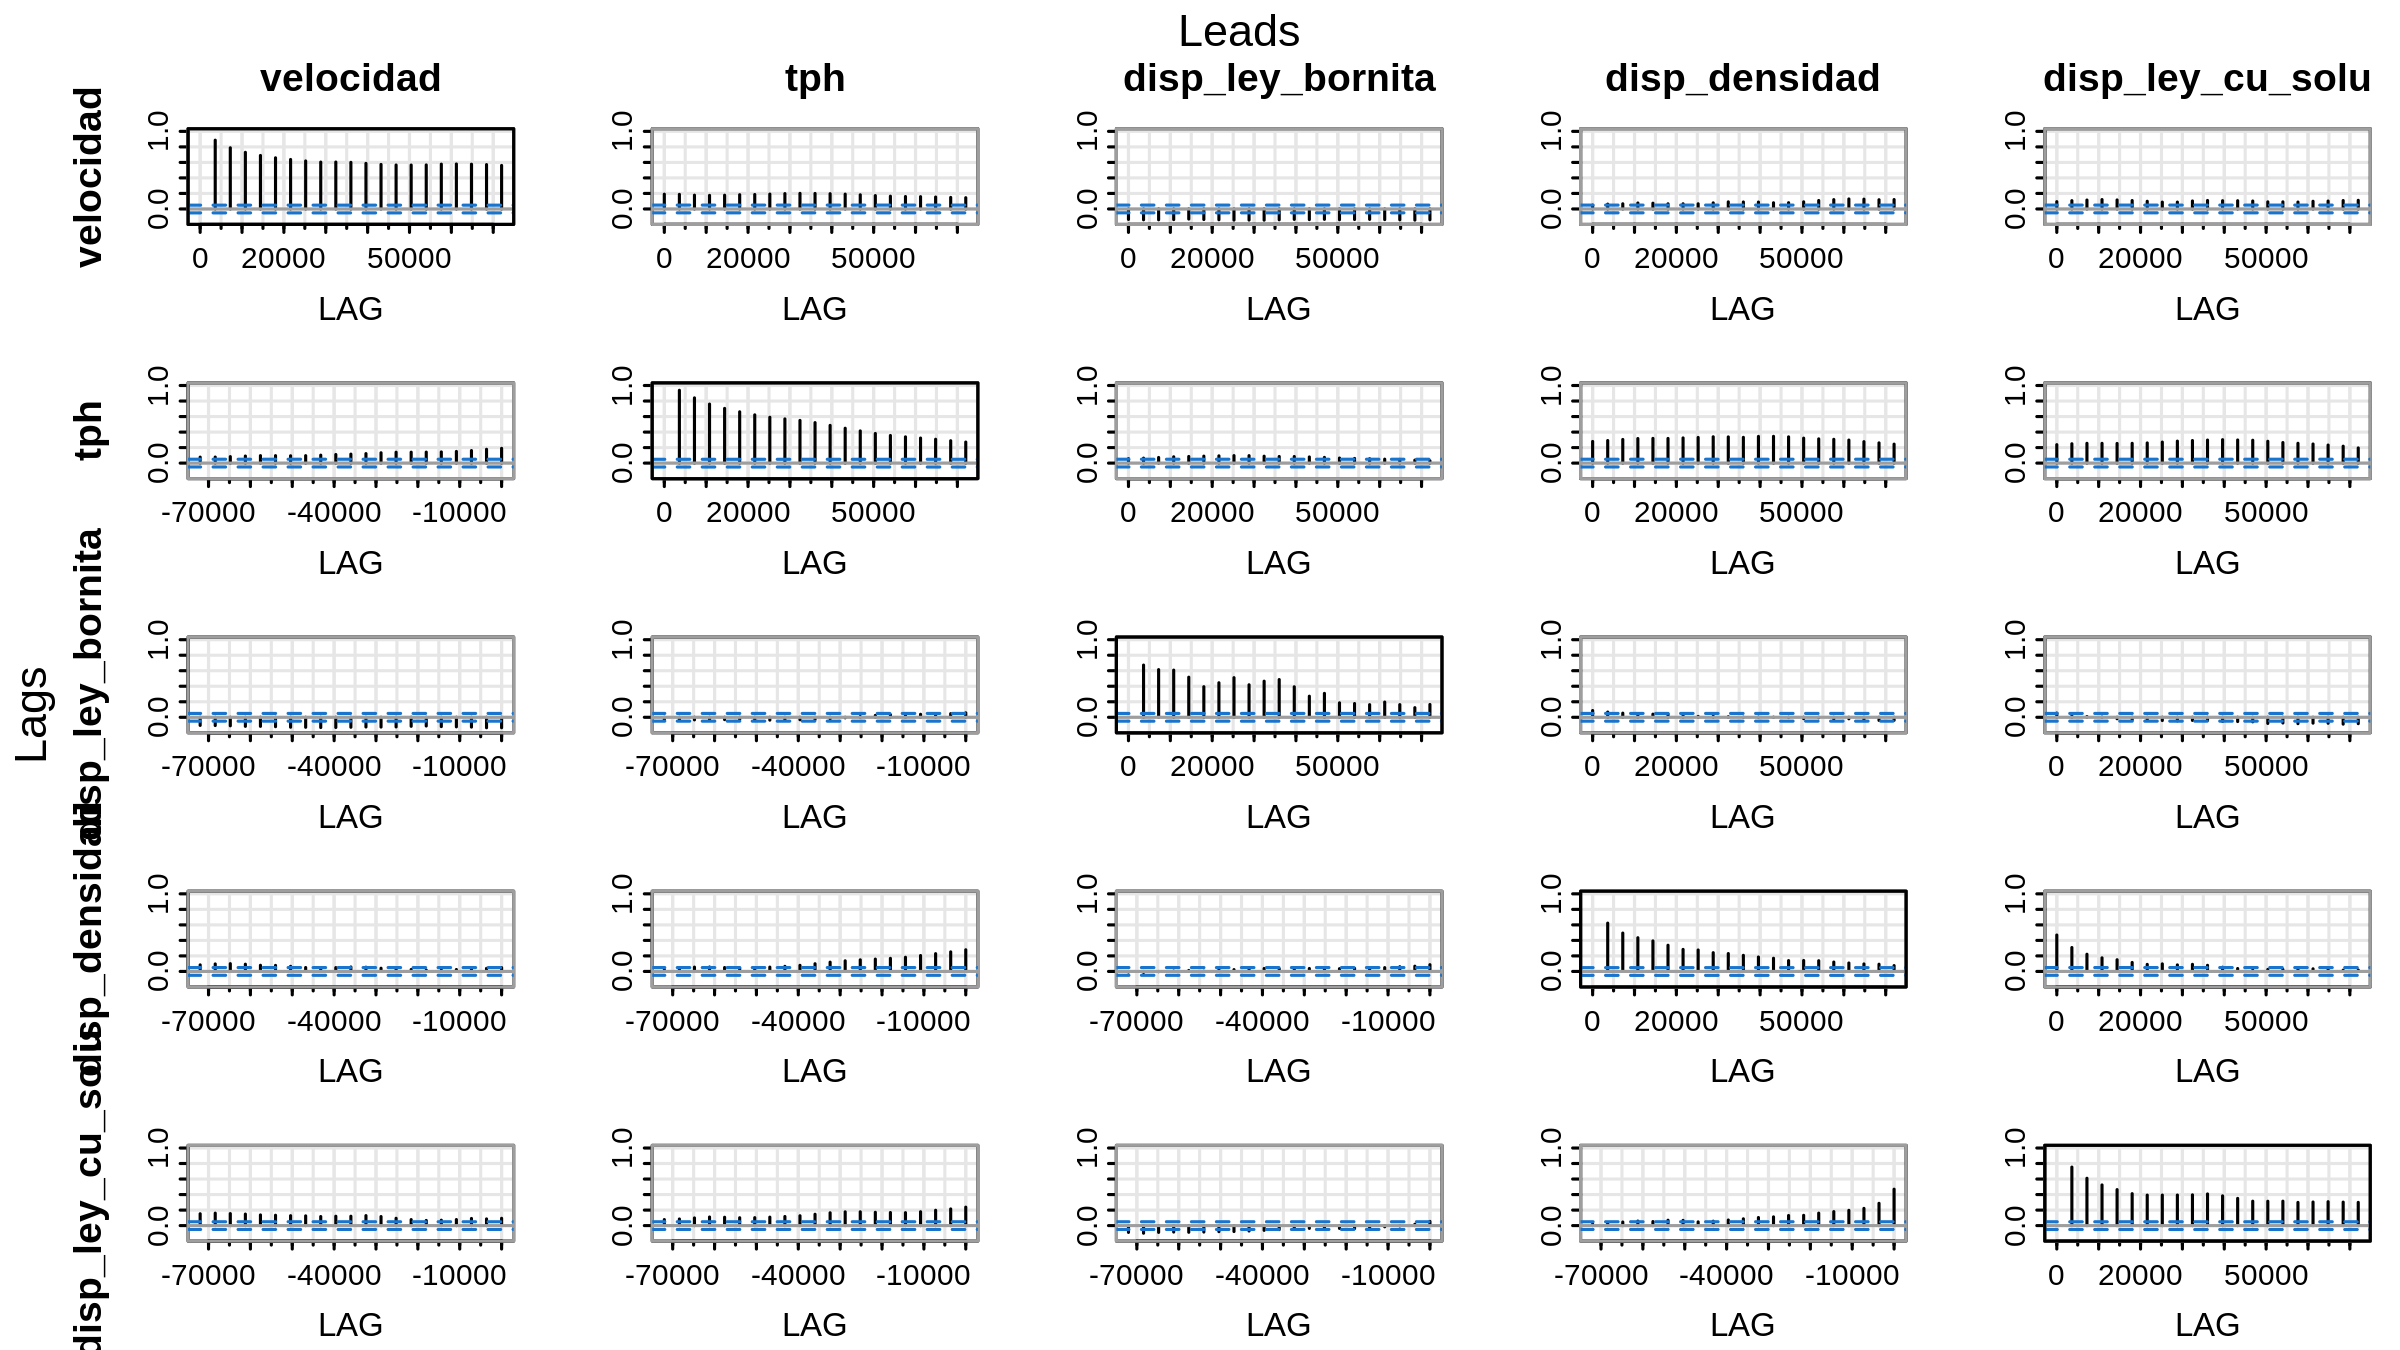

In [ ]:
# Set the seed for reproducibility
set.seed(123)

# Assuming you have an xts object mineralogia
# Get the column names
col_names <- colnames(mineralogia)

# Select only the column names that start with "mop_"
mop_cols <- grep("^disp_", col_names, value = TRUE)

# Select 10 random "mop_" column names
random_mop_cols <- sample(mop_cols, 3)

# Subset the xts object to get only the random "mop_" columns
mineralogia_subset <- mineralogia[, random_mop_cols]

# Convert each column to numeric
mineralogia_subset_matrix <- apply(mineralogia_subset, 2, as.numeric)

# Convert back to an xts object, using the original index as the order.by parameter
mineralogia_subset_numeric <- as.xts(mineralogia_subset_matrix, order.by = index(mineralogia_subset))

combined_xts <- merge(velocidad, tph,mineralogia_subset_numeric)
combined_xts <- replace(combined_xts, is.na(combined_xts), 0)

acfm(combined_xts,max.lag=20)

#### Dump

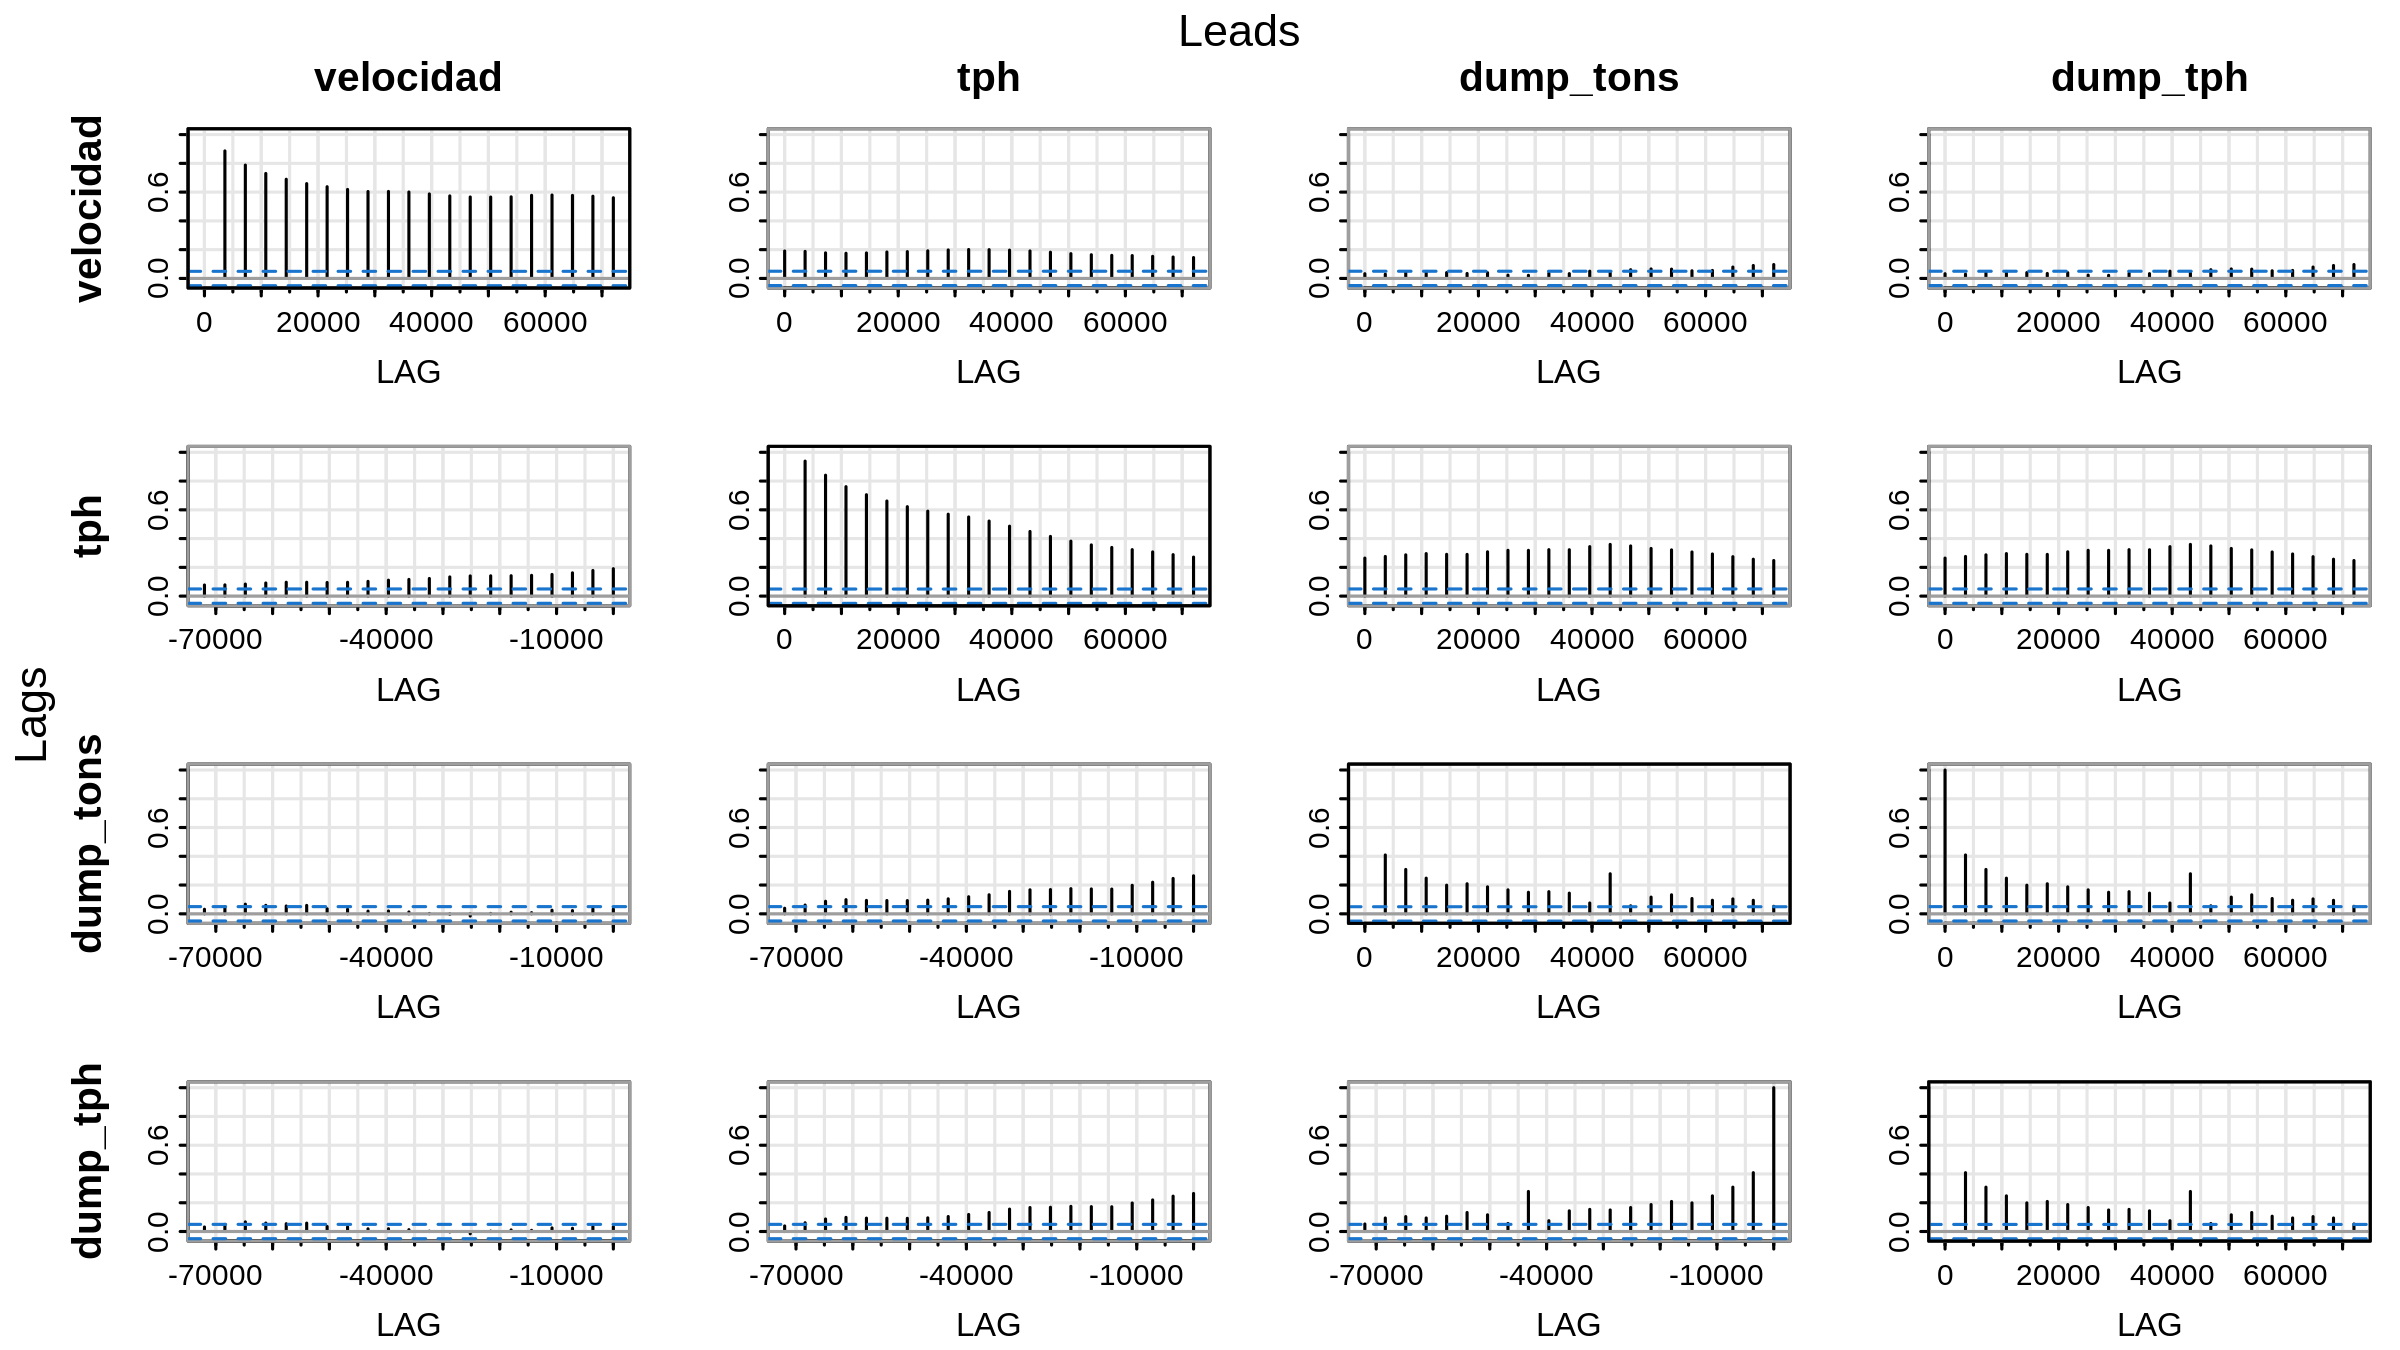

In [ ]:
# Set the seed for reproducibility
set.seed(123)

# Assuming you have an xts object mineralogia
# Get the column names
col_names <- colnames(mineralogia)

# Select only the column names that start with "mop_"
mop_cols <- grep("^dump_", col_names, value = TRUE)

# Select 10 random "mop_" column names
random_mop_cols <- sample(mop_cols, 2)

# Subset the xts object to get only the random "mop_" columns
mineralogia_subset <- mineralogia[, random_mop_cols]

# Convert each column to numeric
mineralogia_subset_matrix <- apply(mineralogia_subset, 2, as.numeric)

# Convert back to an xts object, using the original index as the order.by parameter
mineralogia_subset_numeric <- as.xts(mineralogia_subset_matrix, order.by = index(mineralogia_subset))

combined_xts <- merge(velocidad, tph,mineralogia_subset_numeric)
combined_xts <- replace(combined_xts, is.na(combined_xts), 0)

acfm(combined_xts,max.lag=20)

#### Rock

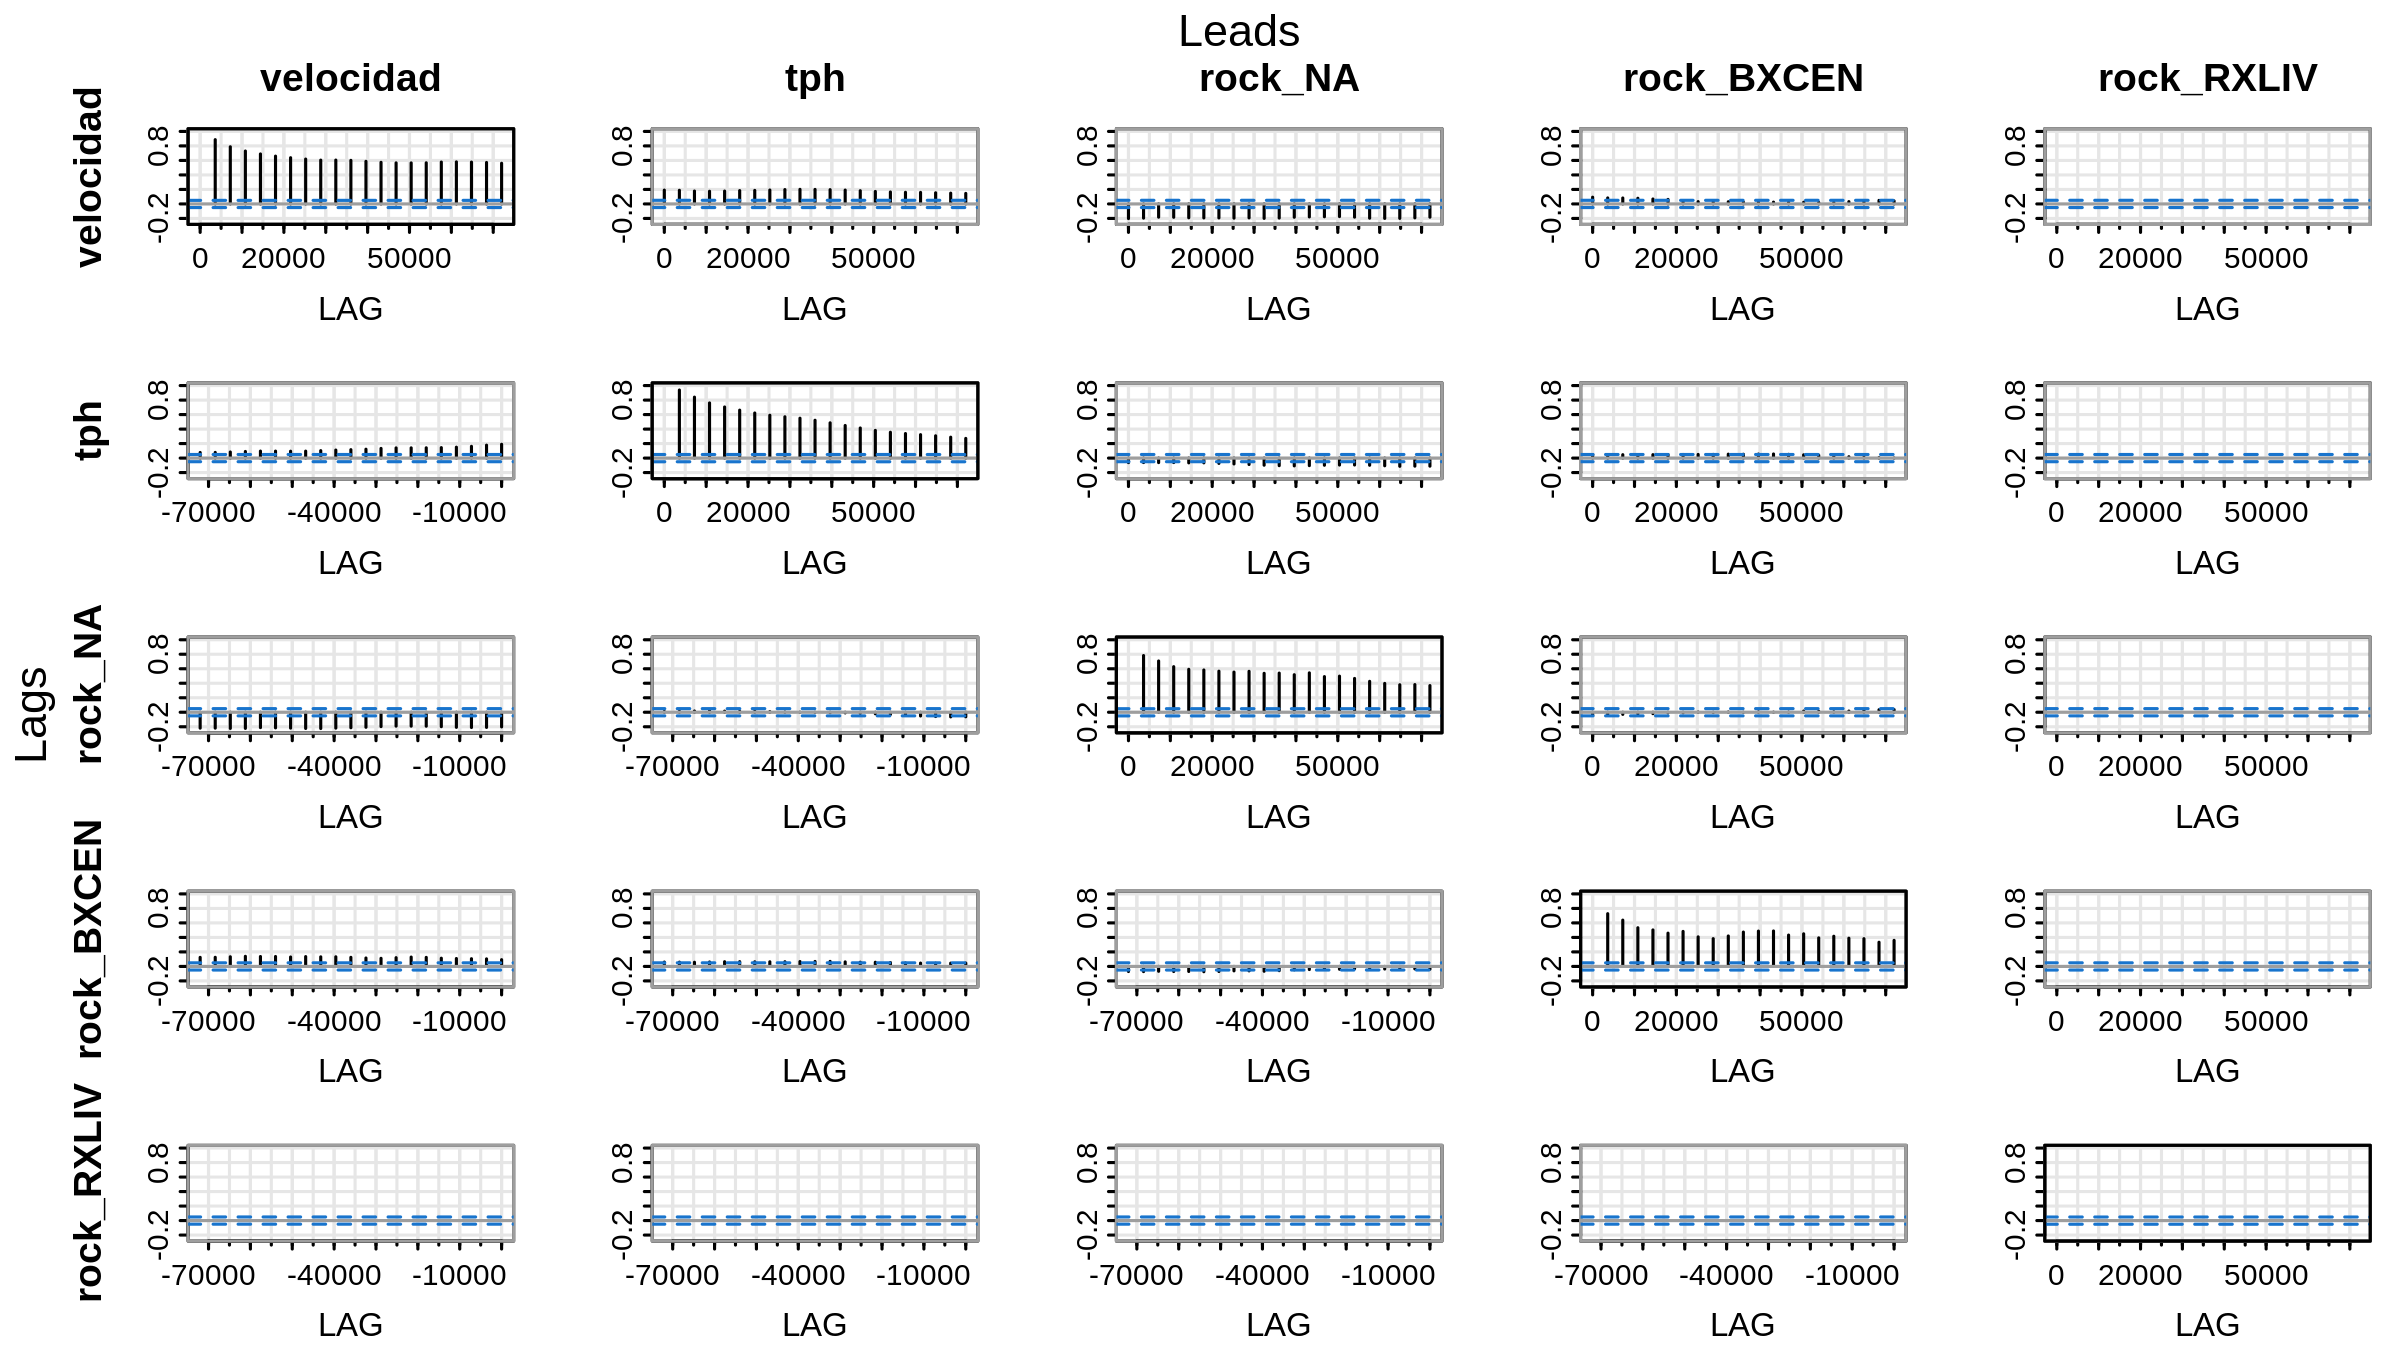

In [ ]:
# Set the seed for reproducibility
set.seed(123)

# Assuming you have an xts object mineralogia
# Get the column names
col_names <- colnames(mineralogia)

# Select only the column names that start with "mop_"
mop_cols <- grep("^rock_", col_names, value = TRUE)

# Select 10 random "mop_" column names
random_mop_cols <- sample(mop_cols, 3)

# Subset the xts object to get only the random "mop_" columns
mineralogia_subset <- mineralogia[, random_mop_cols]

# Convert each column to numeric
mineralogia_subset_matrix <- apply(mineralogia_subset, 2, as.numeric)

# Convert back to an xts object, using the original index as the order.by parameter
mineralogia_subset_numeric <- as.xts(mineralogia_subset_matrix, order.by = index(mineralogia_subset))

combined_xts <- merge(velocidad, tph,mineralogia_subset_numeric)
combined_xts <- replace(combined_xts, is.na(combined_xts), 0)

acfm(combined_xts,max.lag=20)

RVM

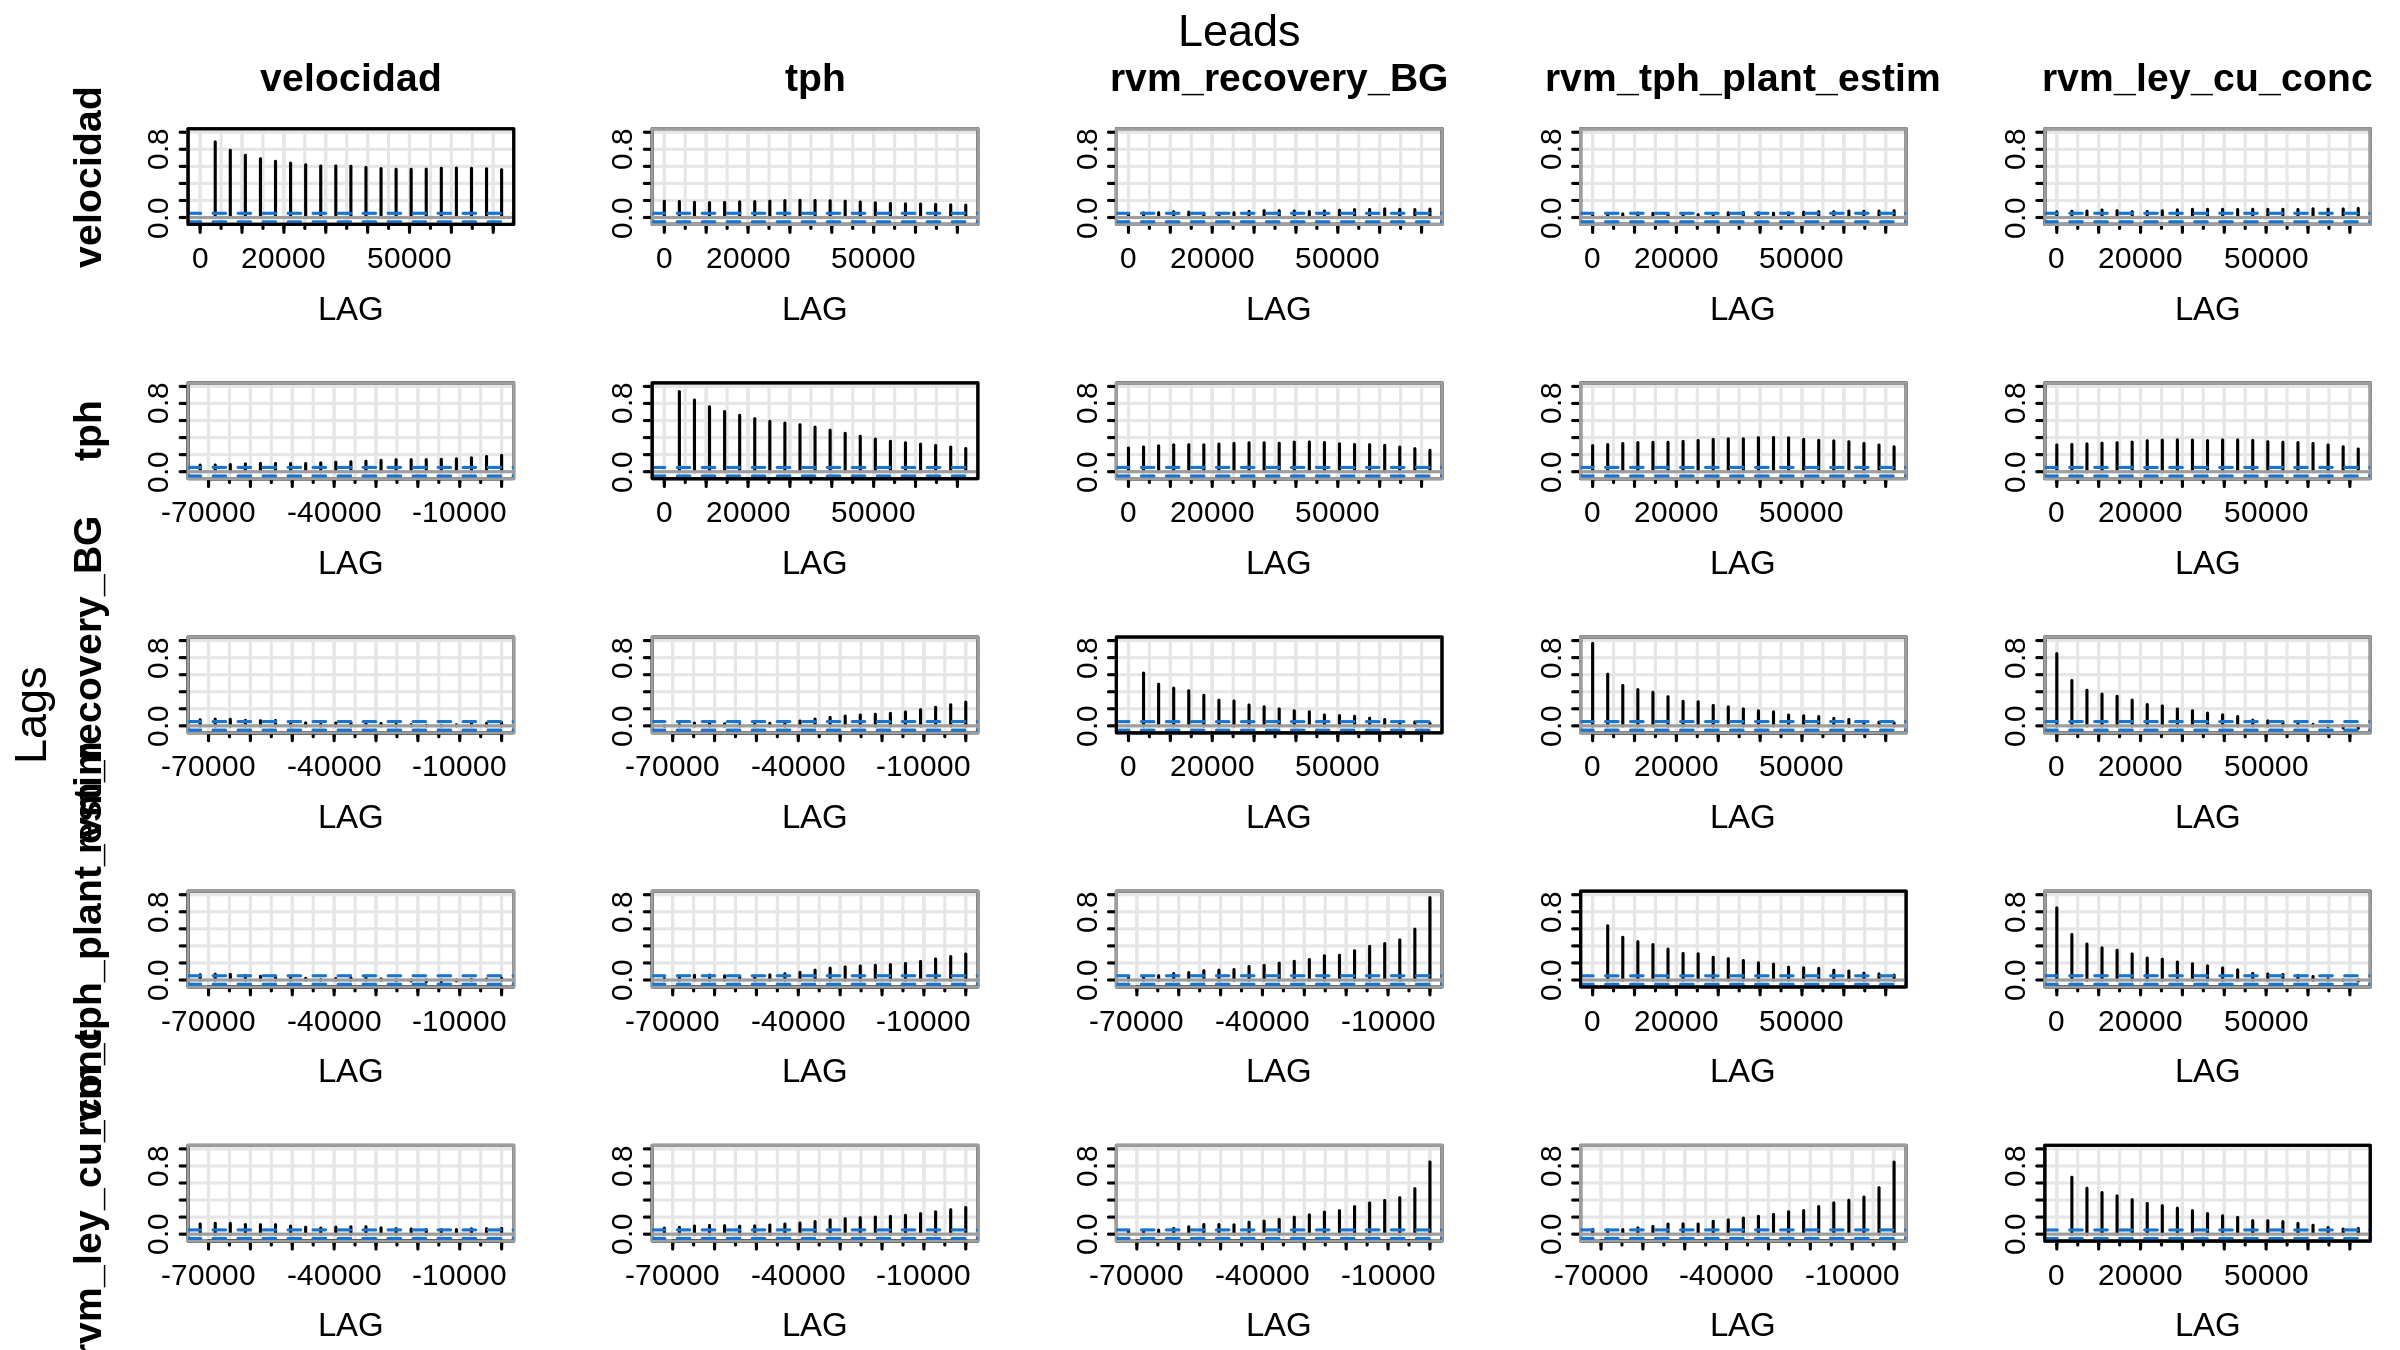

In [ ]:
# Set the seed for reproducibility
set.seed(123)

# Assuming you have an xts object mineralogia
# Get the column names
col_names <- colnames(mineralogia)

# Select only the column names that start with "mop_"
mop_cols <- grep("^rvm_", col_names, value = TRUE)

# Select 10 random "mop_" column names
random_mop_cols <- sample(mop_cols, 3)

# Subset the xts object to get only the random "mop_" columns
mineralogia_subset <- mineralogia[, random_mop_cols]

# Convert each column to numeric
mineralogia_subset_matrix <- apply(mineralogia_subset, 2, as.numeric)

# Convert back to an xts object, using the original index as the order.by parameter
mineralogia_subset_numeric <- as.xts(mineralogia_subset_matrix, order.by = index(mineralogia_subset))

combined_xts <- merge(velocidad, tph,mineralogia_subset_numeric)
combined_xts <- replace(combined_xts, is.na(combined_xts), 0)

acfm(combined_xts,max.lag=20)

# Modelos

In [ ]:
length(velocidad_first_diff_vector)
length(tph_first_diff_vector)

[1] 1610

[1] 1610

## Velocidad + TPH

In [ ]:
model <- lm(velocidad_first_diff_vector ~  velocidad_first_diff_vector + tph_first_diff_vector)
summary(model)

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”



Call:
lm(formula = velocidad_first_diff_vector ~ velocidad_first_diff_vector + 
    tph_first_diff_vector)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9366 -0.4289  0.0060  0.4107  5.1462 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.841e-04  2.416e-02  -0.016 0.987319    
tph_first_diff_vector  3.340e-04  8.985e-05   3.717 0.000208 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9694 on 1608 degrees of freedom
Multiple R-squared:  0.00852,	Adjusted R-squared:  0.007903 
F-statistic: 13.82 on 1 and 1608 DF,  p-value: 0.0002083


In [ ]:
model <- lm(velocidad ~  tph)
summary(model)


Call:
lm(formula = velocidad ~ tph)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3473 -1.8653  0.0403  1.5631  6.2969 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.008e-01  2.413e-01   1.247    0.213    
tph         5.068e-04  6.504e-05   7.792 1.17e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.006 on 1609 degrees of freedom
Multiple R-squared:  0.03637,	Adjusted R-squared:  0.03577 
F-statistic: 60.72 on 1 and 1609 DF,  p-value: 1.17e-14


## Velocidad + TPH + Mineralogia

### Sin Lags

In [ ]:
# Convert the xts object to a data frame

merged_data <- merge.xts(velocidad,tph, mineralogia)

merged_data_imputed <- apply(merged_data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
# Use na.approx() to perform linear interpolation
merged_data_imputed <- na.approx(merged_data_imputed)

# Use na.locf() (Last Observation Carried Forward) to fill NA values with the most recent non-NA prior value
merged_data_imputed <- na.locf(merged_data_imputed)

# merged_data_imputed
sum(is.na(merged_data_imputed))

merged_data_imputed <- merged_data_imputed[, !apply(is.na(merged_data_imputed), 2, all)]

sum(is.na(merged_data_imputed))

# Check which columns have NA values
colSums(is.na(merged_data_imputed))

my_df <- data.frame(merged_data_imputed)

# Perform multiple linear regression using all other columns to predict y
lm_result <- lm(velocidad ~ ., data = my_df)
summary(lm_result)


### 9 Lags

In [ ]:
# Create a lagged version of mineralogia
mineralogia_lagged <- lag(mineralogia, k = 9)

# Merge the original and lagged series
merged_data <- merge(velocidad,tph, mineralogia_lagged)

# Impute missing values and remove columns with all NA values
merged_data_imputed <- apply(merged_data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
merged_data_imputed <- na.approx(merged_data_imputed)
merged_data_imputed <- na.locf(merged_data_imputed)
merged_data_imputed <- merged_data_imputed[, !apply(is.na(merged_data_imputed), 2, all)]

# Perform multiple linear regression using all other columns to predict y
my_df <- data.frame(merged_data_imputed)
lm_result <- lm(velocidad ~ ., data = my_df)

# Print summary of the linear model
summary(lm_result)



Call:
lm(formula = velocidad ~ ., data = my_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4698 -0.9225 -0.0252  0.8982  5.7441 

Coefficients: (12 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.252e+01  2.151e+01  -0.582 0.560555    
tph                    3.080e-04  5.297e-05   5.815 7.38e-09 ***
dump_tons             -4.835e-05  9.304e-05  -0.520 0.603322    
dump_tph                      NA         NA      NA       NA    
disp_tph_plant_estim  -5.530e-04  5.543e-04  -0.998 0.318548    
disp_ley_cu_tot        2.082e+02  2.529e+02   0.823 0.410529    
disp_ley_cu_solu      -1.619e+03  1.756e+03  -0.922 0.356595    
disp_ley_cu_conc      -1.163e+01  8.606e+00  -1.352 0.176686    
disp_ley_moly          5.581e+02  1.524e+03   0.366 0.714185    
disp_ley_arsenico_ppm  7.123e-05  1.339e-04   0.532 0.594774    
disp_ley_pirita       -1.352e+01  1.629e+01  -0.830 0.406688    
disp_ley_calcopirita

In [ ]:
# Get the summary object
summary_obj <- summary(lm_result)

# Get the table of coefficients
coefficients_table <- summary_obj$coefficients

# Subset the table to only include rows where the Pr(>|t|) value is less than 0.05
# This corresponds to the significant variables
significant_variables <- coefficients_table[coefficients_table[, "Pr(>|t|)"] < 0.05, ]

print("with 9 Lags")
# Print the significant variables
print(significant_variables)

[1] "with 9 Lags"
                      Estimate   Std. Error   t value     Pr(>|t|)
tph               3.080200e-04 5.296782e-05  5.815228 7.375334e-09
disp_ley_bornita -3.056877e+02 1.084542e+02 -2.818589 4.886360e-03
rock_BXCEN       -4.605948e-04 1.370074e-04 -3.361823 7.936151e-04
rvm_recovery_OMS -6.478540e+01 9.230390e+00 -7.018707 3.369628e-12
rvm_recovery_BG   6.627930e+01 1.556627e+01  4.257878 2.190852e-05
mop_AL            3.585561e-02 1.575432e-02  2.275922 2.299003e-02
mop_ASCON        -1.075565e-03 4.908557e-04 -2.191204 2.858919e-02
mop_AST           3.562264e-02 1.323602e-02  2.691340 7.195012e-03
mop_AU           -2.810065e+00 7.760287e-01 -3.621084 3.030566e-04
mop_CCG1         -3.388507e+00 1.428269e+00 -2.372457 1.779476e-02
mop_CCG2          8.429081e+00 2.956542e+00  2.850993 4.417464e-03
mop_CCG3         -8.888036e+00 3.347767e+00 -2.654915 8.016114e-03
mop_CCG4          7.063288e+00 2.741164e+00  2.576748 1.006756e-02
mop_CCG5         -4.873187e+00 1.790037e+00 

### 8 Lags

In [ ]:
# Create a lagged version of mineralogia
mineralogia_lagged <- lag(mineralogia, k = 8)

# Merge the original and lagged series
merged_data <- merge(velocidad,tph, mineralogia_lagged)

# Impute missing values and remove columns with all NA values
merged_data_imputed <- apply(merged_data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
merged_data_imputed <- na.approx(merged_data_imputed)
merged_data_imputed <- na.locf(merged_data_imputed)
merged_data_imputed <- merged_data_imputed[, !apply(is.na(merged_data_imputed), 2, all)]

# Perform multiple linear regression using all other columns to predict y
my_df <- data.frame(merged_data_imputed)
lm_result <- lm(velocidad ~ ., data = my_df)

# Print summary of the linear model
summary(lm_result)


Call:
lm(formula = velocidad ~ ., data = my_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0889 -0.8618 -0.0098  0.8834  5.7524 

Coefficients: (12 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.976e+01  2.156e+01  -0.916 0.359565    
tph                    3.274e-04  5.285e-05   6.195 7.48e-10 ***
dump_tons              4.258e-05  9.332e-05   0.456 0.648264    
dump_tph                      NA         NA      NA       NA    
disp_tph_plant_estim  -2.432e-04  5.548e-04  -0.438 0.661146    
disp_ley_cu_tot        1.531e+02  2.535e+02   0.604 0.546061    
disp_ley_cu_solu      -1.659e+03  1.761e+03  -0.942 0.346398    
disp_ley_cu_conc      -1.070e+01  8.626e+00  -1.241 0.214960    
disp_ley_moly         -1.025e+03  1.527e+03  -0.671 0.502285    
disp_ley_arsenico_ppm  1.511e-04  1.343e-04   1.125 0.260719    
disp_ley_pirita       -2.184e+00  1.634e+01  -0.134 0.893703    
disp_ley_calcopirita

In [ ]:
# Get the summary object
summary_obj <- summary(lm_result)

# Get the table of coefficients
coefficients_table <- summary_obj$coefficients

# Subset the table to only include rows where the Pr(>|t|) value is less than 0.05
# This corresponds to the significant variables
significant_variables <- coefficients_table[coefficients_table[, "Pr(>|t|)"] < 0.05, ]

print("with 8 Lags")
# Print the significant variables
print(significant_variables)

[1] "with 8 Lags"
                      Estimate   Std. Error   t value     Pr(>|t|)
tph               3.080200e-04 5.296782e-05  5.815228 7.375334e-09
disp_ley_bornita -3.056877e+02 1.084542e+02 -2.818589 4.886360e-03
rock_BXCEN       -4.605948e-04 1.370074e-04 -3.361823 7.936151e-04
rvm_recovery_OMS -6.478540e+01 9.230390e+00 -7.018707 3.369628e-12
rvm_recovery_BG   6.627930e+01 1.556627e+01  4.257878 2.190852e-05
mop_AL            3.585561e-02 1.575432e-02  2.275922 2.299003e-02
mop_ASCON        -1.075565e-03 4.908557e-04 -2.191204 2.858919e-02
mop_AST           3.562264e-02 1.323602e-02  2.691340 7.195012e-03
mop_AU           -2.810065e+00 7.760287e-01 -3.621084 3.030566e-04
mop_CCG1         -3.388507e+00 1.428269e+00 -2.372457 1.779476e-02
mop_CCG2          8.429081e+00 2.956542e+00  2.850993 4.417464e-03
mop_CCG3         -8.888036e+00 3.347767e+00 -2.654915 8.016114e-03
mop_CCG4          7.063288e+00 2.741164e+00  2.576748 1.006756e-02
mop_CCG5         -4.873187e+00 1.790037e+00 

### 10 Lags

In [ ]:
# Create a lagged version of mineralogia
mineralogia_lagged <- lag(mineralogia, k = 10)

# Merge the original and lagged series
merged_data <- merge(velocidad,tph, mineralogia_lagged)

# Impute missing values and remove columns with all NA values
merged_data_imputed <- apply(merged_data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
merged_data_imputed <- na.approx(merged_data_imputed)
merged_data_imputed <- na.locf(merged_data_imputed)
merged_data_imputed <- merged_data_imputed[, !apply(is.na(merged_data_imputed), 2, all)]

# Perform multiple linear regression using all other columns to predict y
my_df <- data.frame(merged_data_imputed)
lm_result <- lm(velocidad ~ ., data = my_df)

# Print summary of the linear model
summary(lm_result)



Call:
lm(formula = velocidad ~ ., data = my_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1335 -0.8815 -0.0374  0.9090  5.7400 

Coefficients: (12 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.089e+01  2.163e+01  -0.966 0.334438    
tph                    2.984e-04  5.362e-05   5.565 3.10e-08 ***
dump_tons              3.919e-05  9.351e-05   0.419 0.675224    
dump_tph                      NA         NA      NA       NA    
disp_tph_plant_estim  -7.212e-04  5.581e-04  -1.292 0.196503    
disp_ley_cu_tot        9.115e+01  2.541e+02   0.359 0.719838    
disp_ley_cu_solu      -1.730e+03  1.765e+03  -0.980 0.327068    
disp_ley_cu_conc      -6.010e+00  8.659e+00  -0.694 0.487751    
disp_ley_moly          1.564e+03  1.531e+03   1.021 0.307356    
disp_ley_arsenico_ppm  3.653e-05  1.347e-04   0.271 0.786201    
disp_ley_pirita       -1.015e+00  1.638e+01  -0.062 0.950623    
disp_ley_calcopirita

In [ ]:
# Get the summary object
summary_obj <- summary(lm_result)

# Get the table of coefficients
coefficients_table <- summary_obj$coefficients

# Subset the table to only include rows where the Pr(>|t|) value is less than 0.05
# This corresponds to the significant variables
significant_variables <- coefficients_table[coefficients_table[, "Pr(>|t|)"] < 0.05, ]

print("with 10 Lags")
# Print the significant variables
print(significant_variables)

### 7 Lags

In [ ]:
# Create a lagged version of mineralogia
mineralogia_lagged <- lag(mineralogia, k = 7)

# Merge the original and lagged series
merged_data <- merge(velocidad,tph, mineralogia_lagged)

# Impute missing values and remove columns with all NA values
merged_data_imputed <- apply(merged_data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
merged_data_imputed <- na.approx(merged_data_imputed)
merged_data_imputed <- na.locf(merged_data_imputed)
merged_data_imputed <- merged_data_imputed[, !apply(is.na(merged_data_imputed), 2, all)]

# Perform multiple linear regression using all other columns to predict y
my_df <- data.frame(merged_data_imputed)
lm_result <- lm(velocidad ~ ., data = my_df)

# Print summary of the linear model
summary(lm_result)



Call:
lm(formula = velocidad ~ ., data = my_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9469 -0.8888  0.0332  0.8714  5.7473 

Coefficients: (12 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.753e+01  2.135e+01  -1.289 0.197577    
tph                    3.156e-04  5.205e-05   6.064 1.68e-09 ***
dump_tons              1.375e-05  9.254e-05   0.149 0.881880    
dump_tph                      NA         NA      NA       NA    
disp_tph_plant_estim  -4.327e-04  5.497e-04  -0.787 0.431263    
disp_ley_cu_tot        9.380e+01  2.513e+02   0.373 0.709065    
disp_ley_cu_solu      -2.568e+03  1.745e+03  -1.472 0.141305    
disp_ley_cu_conc      -4.468e+00  8.550e+00  -0.523 0.601342    
disp_ley_moly         -1.000e+03  1.513e+03  -0.661 0.508640    
disp_ley_arsenico_ppm  1.341e-04  1.330e-04   1.008 0.313644    
disp_ley_pirita        9.204e+00  1.620e+01   0.568 0.569915    
disp_ley_calcopirita

In [ ]:
# Get the summary object
summary_obj <- summary(lm_result)

# Get the table of coefficients
coefficients_table <- summary_obj$coefficients

# Subset the table to only include rows where the Pr(>|t|) value is less than 0.05
# This corresponds to the significant variables
significant_variables <- coefficients_table[coefficients_table[, "Pr(>|t|)"] < 0.05, ]

print("with 7 Lags")
# Print the significant variables
print(significant_variables)

[1] "with 7 Lags"
                      Estimate   Std. Error   t value     Pr(>|t|)
tph               3.155760e-04 5.204489e-05  6.063534 1.679045e-09
rock_BXCEN       -4.615839e-04 1.361992e-04 -3.389036 7.194239e-04
rvm_recovery_OMS -7.128647e+01 9.173965e+00 -7.770519 1.433795e-14
rvm_recovery_BG   6.849463e+01 1.547348e+01  4.426581 1.026046e-05
mop_AL            3.518820e-02 1.565776e-02  2.247333 2.476247e-02
mop_AU           -2.853285e+00 7.711197e-01 -3.700184 2.231647e-04
mop_CCG1         -4.718693e+00 1.420331e+00 -3.322249 9.142626e-04
mop_CCG2          1.002272e+01 2.939144e+00  3.410082 6.665260e-04
mop_CCG3         -8.273153e+00 3.327640e+00 -2.486192 1.301910e-02
mop_CCG4          5.989637e+00 2.723346e+00  2.199367 2.800274e-02
mop_CCG5         -4.550317e+00 1.777980e+00 -2.559262 1.058604e-02
mop_CCG7          1.606674e+01 4.097653e+00  3.920962 9.214197e-05
mop_CCG8         -2.115437e+01 5.231053e+00 -4.043998 5.519589e-05
mop_CR1          -4.093321e+00 1.187814e+00 

### Multiples Lags (8,9,10)
Vamos a probar con varias versiones de lags juntas para ver si dan una mejor estimación.



In [ ]:
# Define the list of lags
lags <- c(8,9,10)

# Get column names
column_names <- colnames(mineralogia)

# Create an empty xts object to store the lagged series
mineralogia_lagged <- xts()

# Loop over all lags
for (num_lags in lags) {
  # Loop over all columns
  for (column_name in column_names) {
    # Create a lagged version of the column
    column_lagged <- lag(mineralogia[, column_name], k = num_lags)

    # Create a new column name
    new_column_name <- paste0(column_name, "_lag", num_lags)

    # Add the lagged column to the xts object
    mineralogia_lagged <- merge(mineralogia_lagged, setNames(column_lagged, new_column_name))
  }
}


In [ ]:
head(mineralogia_lagged,11)


                    dump_tons_lag8 dump_tph_lag8 disp_tph_plant_estim_lag8
2023-02-12 00:00:00             NA            NA                        NA
2023-02-12 01:00:00             NA            NA                        NA
2023-02-12 02:00:00             NA            NA                        NA
2023-02-12 03:00:00             NA            NA                        NA
2023-02-12 04:00:00             NA            NA                        NA
2023-02-12 05:00:00             NA            NA                        NA
2023-02-12 06:00:00             NA            NA                        NA
2023-02-12 07:00:00             NA            NA                        NA
2023-02-12 10:00:00       6348.202      6348.202                  4013.742
2023-02-12 11:00:00       4745.829      4745.829                  4005.285
2023-02-12 12:00:00       3555.348      3555.348                  4005.908
                    disp_ley_cu_tot_lag8 disp_ley_cu_solu_lag8
2023-02-12 00:00:00                  

In [ ]:
colnames(mineralogia)

[1] "dump_tons"             "dump_tph"              "disp_tph_plant_estim" 
  [4] "disp_ley_cu_tot"       "disp_ley_cu_solu"      "disp_ley_cu_conc"     
  [7] "disp_ley_moly"         "disp_ley_arsenico_ppm" "disp_ley_pirita"      
 [10] "disp_ley_calcopirita"  "disp_ley_calcosina"    "disp_ley_covelina"    
 [13] "disp_crusher_index"    "disp_sag_power_index"  "disp_ball_work_index" 
 [16] "disp_recovery"         "disp_ley_bornita"      "disp_densidad"        
 [19] "rock_AND"              "rock_BXANH"            "rock_BXCEN"           
 [22] "rock_BXDON"            "rock_BXFAN"            "rock_BXINF"           
 [25] "rock_BXLBS"            "rock_BXOCC"            "rock_NN"              
 [28] "rock_PDL"              "rock_QM"               "rock_RELL"            
 [31] "rock_RIO"              "rock_RXLIV"            "rock_NA"              
 [34] "rvm_ley_cu_conc"       "rvm_recovery_OMS"      "rvm_recovery_BG"      
 [37] "rvm_tph_plant_estim"   "mop_AG"                "mop_AL"               
 [40] "mop_ALT"               "mop_ASCON"             "mop_AST"              
 [43] "mop_AU"                "mop_BN2"               "mop_CATST"            
 [46] "mop_CC2"               "mop_CCG1"              "mop_CCG2"             
 [49] "mop_CCG3"              "mop_CCG4"              "mop_CCG5"             
 [52] "mop_CCG6"              "mop_CCG7"              "mop_CCG8"             
 [55] "mop_CI"                "mop_CLA20"             "mop_CPY2"             
 [58] "mop_CR1"               "mop_CR2"               "mop_CR3"              
 [61] "mop_CR4"               "mop_CR5"               "mop_CR6"              
 [64] "mop_CR7"               "mop_CR8"               "mop_CUFB1"            
 [67] "mop_CUFC1"             "mop_CUFC2"             "mop_CUIST"            
 [70] "mop_CUSST"             "mop_CUTST"             "mop_CV2"              
 [73] "mop_CW1"               "mop_CW2"               "mop_CW3"              
 [76] "mop_CW4"               "mop_CW5"               "mop_CW6"              
 [79] "mop_CW7"               "mop_CW8"               "mop_Cutoff"           
 [82] "mop_DENST"             "mop_FF"                "mop_GMEC"             
 [85] "mop_HG"                "mop_IBS"               "mop_KKL"              
 [88] "mop_LCL"               "mop_MINZ"              "mop_MLIX"             
 [91] "mop_MOT"               "mop_P80B"              "mop_P80C"             
 [94] "mop_P80RM"             "mop_PCHB"              "mop_PCHC"             
 [97] "mop_PRIMA"             "mop_PY2"               "mop_RANK"             
[100] "mop_RECT"              "mop_RECT1"             "mop_RECT2"            
[103] "mop_REDOX"             "mop_RLIX"              "mop_RMAXK"            
[106] "mop_RQD"               "mop_RX"                "mop_RX1"              
[109] "mop_SI"                "mop_Strippingratio"    "mop_THB"              
[112] "mop_THC"               "mop_UCS"               "mop_VP"               
[115] "mop_Volume"            "mop_YNG"               "mop_ZN"               
[118] "mop_Cut"               "mop_Tonnes"            "mop_BN"               
[121] "mop_CC"                "mop_CPY"               "mop_CV"               
[124] "mop_PY"                "mop_BWI"               "mop_SPI"              
[127] "From_CH1"              "From_CH2"

In [ ]:
colnames(mineralogia_lagged)

[1] "dump_tons_lag8"              "dump_tph_lag8"              
  [3] "disp_tph_plant_estim_lag8"   "disp_ley_cu_tot_lag8"       
  [5] "disp_ley_cu_solu_lag8"       "disp_ley_cu_conc_lag8"      
  [7] "disp_ley_moly_lag8"          "disp_ley_arsenico_ppm_lag8" 
  [9] "disp_ley_pirita_lag8"        "disp_ley_calcopirita_lag8"  
 [11] "disp_ley_calcosina_lag8"     "disp_ley_covelina_lag8"     
 [13] "disp_crusher_index_lag8"     "disp_sag_power_index_lag8"  
 [15] "disp_ball_work_index_lag8"   "disp_recovery_lag8"         
 [17] "disp_ley_bornita_lag8"       "disp_densidad_lag8"         
 [19] "rock_AND_lag8"               "rock_BXANH_lag8"            
 [21] "rock_BXCEN_lag8"             "rock_BXDON_lag8"            
 [23] "rock_BXFAN_lag8"             "rock_BXINF_lag8"            
 [25] "rock_BXLBS_lag8"             "rock_BXOCC_lag8"            
 [27] "rock_NN_lag8"                "rock_PDL_lag8"              
 [29] "rock_QM_lag8"                "rock_RELL_lag8"             
 [31] "rock_RIO_lag8"               "rock_RXLIV_lag8"            
 [33] "rock_NA_lag8"                "rvm_ley_cu_conc_lag8"       
 [35] "rvm_recovery_OMS_lag8"       "rvm_recovery_BG_lag8"       
 [37] "rvm_tph_plant_estim_lag8"    "mop_AG_lag8"                
 [39] "mop_AL_lag8"                 "mop_ALT_lag8"               
 [41] "mop_ASCON_lag8"              "mop_AST_lag8"               
 [43] "mop_AU_lag8"                 "mop_BN2_lag8"               
 [45] "mop_CATST_lag8"              "mop_CC2_lag8"               
 [47] "mop_CCG1_lag8"               "mop_CCG2_lag8"              
 [49] "mop_CCG3_lag8"               "mop_CCG4_lag8"              
 [51] "mop_CCG5_lag8"               "mop_CCG6_lag8"              
 [53] "mop_CCG7_lag8"               "mop_CCG8_lag8"              
 [55] "mop_CI_lag8"                 "mop_CLA20_lag8"             
 [57] "mop_CPY2_lag8"               "mop_CR1_lag8"               
 [59] "mop_CR2_lag8"                "mop_CR3_lag8"               
 [61] "mop_CR4_lag8"                "mop_CR5_lag8"               
 [63] "mop_CR6_lag8"                "mop_CR7_lag8"               
 [65] "mop_CR8_lag8"                "mop_CUFB1_lag8"             
 [67] "mop_CUFC1_lag8"              "mop_CUFC2_lag8"             
 [69] "mop_CUIST_lag8"              "mop_CUSST_lag8"             
 [71] "mop_CUTST_lag8"              "mop_CV2_lag8"               
 [73] "mop_CW1_lag8"                "mop_CW2_lag8"               
 [75] "mop_CW3_lag8"                "mop_CW4_lag8"               
 [77] "mop_CW5_lag8"                "mop_CW6_lag8"               
 [79] "mop_CW7_lag8"                "mop_CW8_lag8"               
 [81] "mop_Cutoff_lag8"             "mop_DENST_lag8"             
 [83] "mop_FF_lag8"                 "mop_GMEC_lag8"              
 [85] "mop_HG_lag8"                 "mop_IBS_lag8"               
 [87] "mop_KKL_lag8"                "mop_LCL_lag8"               
 [89] "mop_MINZ_lag8"               "mop_MLIX_lag8"              
 [91] "mop_MOT_lag8"                "mop_P80B_lag8"              
 [93] "mop_P80C_lag8"               "mop_P80RM_lag8"             
 [95] "mop_PCHB_lag8"               "mop_PCHC_lag8"              
 [97] "mop_PRIMA_lag8"              "mop_PY2_lag8"               
 [99] "mop_RANK_lag8"               "mop_RECT_lag8"              
[101] "mop_RECT1_lag8"              "mop_RECT2_lag8"             
[103] "mop_REDOX_lag8"              "mop_RLIX_lag8"              
[105] "mop_RMAXK_lag8"              "mop_RQD_lag8"               
[107] "mop_RX_lag8"                 "mop_RX1_lag8"               
[109] "mop_SI_lag8"                 "mop_Strippingratio_lag8"    
[111] "mop_THB_lag8"                "mop_THC_lag8"               
[113] "mop_UCS_lag8"                "mop_VP_lag8"                
[115] "mop_Volume_lag8"             "mop_YNG_lag8"               
[117] "mop_ZN_lag8"                 "mop_Cut_lag8"               
[119] "mop_Tonnes_lag8"             "mop_BN_lag8"                
[121] "mop_CC_lag8"                 "mop_C

In [ ]:
# Merge the original and lagged series
merged_data <- merge(velocidad,tph, mineralogia_lagged)

# Impute missing values and remove columns with all NA values
merged_data_imputed <- apply(merged_data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
merged_data_imputed <- na.approx(merged_data_imputed)
merged_data_imputed <- na.locf(merged_data_imputed)
merged_data_imputed <- merged_data_imputed[, !apply(is.na(merged_data_imputed), 2, all)]

# Perform multiple linear regression using all other columns to predict y
my_df <- data.frame(merged_data_imputed)
lm_result <- lm(velocidad ~ ., data = my_df)

# Print summary of the linear model
summary(lm_result)


Call:
lm(formula = velocidad ~ ., data = my_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8758 -0.7953 -0.0580  0.7913  5.7284 

Coefficients: (36 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -3.776e+01  3.071e+01  -1.230  0.21902    
tph                          2.714e-04  5.488e-05   4.945  8.6e-07 ***
dump_tons_lag8               4.096e-05  1.083e-04   0.378  0.70546    
dump_tph_lag8                       NA         NA      NA       NA    
disp_tph_plant_estim_lag8   -9.521e-05  7.097e-04  -0.134  0.89330    
disp_ley_cu_tot_lag8        -7.421e+00  3.261e+02  -0.023  0.98185    
disp_ley_cu_solu_lag8       -3.346e+02  2.214e+03  -0.151  0.87988    
disp_ley_cu_conc_lag8       -2.910e+00  1.141e+01  -0.255  0.79870    
disp_ley_moly_lag8          -1.291e+03  2.064e+03  -0.625  0.53185    
disp_ley_arsenico_ppm_lag8   9.259e-05  1.681e-04   0.551  0.58178    
disp_ley_pirita_lag

In [ ]:
# Get the summary object
summary_obj <- summary(lm_result)

# Get the table of coefficients
coefficients_table <- summary_obj$coefficients

# Subset the table to only include rows where the Pr(>|t|) value is less than 0.05
# This corresponds to the significant variables
significant_variables <- coefficients_table[coefficients_table[, "Pr(>|t|)"] < 0.05, ]

print("with 9 Lags")
# Print the significant variables
print(significant_variables)

[1] "with 9 Lags"
                            Estimate   Std. Error   t value     Pr(>|t|)
tph                     2.713797e-04 5.488014e-05  4.944954 8.596521e-07
rvm_recovery_OMS_lag8  -3.818471e+01 1.320151e+01 -2.892450 3.885292e-03
rvm_recovery_BG_lag8    4.314526e+01 2.085880e+01  2.068444 3.879291e-02
mop_CCG2_lag8           7.734356e+00 3.774615e+00  2.049045 4.065538e-02
mop_CR1_lag8           -3.842129e+00 1.455271e+00 -2.640146 8.384889e-03
mop_CR2_lag8            4.155692e+00 2.086341e+00  1.991856 4.659289e-02
mop_CCG7_lag9           1.058654e+01 5.335871e+00  1.984033 4.745936e-02
mop_CCG8_lag9          -1.373263e+01 6.818300e+00 -2.014084 4.420357e-02
mop_ZN_lag9             4.018166e-03 1.568470e-03  2.561839 1.052237e-02
rock_BXCEN_lag10       -4.063731e-04 1.606031e-04 -2.530294 1.151235e-02
rvm_recovery_OMS_lag10 -3.233900e+01 1.365789e+01 -2.367789 1.803844e-02
mop_REDOX_lag10         9.940519e-01 3.641415e-01  2.729850 6.420678e-03
mop_ZN_lag10            3.410439e

### Multiples Lags (8,9,10)
Vamos a probar con varias versiones de lags juntas para ver si dan una mejor estimación.



In [ ]:
# Define the list of lags
lags <- c(6,7,8,9,10)

# Get column names
column_names <- colnames(mineralogia)

# Create an empty xts object to store the lagged series
mineralogia_lagged <- xts()

# Loop over all lags
for (num_lags in lags) {
  # Loop over all columns
  for (column_name in column_names) {
    # Create a lagged version of the column
    column_lagged <- lag(mineralogia[, column_name], k = num_lags)

    # Create a new column name
    new_column_name <- paste0(column_name, "_lag", num_lags)

    # Add the lagged column to the xts object
    mineralogia_lagged <- merge(mineralogia_lagged, setNames(column_lagged, new_column_name))
  }
}


In [ ]:
colnames(mineralogia)

[1] "dump_tons"             "dump_tph"              "disp_tph_plant_estim" 
  [4] "disp_ley_cu_tot"       "disp_ley_cu_solu"      "disp_ley_cu_conc"     
  [7] "disp_ley_moly"         "disp_ley_arsenico_ppm" "disp_ley_pirita"      
 [10] "disp_ley_calcopirita"  "disp_ley_calcosina"    "disp_ley_covelina"    
 [13] "disp_crusher_index"    "disp_sag_power_index"  "disp_ball_work_index" 
 [16] "disp_recovery"         "disp_ley_bornita"      "disp_densidad"        
 [19] "rock_AND"              "rock_BXANH"            "rock_BXCEN"           
 [22] "rock_BXDON"            "rock_BXFAN"            "rock_BXINF"           
 [25] "rock_BXLBS"            "rock_BXOCC"            "rock_NN"              
 [28] "rock_PDL"              "rock_QM"               "rock_RELL"            
 [31] "rock_RIO"              "rock_RXLIV"            "rock_NA"              
 [34] "rvm_ley_cu_conc"       "rvm_recovery_OMS"      "rvm_recovery_BG"      
 [37] "rvm_tph_plant_estim"   "mop_AG"                "mop_AL"               
 [40] "mop_ALT"               "mop_ASCON"             "mop_AST"              
 [43] "mop_AU"                "mop_BN2"               "mop_CATST"            
 [46] "mop_CC2"               "mop_CCG1"              "mop_CCG2"             
 [49] "mop_CCG3"              "mop_CCG4"              "mop_CCG5"             
 [52] "mop_CCG6"              "mop_CCG7"              "mop_CCG8"             
 [55] "mop_CI"                "mop_CLA20"             "mop_CPY2"             
 [58] "mop_CR1"               "mop_CR2"               "mop_CR3"              
 [61] "mop_CR4"               "mop_CR5"               "mop_CR6"              
 [64] "mop_CR7"               "mop_CR8"               "mop_CUFB1"            
 [67] "mop_CUFC1"             "mop_CUFC2"             "mop_CUIST"            
 [70] "mop_CUSST"             "mop_CUTST"             "mop_CV2"              
 [73] "mop_CW1"               "mop_CW2"               "mop_CW3"              
 [76] "mop_CW4"               "mop_CW5"               "mop_CW6"              
 [79] "mop_CW7"               "mop_CW8"               "mop_Cutoff"           
 [82] "mop_DENST"             "mop_FF"                "mop_GMEC"             
 [85] "mop_HG"                "mop_IBS"               "mop_KKL"              
 [88] "mop_LCL"               "mop_MINZ"              "mop_MLIX"             
 [91] "mop_MOT"               "mop_P80B"              "mop_P80C"             
 [94] "mop_P80RM"             "mop_PCHB"              "mop_PCHC"             
 [97] "mop_PRIMA"             "mop_PY2"               "mop_RANK"             
[100] "mop_RECT"              "mop_RECT1"             "mop_RECT2"            
[103] "mop_REDOX"             "mop_RLIX"              "mop_RMAXK"            
[106] "mop_RQD"               "mop_RX"                "mop_RX1"              
[109] "mop_SI"                "mop_Strippingratio"    "mop_THB"              
[112] "mop_THC"               "mop_UCS"               "mop_VP"               
[115] "mop_Volume"            "mop_YNG"               "mop_ZN"               
[118] "mop_Cut"               "mop_Tonnes"            "mop_BN"               
[121] "mop_CC"                "mop_CPY"               "mop_CV"               
[124] "mop_PY"                "mop_BWI"               "mop_SPI"              
[127] "From_CH1"              "From_CH2"

In [ ]:
colnames(mineralogia_lagged)

[1] "dump_tons_lag6"              "dump_tph_lag6"              
  [3] "disp_tph_plant_estim_lag6"   "disp_ley_cu_tot_lag6"       
  [5] "disp_ley_cu_solu_lag6"       "disp_ley_cu_conc_lag6"      
  [7] "disp_ley_moly_lag6"          "disp_ley_arsenico_ppm_lag6" 
  [9] "disp_ley_pirita_lag6"        "disp_ley_calcopirita_lag6"  
 [11] "disp_ley_calcosina_lag6"     "disp_ley_covelina_lag6"     
 [13] "disp_crusher_index_lag6"     "disp_sag_power_index_lag6"  
 [15] "disp_ball_work_index_lag6"   "disp_recovery_lag6"         
 [17] "disp_ley_bornita_lag6"       "disp_densidad_lag6"         
 [19] "rock_AND_lag6"               "rock_BXANH_lag6"            
 [21] "rock_BXCEN_lag6"             "rock_BXDON_lag6"            
 [23] "rock_BXFAN_lag6"             "rock_BXINF_lag6"            
 [25] "rock_BXLBS_lag6"             "rock_BXOCC_lag6"            
 [27] "rock_NN_lag6"                "rock_PDL_lag6"              
 [29] "rock_QM_lag6"                "rock_RELL_lag6"             
 [31] "rock_RIO_lag6"               "rock_RXLIV_lag6"            
 [33] "rock_NA_lag6"                "rvm_ley_cu_conc_lag6"       
 [35] "rvm_recovery_OMS_lag6"       "rvm_recovery_BG_lag6"       
 [37] "rvm_tph_plant_estim_lag6"    "mop_AG_lag6"                
 [39] "mop_AL_lag6"                 "mop_ALT_lag6"               
 [41] "mop_ASCON_lag6"              "mop_AST_lag6"               
 [43] "mop_AU_lag6"                 "mop_BN2_lag6"               
 [45] "mop_CATST_lag6"              "mop_CC2_lag6"               
 [47] "mop_CCG1_lag6"               "mop_CCG2_lag6"              
 [49] "mop_CCG3_lag6"               "mop_CCG4_lag6"              
 [51] "mop_CCG5_lag6"               "mop_CCG6_lag6"              
 [53] "mop_CCG7_lag6"               "mop_CCG8_lag6"              
 [55] "mop_CI_lag6"                 "mop_CLA20_lag6"             
 [57] "mop_CPY2_lag6"               "mop_CR1_lag6"               
 [59] "mop_CR2_lag6"                "mop_CR3_lag6"               
 [61] "mop_CR4_lag6"                "mop_CR5_lag6"               
 [63] "mop_CR6_lag6"                "mop_CR7_lag6"               
 [65] "mop_CR8_lag6"                "mop_CUFB1_lag6"             
 [67] "mop_CUFC1_lag6"              "mop_CUFC2_lag6"             
 [69] "mop_CUIST_lag6"              "mop_CUSST_lag6"             
 [71] "mop_CUTST_lag6"              "mop_CV2_lag6"               
 [73] "mop_CW1_lag6"                "mop_CW2_lag6"               
 [75] "mop_CW3_lag6"                "mop_CW4_lag6"               
 [77] "mop_CW5_lag6"                "mop_CW6_lag6"               
 [79] "mop_CW7_lag6"                "mop_CW8_lag6"               
 [81] "mop_Cutoff_lag6"             "mop_DENST_lag6"             
 [83] "mop_FF_lag6"                 "mop_GMEC_lag6"              
 [85] "mop_HG_lag6"                 "mop_IBS_lag6"               
 [87] "mop_KKL_lag6"                "mop_LCL_lag6"               
 [89] "mop_MINZ_lag6"               "mop_MLIX_lag6"              
 [91] "mop_MOT_lag6"                "mop_P80B_lag6"              
 [93] "mop_P80C_lag6"               "mop_P80RM_lag6"             
 [95] "mop_PCHB_lag6"               "mop_PCHC_lag6"              
 [97] "mop_PRIMA_lag6"              "mop_PY2_lag6"               
 [99] "mop_RANK_lag6"               "mop_RECT_lag6"              
[101] "mop_RECT1_lag6"              "mop_RECT2_lag6"             
[103] "mop_REDOX_lag6"              "mop_RLIX_lag6"              
[105] "mop_RMAXK_lag6"              "mop_RQD_lag6"               
[107] "mop_RX_lag6"                 "mop_RX1_lag6"               
[109] "mop_SI_lag6"                 "mop_Strippingratio_lag6"    
[111] "mop_THB_lag6"                "mop_THC_lag6"               
[113] "mop_UCS_lag6"                "mop_VP_lag6"                
[115] "mop_Volume_lag6"             "mop_YNG_lag6"               
[117] "mop_ZN_lag6"                 "mop_Cut_lag6"               
[119] "mop_Tonnes_lag6"             "mop_BN_lag6"                
[121] "mop_CC_lag6"                 "mop_C

In [ ]:
# Merge the original and lagged series
merged_data <- merge(velocidad,tph, mineralogia_lagged)

# Impute missing values and remove columns with all NA values
merged_data_imputed <- apply(merged_data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
merged_data_imputed <- na.approx(merged_data_imputed)
merged_data_imputed <- na.locf(merged_data_imputed)
merged_data_imputed <- merged_data_imputed[, !apply(is.na(merged_data_imputed), 2, all)]

# Perform multiple linear regression using all other columns to predict y
my_df <- data.frame(merged_data_imputed)
lm_result <- lm(velocidad ~ ., data = my_df)

# Print summary of the linear model
summary(lm_result)


Call:
lm(formula = velocidad ~ ., data = my_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9795 -0.6943 -0.0272  0.6984  5.7120 

Coefficients: (60 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -4.452e+01  4.043e+01  -1.101  0.27108    
tph                          2.328e-04  5.609e-05   4.151 3.57e-05 ***
dump_tons_lag6               8.456e-05  1.141e-04   0.741  0.45870    
dump_tph_lag6                       NA         NA      NA       NA    
disp_tph_plant_estim_lag6   -6.177e-04  7.718e-04  -0.800  0.42365    
disp_ley_cu_tot_lag6         7.975e+01  3.567e+02   0.224  0.82313    
disp_ley_cu_solu_lag6       -1.791e+03  2.432e+03  -0.736  0.46161    
disp_ley_cu_conc_lag6        5.371e+00  1.242e+01   0.432  0.66546    
disp_ley_moly_lag6          -1.351e+03  2.279e+03  -0.593  0.55333    
disp_ley_arsenico_ppm_lag6   9.698e-05  1.802e-04   0.538  0.59065    
disp_ley_pirita_lag

In [ ]:
# Get the summary object
summary_obj <- summary(lm_result)

# Get the table of coefficients
coefficients_table <- summary_obj$coefficients

# Subset the table to only include rows where the Pr(>|t|) value is less than 0.05
# This corresponds to the significant variables
significant_variables <- coefficients_table[coefficients_table[, "Pr(>|t|)"] < 0.05, ]

print("with 9 Lags")
# Print the significant variables
print(significant_variables)

[1] "with 9 Lags"
                           Estimate   Std. Error   t value     Pr(>|t|)
tph                    2.327935e-04 5.608731e-05  4.150557 3.567124e-05
rock_BXCEN_lag6       -3.511565e-04 1.762158e-04 -1.992764 4.652880e-02
rvm_recovery_OMS_lag6 -3.189300e+01 1.433490e+01 -2.224850 2.628923e-02
mop_CCG1_lag6         -5.542536e+00 1.907631e+00 -2.905455 3.739042e-03
mop_CCG2_lag6          1.254849e+01 4.017569e+00  3.123403 1.833440e-03
mop_CCG3_lag6         -1.067627e+01 4.943566e+00 -2.159630 3.101226e-02
mop_CCG8_lag6         -1.489672e+01 7.478753e+00 -1.991872 4.662675e-02
mop_CR1_lag6          -3.826869e+00 1.609859e+00 -2.377146 1.761378e-02
mop_CR6_lag6           1.965630e+01 8.094053e+00  2.428486 1.531806e-02
mop_CR7_lag6          -2.752165e+01 1.099074e+01 -2.504075 1.241801e-02
mop_CR8_lag6           1.022462e+01 4.312456e+00  2.370950 1.791033e-02
mop_FF_lag6           -5.670104e-01 1.859749e-01 -3.048854 2.350881e-03
mop_RQD_lag6          -5.626333e-02 2.134843e-

## DLM

In [ ]:
length(velocidad)
length(tph)
sum(is.na(velocidad))
sum(is.na(tph))
velocidad_v = as.vector(velocidad)
tph_v = as.vector(tph)

[1] 1611

[1] 1611

[1] 0

[1] 0

###Local Level Model

In [ ]:
local_level_model <- dlmModPoly(order = 1, dV = 1, dW = 1)

# Filter the data using dlmFilter
dlm_filter_local_level <- dlmFilter(velocidad_v, local_level_model)



In [ ]:
# Compute the one-step-ahead predictions
one_step_ahead_predictions <- dropFirst(dlm_filter_local_level$f)

# Remove the first observation from velocidad_v
velocidad_v_adj <- velocidad_v[-1]

# Compute the residuals
residuals <- velocidad_v_adj - one_step_ahead_predictions

# Compute the RMSE
rmse <- sqrt(mean(residuals^2))
print("The RMSE is:")
rmse

# Compute the total sum of squares
tss <- sum((velocidad_v_adj - mean(velocidad_v_adj))^2)

# Compute the residual sum of squares
rss <- sum(residuals^2)

# Compute R-squared
r_squared <- 1 - rss/tss

print("The Rsquared is:")
r_squared

[1] "The RMSE is:"


[1] 0.9901732

[1] "The Rsquared is:"


[1] 0.7651091

### Local Linear Trend Model

In [ ]:
linear_trend_model <- dlmModPoly(order = 2, dV = 1, dW = c(1, 1))

# Filter the data using dlmFilter
dlm_filter <- dlmFilter(velocidad_v, linear_trend_model)



In [ ]:
# Remove the first observation from velocidad_v
velocidad_v_adj <- velocidad_v[-1]

# Compute the one-step-ahead predictions
one_step_ahead_predictions <- dropFirst(dlm_filter$f)

# Compute the residuals
residuals <- velocidad_v_adj - one_step_ahead_predictions

# Compute the RMSE
rmse <- sqrt(mean(residuals^2))
print("The RMSE is:")
rmse

# Compute the total sum of squares
tss <- sum((velocidad_v_adj - mean(velocidad_v_adj))^2)

# Compute the residual sum of squares
rss <- sum(residuals^2)

# Compute R-squared
r_squared <- 1 - rss/tss
r_squared
print("The Rsquared is:")
r_squared

[1] "The RMSE is:"


[1] 1.149823

[1] 0.6832577

[1] "The Rsquared is:"


[1] 0.6832577

### Regression Model

In [ ]:
# Create regression model
x <- as.matrix(mineralogia_lagged)  # Explanatory variables
regression_model <- dlmModReg(x, dV = 1, dW = rep(0, NCOL(x))) #dlmModReg(X = x, dV = 1, dW = c(1, 1))


ERROR: ignored

## PCA

In [ ]:
mineralogia_clean <- na.approx(mineralogia)

# Convert the xts object to a matrix
mineralogia_matrix <- as.matrix(mineralogia_clean)

# Convert all columns to numeric
mineralogia_matrix <- apply(mineralogia_matrix, 2, function(x) as.numeric(as.character(x)))

# Identify columns with zero variance or NA values
zero_var_cols <- apply(mineralogia_matrix, 2, function(x) var(x, na.rm = TRUE) == 0)

# Remove columns with zero variance or NA values
mineralogia_clean <- mineralogia_matrix[, !zero_var_cols, drop = FALSE]

# Perform PCA
pca_result <- prcomp(mineralogia_clean, scale. = TRUE)


ERROR: ignored

In [ ]:
# Interpolate NA or NaN values
mineralogia_clean <- na.approx(mineralogia)

# Convert the xts object to a matrix
mineralogia_matrix <- as.matrix(mineralogia_clean)

# Convert all columns to numeric
mineralogia_matrix <- apply(mineralogia_matrix, 2, function(x) as.numeric(as.character(x)))

# Identify columns with only one unique value (implies zero variance)
single_value_cols <- apply(mineralogia_matrix, 2, function(x) length(unique(x)) <= 1)

# Remove columns with only one unique value
mineralogia_clean2 <- mineralogia_matrix[, !single_value_cols]

# Perform PCA
pca_result <- prcomp(mineralogia_clean2, scale. = TRUE)


ERROR: ignored

In [ ]:
# Install the package if you haven't already
# install.packages("FactoMineR")

# Load the package
library(FactoMineR)

# Convert the xts object to a data frame
mineralogia_df <- data.frame(mineralogia)

# Perform PCA with FactoMineR
pca_result <- PCA(mineralogia_df, scale.unit=TRUE, ncp=5, graph=FALSE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Matrix’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’




In [ ]:
# Print a summary of the PCA result
summary(pca_result)

# Print the rotation (loadings)
print(pca_result$rotation)


In [ ]:
acfm(combined_xts)

ERROR: ignored

plot without title

In [ ]:
ccf(velocidad, tph)
ccf(first_diff_velocidad, tph_first_diff)

ERROR: ignored

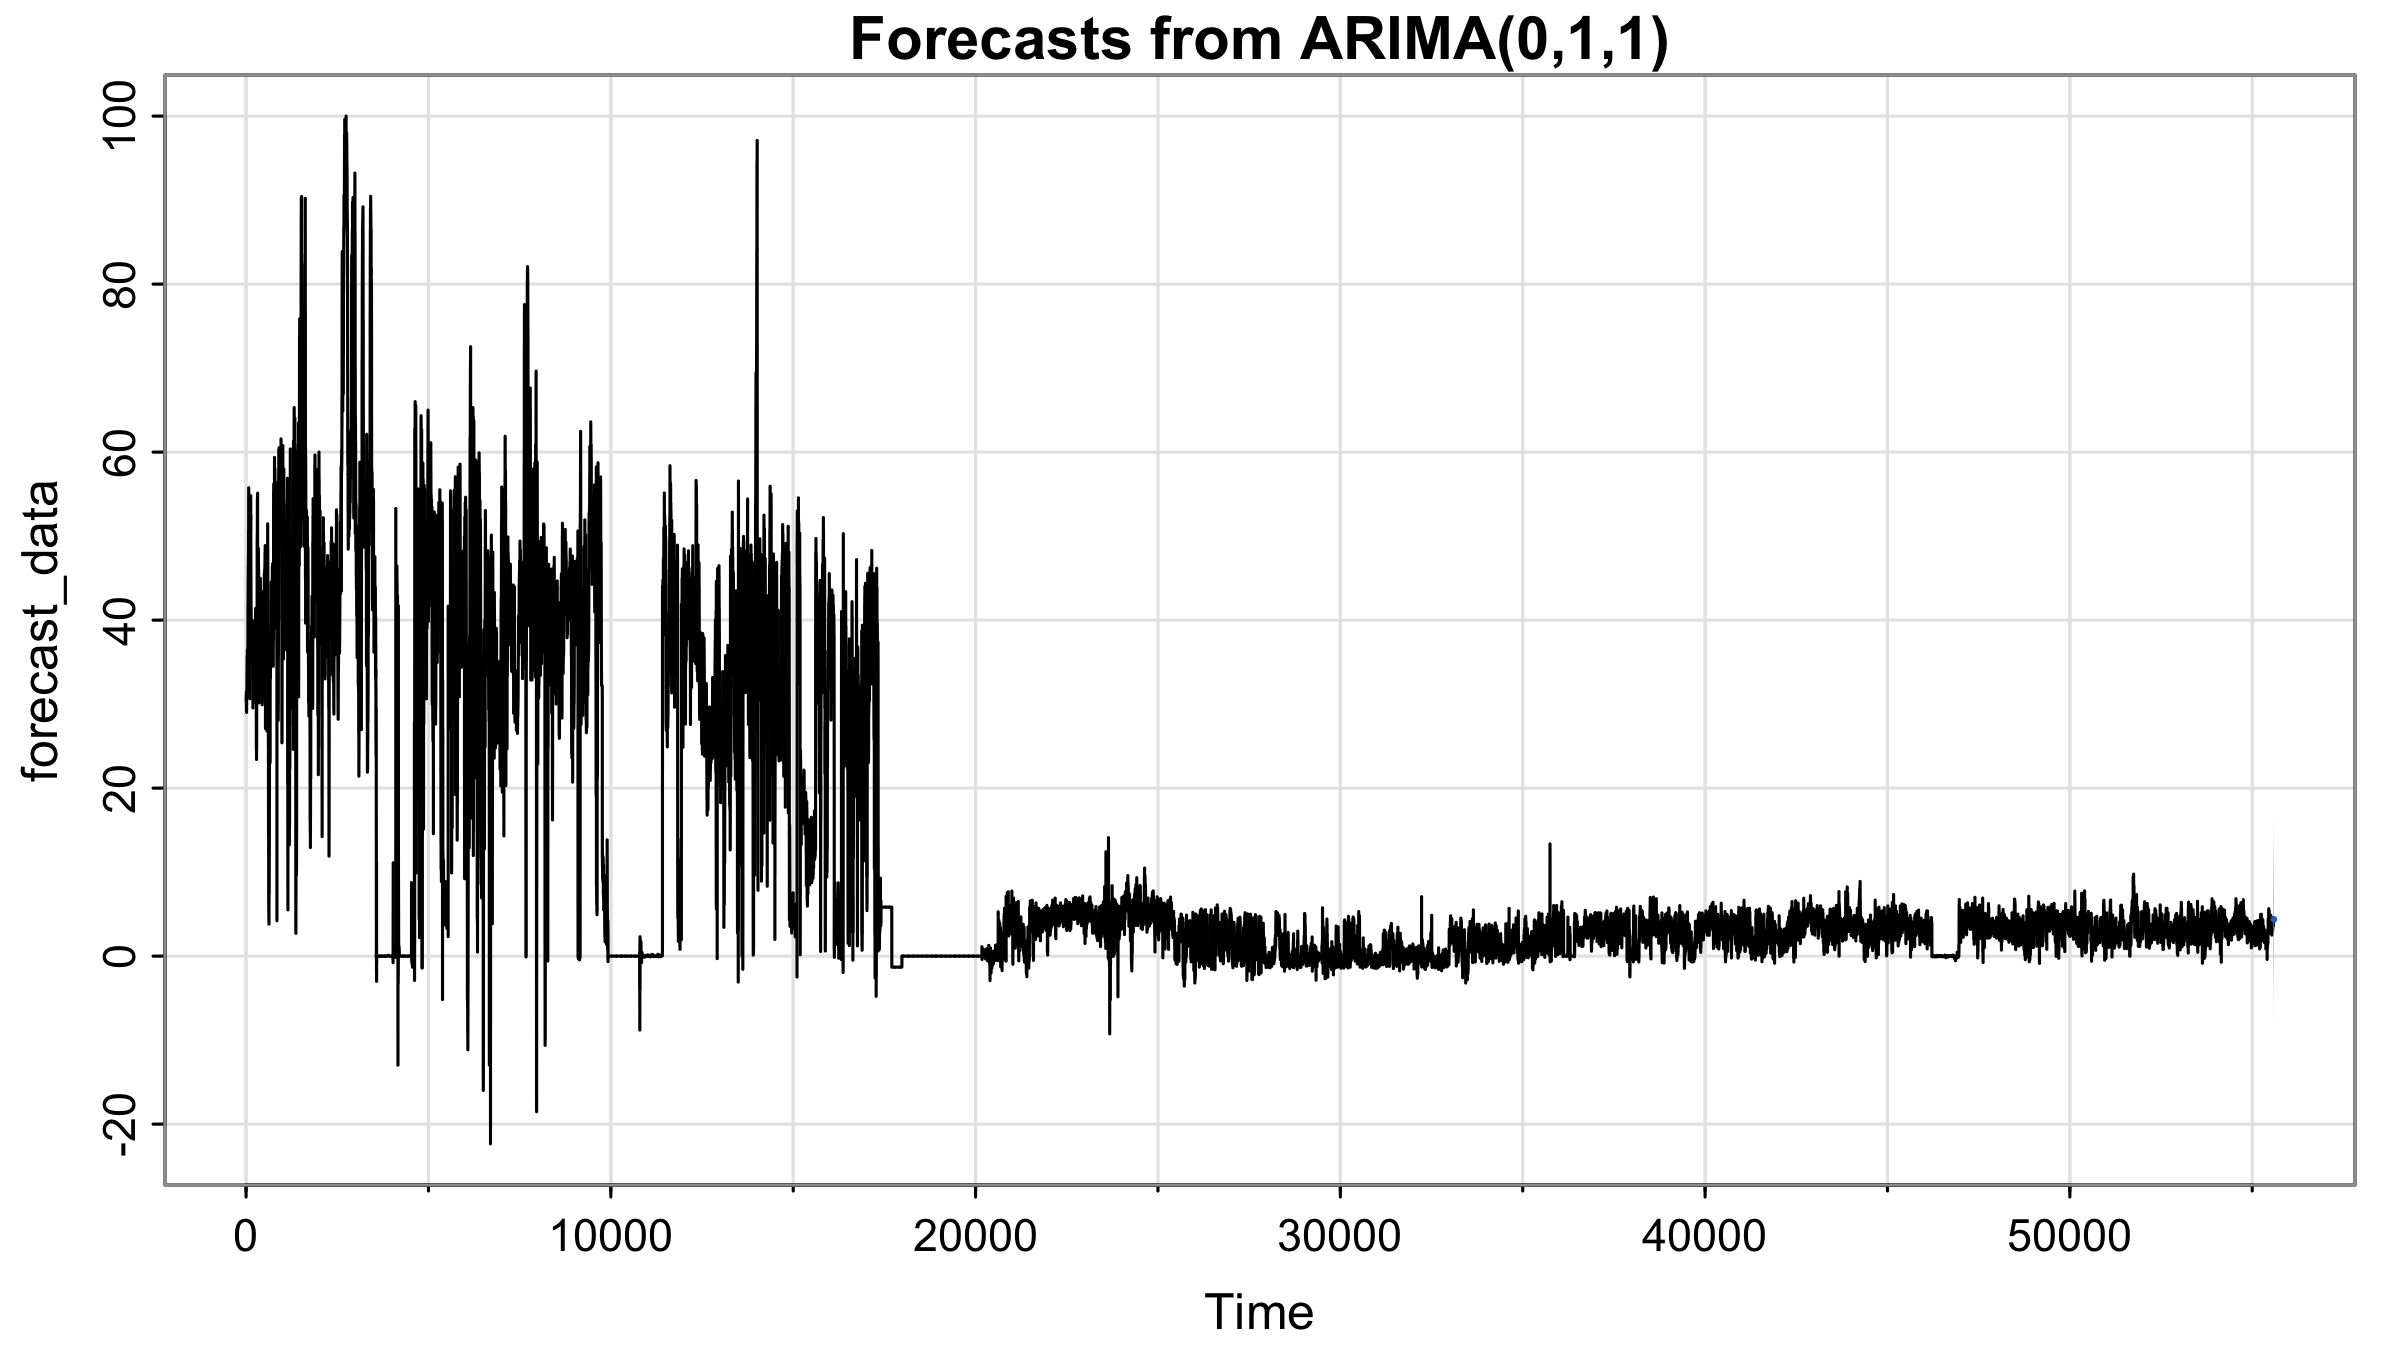

In [ ]:
fit <- auto.arima(ts_data)
forecast_data <- forecast(fit)
tsplot(forecast_data)

ERROR: ignored

#